### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Looking at the *application_df* DataFrame, we can identify the **IS_SUCCESSFUL** column as the **target** (y) and rest of the columns (except non-beneficial ID or redundant columns) as **features** (X).

In [2]:
application_df["ASK_AMT"]

0            5000
1          108590
2            5000
3            6692
4          142590
           ...   
34294        5000
34295        5000
34296        5000
34297        5000
34298    36500179
Name: ASK_AMT, Length: 34299, dtype: int64

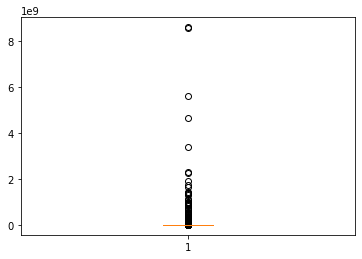

In [3]:
# Check the data distribution of ASK_AMT
plt.boxplot(application_df["ASK_AMT"])
plt.show()

ASK_AMT has a wide variety of values, possibly outliers.

In [4]:
# Look at ASK_AMT value counts for binning
ASK_AMT_counts = application_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns="IS_SUCCESSFUL")
application_df.head(2)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

There are 3 columns (i.e., APPLICATION_TYPE, CLASSIFICATION, ASK_AMT) having more than 10 unique values. 

In [4]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts
#print("f{application_type_counts}, Number of Application Types = {application_df.APPLICATION_TYPE.nunique()}")

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

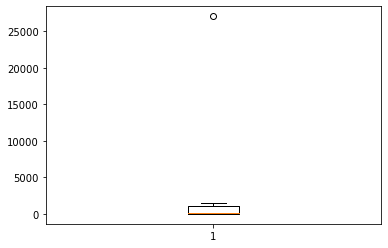

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(application_type_counts)
plt.show()

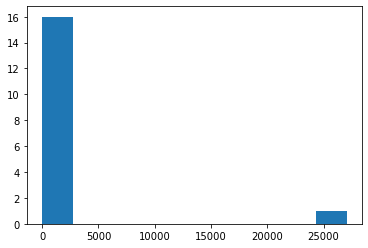

In [10]:
plt.hist(application_type_counts)
plt.show()

To determine which *application types* to bucket into the "other type" category, we can use a **density plot** to identify where the value counts "fall off" and set the threshold within this region.

<AxesSubplot:ylabel='Density'>

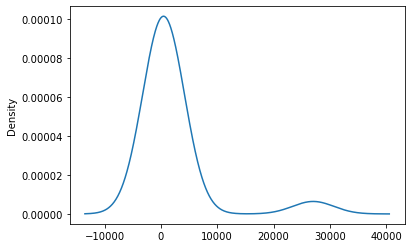

In [6]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

According to the density plot, the most common unique values have more than 5 instances within the dataset. Therefore, we can bucket any *application type* that appears fewer than 5 times in the dataset as "other".

In [7]:
# Determine which values to replace if counts are less than 100?
replace_application = list(application_type_counts[application_type_counts < 5].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_counts = application_df.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C2170        1
C4120        1
C1245        1
C2561        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

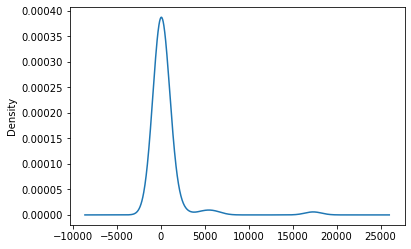

In [9]:
# Visualize the value counts of CLASSIFICATION
CLASSIFICATION_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than 5?
#  YOUR CODE GOES HERE
replace_class = list(CLASSIFICATION_counts[CLASSIFICATION_counts < 5].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Other       45
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1600        5
C1257        5
Name: CLASSIFICATION, dtype: int64

In [13]:
# Determine which values to replace if counts are less than 2?
#  YOUR CODE GOES HERE
#replace_ASK_AMT = list(ASK_AMT_counts[ASK_AMT_counts < 3].index)

# Replace in dataframe
#for ask in replace_ASK_AMT:
    #application_df.ASK_AMT = application_df.ASK_AMT.replace(ask,"Other")
    
# Check to make sure binning was successful

#application_df.ASK_AMT.value_counts()

In [13]:
# Checking the datatypes of the application_df
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Deleting the last object ASK_AMT
#application_cat.pop()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(application_df[application_cat],1)

application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL", 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Getting the input feature size
len(X_train[0])

79

In [20]:
X_train_scaled

array([[ 0.01394306, -0.03348439, -0.01527415, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.01527415, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.01527415, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.01527415, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.01527415, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.01527415, ..., -0.06987849,
         0.02789425, -0.02789425]])

### Deliverable 2: Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="LeakyReLU")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               16000     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 41,671
Trainable params: 41,671
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [31]:
# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)


In [32]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100
  1/804 [..............................] - ETA: 12:19 - loss: 0.7042 - accuracy: 0.4375
Epoch 00001: saving model to checkpoints\weights.01.hdf5
  6/804 [..............................] - ETA: 14s - loss: 0.6846 - accuracy: 0.6250  
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 11/804 [..............................] - ETA: 12s - loss: 0.6686 - accuracy: 0.6449
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 16/804 [..............................] - ETA: 11s - loss: 0.6462 - accuracy: 0.6641
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 21/804 [..............................] - ETA: 11s - loss: 0.6338 - accuracy: 0.6771
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 26/804 [..............................] - ETA: 11s - loss: 0.6328 - accuracy: 0.6755
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 31/804 [>.............................] - ETA: 10s - loss: 0.6308 - accuracy: 0.6804
Epoch 00001: saving model to checkpoints

286/804 [=========>....................] - ETA: 7s - loss: 0.5723 - accuracy: 0.7214
Epoch 00001: saving model to checkpoints\weights.01.hdf5
291/804 [=========>....................] - ETA: 7s - loss: 0.5723 - accuracy: 0.7215
Epoch 00001: saving model to checkpoints\weights.01.hdf5
296/804 [==========>...................] - ETA: 7s - loss: 0.5727 - accuracy: 0.7213
Epoch 00001: saving model to checkpoints\weights.01.hdf5
301/804 [==========>...................] - ETA: 7s - loss: 0.5731 - accuracy: 0.7213
Epoch 00001: saving model to checkpoints\weights.01.hdf5
306/804 [==========>...................] - ETA: 7s - loss: 0.5722 - accuracy: 0.7224
Epoch 00001: saving model to checkpoints\weights.01.hdf5
311/804 [==========>...................] - ETA: 7s - loss: 0.5718 - accuracy: 0.7229
Epoch 00001: saving model to checkpoints\weights.01.hdf5
316/804 [==========>...................] - ETA: 7s - loss: 0.5707 - accuracy: 0.7238
Epoch 00001: saving model to checkpoints\weights.01.hdf5
321/80

576/804 [====================>.........] - ETA: 3s - loss: 0.5680 - accuracy: 0.7222
Epoch 00001: saving model to checkpoints\weights.01.hdf5
581/804 [====================>.........] - ETA: 3s - loss: 0.5682 - accuracy: 0.7221
Epoch 00001: saving model to checkpoints\weights.01.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.5685 - accuracy: 0.7218
Epoch 00001: saving model to checkpoints\weights.01.hdf5
591/804 [=====================>........] - ETA: 3s - loss: 0.5687 - accuracy: 0.7218
Epoch 00001: saving model to checkpoints\weights.01.hdf5
596/804 [=====================>........] - ETA: 3s - loss: 0.5688 - accuracy: 0.7215
Epoch 00001: saving model to checkpoints\weights.01.hdf5
601/804 [=====================>........] - ETA: 3s - loss: 0.5686 - accuracy: 0.7213
Epoch 00001: saving model to checkpoints\weights.01.hdf5
606/804 [=====================>........] - ETA: 3s - loss: 0.5682 - accuracy: 0.7215
Epoch 00001: saving model to checkpoints\weights.01.hdf5
611/80

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 57/804 [=>............................] - ETA: 16s - loss: 0.5483 - accuracy: 0.7390
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 62/804 [=>............................] - ETA: 16s - loss: 0.5484 - accuracy: 0.7384
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 67/804 [=>............................] - ETA: 16s - loss: 0.5430 - accuracy: 0.7411
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 72/804 [=>............................] - ETA: 15s - loss: 0.5452 - accuracy: 0.7409
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 77/804 [=>............................] - ETA: 15s - loss: 0.5457 - accuracy: 0.7386
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 82/804 [==>...........................] - ETA: 15s - loss: 0.5445 - accuracy: 0.7405
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 87/804 [==>...........................] - ETA: 14s - loss: 0.5433 - accuracy: 0.7414

342/804 [===========>..................] - ETA: 8s - loss: 0.5541 - accuracy: 0.7306
Epoch 00002: saving model to checkpoints\weights.02.hdf5
347/804 [===========>..................] - ETA: 8s - loss: 0.5541 - accuracy: 0.7306
Epoch 00002: saving model to checkpoints\weights.02.hdf5
352/804 [============>.................] - ETA: 8s - loss: 0.5541 - accuracy: 0.7307
Epoch 00002: saving model to checkpoints\weights.02.hdf5
357/804 [============>.................] - ETA: 7s - loss: 0.5538 - accuracy: 0.7306
Epoch 00002: saving model to checkpoints\weights.02.hdf5
362/804 [============>.................] - ETA: 7s - loss: 0.5544 - accuracy: 0.7297
Epoch 00002: saving model to checkpoints\weights.02.hdf5
367/804 [============>.................] - ETA: 7s - loss: 0.5541 - accuracy: 0.7300
Epoch 00002: saving model to checkpoints\weights.02.hdf5
372/804 [============>.................] - ETA: 7s - loss: 0.5541 - accuracy: 0.7297
Epoch 00002: saving model to checkpoints\weights.02.hdf5
377/80

Epoch 00002: saving model to checkpoints\weights.02.hdf5
632/804 [======================>.......] - ETA: 3s - loss: 0.5530 - accuracy: 0.7310
Epoch 00002: saving model to checkpoints\weights.02.hdf5
637/804 [======================>.......] - ETA: 3s - loss: 0.5533 - accuracy: 0.7308
Epoch 00002: saving model to checkpoints\weights.02.hdf5
642/804 [======================>.......] - ETA: 2s - loss: 0.5536 - accuracy: 0.7306
Epoch 00002: saving model to checkpoints\weights.02.hdf5
647/804 [=======================>......] - ETA: 2s - loss: 0.5537 - accuracy: 0.7304
Epoch 00002: saving model to checkpoints\weights.02.hdf5
652/804 [=======================>......] - ETA: 2s - loss: 0.5533 - accuracy: 0.7308
Epoch 00002: saving model to checkpoints\weights.02.hdf5
657/804 [=======================>......] - ETA: 2s - loss: 0.5535 - accuracy: 0.7307
Epoch 00002: saving model to checkpoints\weights.02.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.5536 - accuracy: 0.7306
Epoch 

108/804 [===>..........................] - ETA: 15s - loss: 0.5595 - accuracy: 0.7251
Epoch 00003: saving model to checkpoints\weights.03.hdf5
113/804 [===>..........................] - ETA: 15s - loss: 0.5599 - accuracy: 0.7257
Epoch 00003: saving model to checkpoints\weights.03.hdf5
118/804 [===>..........................] - ETA: 15s - loss: 0.5599 - accuracy: 0.7256
Epoch 00003: saving model to checkpoints\weights.03.hdf5
123/804 [===>..........................] - ETA: 15s - loss: 0.5617 - accuracy: 0.7246
Epoch 00003: saving model to checkpoints\weights.03.hdf5
128/804 [===>..........................] - ETA: 15s - loss: 0.5608 - accuracy: 0.7251
Epoch 00003: saving model to checkpoints\weights.03.hdf5
133/804 [===>..........................] - ETA: 14s - loss: 0.5601 - accuracy: 0.7253
Epoch 00003: saving model to checkpoints\weights.03.hdf5
138/804 [====>.........................] - ETA: 14s - loss: 0.5604 - accuracy: 0.7253
Epoch 00003: saving model to checkpoints\weights.03.hdf5

393/804 [=============>................] - ETA: 9s - loss: 0.5506 - accuracy: 0.7301
Epoch 00003: saving model to checkpoints\weights.03.hdf5
400/804 [=============>................] - ETA: 9s - loss: 0.5506 - accuracy: 0.7303
Epoch 00003: saving model to checkpoints\weights.03.hdf5
407/804 [==============>...............] - ETA: 9s - loss: 0.5513 - accuracy: 0.7302
Epoch 00003: saving model to checkpoints\weights.03.hdf5
408/804 [==============>...............] - ETA: 9s - loss: 0.5510 - accuracy: 0.7303
Epoch 00003: saving model to checkpoints\weights.03.hdf5
416/804 [==============>...............] - ETA: 9s - loss: 0.5503 - accuracy: 0.7308
Epoch 00003: saving model to checkpoints\weights.03.hdf5
422/804 [==============>...............] - ETA: 9s - loss: 0.5501 - accuracy: 0.7311
Epoch 00003: saving model to checkpoints\weights.03.hdf5
423/804 [==============>...............] - ETA: 9s - loss: 0.5503 - accuracy: 0.7309
Epoch 00003: saving model to checkpoints\weights.03.hdf5
431/80

680/804 [========================>.....] - ETA: 3s - loss: 0.5497 - accuracy: 0.7313
Epoch 00003: saving model to checkpoints\weights.03.hdf5
686/804 [========================>.....] - ETA: 3s - loss: 0.5493 - accuracy: 0.7315
Epoch 00003: saving model to checkpoints\weights.03.hdf5
688/804 [========================>.....] - ETA: 3s - loss: 0.5493 - accuracy: 0.7315
Epoch 00003: saving model to checkpoints\weights.03.hdf5
693/804 [========================>.....] - ETA: 2s - loss: 0.5489 - accuracy: 0.7318
Epoch 00003: saving model to checkpoints\weights.03.hdf5
700/804 [=========================>....] - ETA: 2s - loss: 0.5489 - accuracy: 0.7320
Epoch 00003: saving model to checkpoints\weights.03.hdf5
703/804 [=========================>....] - ETA: 2s - loss: 0.5486 - accuracy: 0.7323
Epoch 00003: saving model to checkpoints\weights.03.hdf5
708/804 [=========================>....] - ETA: 2s - loss: 0.5490 - accuracy: 0.7320
Epoch 00003: saving model to checkpoints\weights.03.hdf5
717/80

159/804 [====>.........................] - ETA: 24s - loss: 0.5480 - accuracy: 0.7315
Epoch 00004: saving model to checkpoints\weights.04.hdf5
164/804 [=====>........................] - ETA: 23s - loss: 0.5479 - accuracy: 0.7313
Epoch 00004: saving model to checkpoints\weights.04.hdf5
172/804 [=====>........................] - ETA: 23s - loss: 0.5470 - accuracy: 0.7326
Epoch 00004: saving model to checkpoints\weights.04.hdf5
178/804 [=====>........................] - ETA: 23s - loss: 0.5462 - accuracy: 0.7328
Epoch 00004: saving model to checkpoints\weights.04.hdf5
179/804 [=====>........................] - ETA: 23s - loss: 0.5457 - accuracy: 0.7334
Epoch 00004: saving model to checkpoints\weights.04.hdf5
187/804 [=====>........................] - ETA: 22s - loss: 0.5453 - accuracy: 0.7340
Epoch 00004: saving model to checkpoints\weights.04.hdf5
189/804 [======>.......................] - ETA: 22s - loss: 0.5454 - accuracy: 0.7338
Epoch 00004: saving model to checkpoints\weights.04.hdf5

444/804 [===============>..............] - ETA: 13s - loss: 0.5487 - accuracy: 0.7324
Epoch 00004: saving model to checkpoints\weights.04.hdf5
449/804 [===============>..............] - ETA: 13s - loss: 0.5488 - accuracy: 0.7325
Epoch 00004: saving model to checkpoints\weights.04.hdf5
454/804 [===============>..............] - ETA: 13s - loss: 0.5490 - accuracy: 0.7320
Epoch 00004: saving model to checkpoints\weights.04.hdf5
459/804 [================>.............] - ETA: 13s - loss: 0.5488 - accuracy: 0.7320
Epoch 00004: saving model to checkpoints\weights.04.hdf5
464/804 [================>.............] - ETA: 12s - loss: 0.5491 - accuracy: 0.7317
Epoch 00004: saving model to checkpoints\weights.04.hdf5
469/804 [================>.............] - ETA: 12s - loss: 0.5493 - accuracy: 0.7315
Epoch 00004: saving model to checkpoints\weights.04.hdf5
474/804 [================>.............] - ETA: 12s - loss: 0.5495 - accuracy: 0.7312
Epoch 00004: saving model to checkpoints\weights.04.hdf5

729/804 [==========================>...] - ETA: 2s - loss: 0.5487 - accuracy: 0.7325
Epoch 00004: saving model to checkpoints\weights.04.hdf5
734/804 [==========================>...] - ETA: 2s - loss: 0.5488 - accuracy: 0.7325
Epoch 00004: saving model to checkpoints\weights.04.hdf5
739/804 [==========================>...] - ETA: 2s - loss: 0.5489 - accuracy: 0.7326
Epoch 00004: saving model to checkpoints\weights.04.hdf5
744/804 [==========================>...] - ETA: 2s - loss: 0.5483 - accuracy: 0.7331
Epoch 00004: saving model to checkpoints\weights.04.hdf5
749/804 [==========================>...] - ETA: 1s - loss: 0.5481 - accuracy: 0.7333
Epoch 00004: saving model to checkpoints\weights.04.hdf5
757/804 [===========================>..] - ETA: 1s - loss: 0.5483 - accuracy: 0.7333
Epoch 00004: saving model to checkpoints\weights.04.hdf5
763/804 [===========================>..] - ETA: 1s - loss: 0.5479 - accuracy: 0.7337
Epoch 00004: saving model to checkpoints\weights.04.hdf5
764/80

210/804 [======>.......................] - ETA: 15s - loss: 0.5451 - accuracy: 0.7415
Epoch 00005: saving model to checkpoints\weights.05.hdf5
215/804 [=======>......................] - ETA: 15s - loss: 0.5461 - accuracy: 0.7400
Epoch 00005: saving model to checkpoints\weights.05.hdf5
220/804 [=======>......................] - ETA: 15s - loss: 0.5448 - accuracy: 0.7406
Epoch 00005: saving model to checkpoints\weights.05.hdf5
225/804 [=======>......................] - ETA: 15s - loss: 0.5459 - accuracy: 0.7403
Epoch 00005: saving model to checkpoints\weights.05.hdf5
230/804 [=======>......................] - ETA: 14s - loss: 0.5452 - accuracy: 0.7408
Epoch 00005: saving model to checkpoints\weights.05.hdf5
235/804 [=======>......................] - ETA: 14s - loss: 0.5475 - accuracy: 0.7384
Epoch 00005: saving model to checkpoints\weights.05.hdf5
240/804 [=======>......................] - ETA: 14s - loss: 0.5480 - accuracy: 0.7380
Epoch 00005: saving model to checkpoints\weights.05.hdf5

495/804 [=================>............] - ETA: 9s - loss: 0.5497 - accuracy: 0.7343
Epoch 00005: saving model to checkpoints\weights.05.hdf5
500/804 [=================>............] - ETA: 9s - loss: 0.5493 - accuracy: 0.7346
Epoch 00005: saving model to checkpoints\weights.05.hdf5
505/804 [=================>............] - ETA: 9s - loss: 0.5496 - accuracy: 0.7343
Epoch 00005: saving model to checkpoints\weights.05.hdf5
510/804 [==================>...........] - ETA: 8s - loss: 0.5492 - accuracy: 0.7347
Epoch 00005: saving model to checkpoints\weights.05.hdf5
515/804 [==================>...........] - ETA: 8s - loss: 0.5494 - accuracy: 0.7345
Epoch 00005: saving model to checkpoints\weights.05.hdf5
520/804 [==================>...........] - ETA: 8s - loss: 0.5496 - accuracy: 0.7342
Epoch 00005: saving model to checkpoints\weights.05.hdf5
525/804 [==================>...........] - ETA: 8s - loss: 0.5488 - accuracy: 0.7348
Epoch 00005: saving model to checkpoints\weights.05.hdf5
530/80

785/804 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7358
Epoch 00005: saving model to checkpoints\weights.05.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7355
Epoch 00005: saving model to checkpoints\weights.05.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7353
Epoch 00005: saving model to checkpoints\weights.05.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5469 - accuracy: 0.7349
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 25s 31ms/step - loss: 0.5468 - accuracy: 0.7350
Epoch 6/100
  5/804 [..............................] - ETA: 9s - loss: 0.5724 - accuracy: 0.6938 
Epoch 00006: saving model to checkpoints\weights.06.hdf5
  6/804 [..............................] - ETA: 24s - loss: 0.5591 - accuracy: 0.7083
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 11/804 [..............................] - 

266/804 [========>.....................] - ETA: 16s - loss: 0.5448 - accuracy: 0.7373
Epoch 00006: saving model to checkpoints\weights.06.hdf5
271/804 [=========>....................] - ETA: 16s - loss: 0.5451 - accuracy: 0.7372
Epoch 00006: saving model to checkpoints\weights.06.hdf5
276/804 [=========>....................] - ETA: 16s - loss: 0.5453 - accuracy: 0.7365
Epoch 00006: saving model to checkpoints\weights.06.hdf5
281/804 [=========>....................] - ETA: 16s - loss: 0.5450 - accuracy: 0.7370
Epoch 00006: saving model to checkpoints\weights.06.hdf5
286/804 [=========>....................] - ETA: 15s - loss: 0.5460 - accuracy: 0.7361
Epoch 00006: saving model to checkpoints\weights.06.hdf5
291/804 [=========>....................] - ETA: 15s - loss: 0.5460 - accuracy: 0.7363
Epoch 00006: saving model to checkpoints\weights.06.hdf5
296/804 [==========>...................] - ETA: 15s - loss: 0.5459 - accuracy: 0.7359
Epoch 00006: saving model to checkpoints\weights.06.hdf5

551/804 [===================>..........] - ETA: 7s - loss: 0.5470 - accuracy: 0.7320
Epoch 00006: saving model to checkpoints\weights.06.hdf5
556/804 [===================>..........] - ETA: 7s - loss: 0.5469 - accuracy: 0.7320
Epoch 00006: saving model to checkpoints\weights.06.hdf5
561/804 [===================>..........] - ETA: 6s - loss: 0.5471 - accuracy: 0.7318
Epoch 00006: saving model to checkpoints\weights.06.hdf5
566/804 [====================>.........] - ETA: 6s - loss: 0.5470 - accuracy: 0.7319
Epoch 00006: saving model to checkpoints\weights.06.hdf5
571/804 [====================>.........] - ETA: 6s - loss: 0.5468 - accuracy: 0.7321
Epoch 00006: saving model to checkpoints\weights.06.hdf5
576/804 [====================>.........] - ETA: 6s - loss: 0.5466 - accuracy: 0.7324
Epoch 00006: saving model to checkpoints\weights.06.hdf5
581/804 [====================>.........] - ETA: 6s - loss: 0.5470 - accuracy: 0.7323
Epoch 00006: saving model to checkpoints\weights.06.hdf5
586/80

 32/804 [>.............................] - ETA: 23s - loss: 0.5361 - accuracy: 0.7451
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 37/804 [>.............................] - ETA: 22s - loss: 0.5309 - accuracy: 0.7458
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 42/804 [>.............................] - ETA: 22s - loss: 0.5291 - accuracy: 0.7440
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 47/804 [>.............................] - ETA: 22s - loss: 0.5375 - accuracy: 0.7380
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 52/804 [>.............................] - ETA: 22s - loss: 0.5295 - accuracy: 0.7416
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 57/804 [=>............................] - ETA: 21s - loss: 0.5317 - accuracy: 0.7434
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 62/804 [=>............................] - ETA: 21s - loss: 0.5284 - accuracy: 0.7460
Epoch 00007: saving model to checkpoints\weights.07.hdf5

317/804 [==========>...................] - ETA: 14s - loss: 0.5395 - accuracy: 0.7414
Epoch 00007: saving model to checkpoints\weights.07.hdf5
322/804 [===========>..................] - ETA: 14s - loss: 0.5402 - accuracy: 0.7410
Epoch 00007: saving model to checkpoints\weights.07.hdf5
327/804 [===========>..................] - ETA: 13s - loss: 0.5408 - accuracy: 0.7403
Epoch 00007: saving model to checkpoints\weights.07.hdf5
332/804 [===========>..................] - ETA: 13s - loss: 0.5404 - accuracy: 0.7406
Epoch 00007: saving model to checkpoints\weights.07.hdf5
337/804 [===========>..................] - ETA: 13s - loss: 0.5397 - accuracy: 0.7411
Epoch 00007: saving model to checkpoints\weights.07.hdf5
342/804 [===========>..................] - ETA: 13s - loss: 0.5390 - accuracy: 0.7417
Epoch 00007: saving model to checkpoints\weights.07.hdf5
347/804 [===========>..................] - ETA: 13s - loss: 0.5394 - accuracy: 0.7414
Epoch 00007: saving model to checkpoints\weights.07.hdf5

602/804 [=====================>........] - ETA: 5s - loss: 0.5450 - accuracy: 0.7359
Epoch 00007: saving model to checkpoints\weights.07.hdf5
607/804 [=====================>........] - ETA: 5s - loss: 0.5451 - accuracy: 0.7358
Epoch 00007: saving model to checkpoints\weights.07.hdf5
612/804 [=====================>........] - ETA: 5s - loss: 0.5453 - accuracy: 0.7357
Epoch 00007: saving model to checkpoints\weights.07.hdf5
617/804 [======================>.......] - ETA: 5s - loss: 0.5455 - accuracy: 0.7357
Epoch 00007: saving model to checkpoints\weights.07.hdf5
622/804 [======================>.......] - ETA: 5s - loss: 0.5453 - accuracy: 0.7359
Epoch 00007: saving model to checkpoints\weights.07.hdf5
627/804 [======================>.......] - ETA: 4s - loss: 0.5454 - accuracy: 0.7357
Epoch 00007: saving model to checkpoints\weights.07.hdf5
632/804 [======================>.......] - ETA: 4s - loss: 0.5454 - accuracy: 0.7352
Epoch 00007: saving model to checkpoints\weights.07.hdf5
637/80

 83/804 [==>...........................] - ETA: 20s - loss: 0.5543 - accuracy: 0.7308
Epoch 00008: saving model to checkpoints\weights.08.hdf5
 88/804 [==>...........................] - ETA: 20s - loss: 0.5559 - accuracy: 0.7294
Epoch 00008: saving model to checkpoints\weights.08.hdf5
 93/804 [==>...........................] - ETA: 20s - loss: 0.5599 - accuracy: 0.7255
Epoch 00008: saving model to checkpoints\weights.08.hdf5
 98/804 [==>...........................] - ETA: 19s - loss: 0.5589 - accuracy: 0.7248
Epoch 00008: saving model to checkpoints\weights.08.hdf5
103/804 [==>...........................] - ETA: 19s - loss: 0.5551 - accuracy: 0.7275
Epoch 00008: saving model to checkpoints\weights.08.hdf5
108/804 [===>..........................] - ETA: 19s - loss: 0.5578 - accuracy: 0.7242
Epoch 00008: saving model to checkpoints\weights.08.hdf5
113/804 [===>..........................] - ETA: 19s - loss: 0.5570 - accuracy: 0.7232
Epoch 00008: saving model to checkpoints\weights.08.hdf5

368/804 [============>.................] - ETA: 11s - loss: 0.5422 - accuracy: 0.7366
Epoch 00008: saving model to checkpoints\weights.08.hdf5
373/804 [============>.................] - ETA: 11s - loss: 0.5426 - accuracy: 0.7364
Epoch 00008: saving model to checkpoints\weights.08.hdf5
378/804 [=============>................] - ETA: 11s - loss: 0.5422 - accuracy: 0.7368
Epoch 00008: saving model to checkpoints\weights.08.hdf5
383/804 [=============>................] - ETA: 11s - loss: 0.5425 - accuracy: 0.7363
Epoch 00008: saving model to checkpoints\weights.08.hdf5
388/804 [=============>................] - ETA: 11s - loss: 0.5424 - accuracy: 0.7365
Epoch 00008: saving model to checkpoints\weights.08.hdf5
393/804 [=============>................] - ETA: 10s - loss: 0.5429 - accuracy: 0.7362
Epoch 00008: saving model to checkpoints\weights.08.hdf5
398/804 [=============>................] - ETA: 10s - loss: 0.5426 - accuracy: 0.7367
Epoch 00008: saving model to checkpoints\weights.08.hdf5

658/804 [=======================>......] - ETA: 3s - loss: 0.5456 - accuracy: 0.7338
Epoch 00008: saving model to checkpoints\weights.08.hdf5
663/804 [=======================>......] - ETA: 3s - loss: 0.5456 - accuracy: 0.7339
Epoch 00008: saving model to checkpoints\weights.08.hdf5
668/804 [=======================>......] - ETA: 3s - loss: 0.5458 - accuracy: 0.7338
Epoch 00008: saving model to checkpoints\weights.08.hdf5
673/804 [========================>.....] - ETA: 3s - loss: 0.5455 - accuracy: 0.7337
Epoch 00008: saving model to checkpoints\weights.08.hdf5
678/804 [========================>.....] - ETA: 3s - loss: 0.5453 - accuracy: 0.7339
Epoch 00008: saving model to checkpoints\weights.08.hdf5
683/804 [========================>.....] - ETA: 3s - loss: 0.5452 - accuracy: 0.7338
Epoch 00008: saving model to checkpoints\weights.08.hdf5
688/804 [========================>.....] - ETA: 3s - loss: 0.5455 - accuracy: 0.7337
Epoch 00008: saving model to checkpoints\weights.08.hdf5
693/80

139/804 [====>.........................] - ETA: 18s - loss: 0.5344 - accuracy: 0.7415
Epoch 00009: saving model to checkpoints\weights.09.hdf5
144/804 [====>.........................] - ETA: 18s - loss: 0.5320 - accuracy: 0.7441
Epoch 00009: saving model to checkpoints\weights.09.hdf5
149/804 [====>.........................] - ETA: 17s - loss: 0.5323 - accuracy: 0.7439
Epoch 00009: saving model to checkpoints\weights.09.hdf5
154/804 [====>.........................] - ETA: 17s - loss: 0.5328 - accuracy: 0.7437
Epoch 00009: saving model to checkpoints\weights.09.hdf5
159/804 [====>.........................] - ETA: 17s - loss: 0.5310 - accuracy: 0.7459
Epoch 00009: saving model to checkpoints\weights.09.hdf5
164/804 [=====>........................] - ETA: 17s - loss: 0.5321 - accuracy: 0.7452
Epoch 00009: saving model to checkpoints\weights.09.hdf5
169/804 [=====>........................] - ETA: 17s - loss: 0.5342 - accuracy: 0.7430
Epoch 00009: saving model to checkpoints\weights.09.hdf5

424/804 [==============>...............] - ETA: 10s - loss: 0.5365 - accuracy: 0.7401
Epoch 00009: saving model to checkpoints\weights.09.hdf5
429/804 [===============>..............] - ETA: 9s - loss: 0.5370 - accuracy: 0.7400 
Epoch 00009: saving model to checkpoints\weights.09.hdf5
434/804 [===============>..............] - ETA: 9s - loss: 0.5375 - accuracy: 0.7397
Epoch 00009: saving model to checkpoints\weights.09.hdf5
439/804 [===============>..............] - ETA: 9s - loss: 0.5375 - accuracy: 0.7397
Epoch 00009: saving model to checkpoints\weights.09.hdf5
444/804 [===============>..............] - ETA: 9s - loss: 0.5379 - accuracy: 0.7392
Epoch 00009: saving model to checkpoints\weights.09.hdf5
449/804 [===============>..............] - ETA: 9s - loss: 0.5378 - accuracy: 0.7396
Epoch 00009: saving model to checkpoints\weights.09.hdf5
454/804 [===============>..............] - ETA: 9s - loss: 0.5381 - accuracy: 0.7395
Epoch 00009: saving model to checkpoints\weights.09.hdf5
459/

714/804 [=========================>....] - ETA: 2s - loss: 0.5430 - accuracy: 0.7354
Epoch 00009: saving model to checkpoints\weights.09.hdf5
719/804 [=========================>....] - ETA: 2s - loss: 0.5431 - accuracy: 0.7353
Epoch 00009: saving model to checkpoints\weights.09.hdf5
724/804 [==========================>...] - ETA: 2s - loss: 0.5427 - accuracy: 0.7355
Epoch 00009: saving model to checkpoints\weights.09.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.5424 - accuracy: 0.7358
Epoch 00009: saving model to checkpoints\weights.09.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.5425 - accuracy: 0.7356
Epoch 00009: saving model to checkpoints\weights.09.hdf5
739/804 [==========================>...] - ETA: 1s - loss: 0.5420 - accuracy: 0.7360
Epoch 00009: saving model to checkpoints\weights.09.hdf5
744/804 [==========================>...] - ETA: 1s - loss: 0.5427 - accuracy: 0.7356
Epoch 00009: saving model to checkpoints\weights.09.hdf5
749/80

190/804 [======>.......................] - ETA: 16s - loss: 0.5414 - accuracy: 0.7372
Epoch 00010: saving model to checkpoints\weights.10.hdf5
195/804 [======>.......................] - ETA: 16s - loss: 0.5404 - accuracy: 0.7370
Epoch 00010: saving model to checkpoints\weights.10.hdf5
200/804 [======>.......................] - ETA: 16s - loss: 0.5426 - accuracy: 0.7353
Epoch 00010: saving model to checkpoints\weights.10.hdf5
205/804 [======>.......................] - ETA: 16s - loss: 0.5426 - accuracy: 0.7358
Epoch 00010: saving model to checkpoints\weights.10.hdf5
210/804 [======>.......................] - ETA: 16s - loss: 0.5428 - accuracy: 0.7363
Epoch 00010: saving model to checkpoints\weights.10.hdf5
215/804 [=======>......................] - ETA: 16s - loss: 0.5417 - accuracy: 0.7374
Epoch 00010: saving model to checkpoints\weights.10.hdf5
220/804 [=======>......................] - ETA: 15s - loss: 0.5416 - accuracy: 0.7372
Epoch 00010: saving model to checkpoints\weights.10.hdf5

475/804 [================>.............] - ETA: 8s - loss: 0.5440 - accuracy: 0.7351
Epoch 00010: saving model to checkpoints\weights.10.hdf5
480/804 [================>.............] - ETA: 8s - loss: 0.5439 - accuracy: 0.7352
Epoch 00010: saving model to checkpoints\weights.10.hdf5
485/804 [=================>............] - ETA: 8s - loss: 0.5435 - accuracy: 0.7355
Epoch 00010: saving model to checkpoints\weights.10.hdf5
490/804 [=================>............] - ETA: 8s - loss: 0.5436 - accuracy: 0.7349
Epoch 00010: saving model to checkpoints\weights.10.hdf5
495/804 [=================>............] - ETA: 8s - loss: 0.5439 - accuracy: 0.7349
Epoch 00010: saving model to checkpoints\weights.10.hdf5
500/804 [=================>............] - ETA: 8s - loss: 0.5437 - accuracy: 0.7353
Epoch 00010: saving model to checkpoints\weights.10.hdf5
505/804 [=================>............] - ETA: 7s - loss: 0.5434 - accuracy: 0.7353
Epoch 00010: saving model to checkpoints\weights.10.hdf5
510/80

Epoch 00010: saving model to checkpoints\weights.10.hdf5
765/804 [===========================>..] - ETA: 1s - loss: 0.5435 - accuracy: 0.7355
Epoch 00010: saving model to checkpoints\weights.10.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5438 - accuracy: 0.7353
Epoch 00010: saving model to checkpoints\weights.10.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5437 - accuracy: 0.7354
Epoch 00010: saving model to checkpoints\weights.10.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7354
Epoch 00010: saving model to checkpoints\weights.10.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5433 - accuracy: 0.7356
Epoch 00010: saving model to checkpoints\weights.10.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5430 - accuracy: 0.7359
Epoch 00010: saving model to checkpoints\weights.10.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7358
Epoch 

241/804 [=======>......................] - ETA: 14s - loss: 0.5419 - accuracy: 0.7344
Epoch 00011: saving model to checkpoints\weights.11.hdf5
246/804 [========>.....................] - ETA: 14s - loss: 0.5421 - accuracy: 0.7341
Epoch 00011: saving model to checkpoints\weights.11.hdf5
251/804 [========>.....................] - ETA: 14s - loss: 0.5427 - accuracy: 0.7336
Epoch 00011: saving model to checkpoints\weights.11.hdf5
256/804 [========>.....................] - ETA: 14s - loss: 0.5416 - accuracy: 0.7343
Epoch 00011: saving model to checkpoints\weights.11.hdf5
261/804 [========>.....................] - ETA: 14s - loss: 0.5417 - accuracy: 0.7344
Epoch 00011: saving model to checkpoints\weights.11.hdf5
266/804 [========>.....................] - ETA: 14s - loss: 0.5397 - accuracy: 0.7364
Epoch 00011: saving model to checkpoints\weights.11.hdf5
271/804 [=========>....................] - ETA: 14s - loss: 0.5391 - accuracy: 0.7366
Epoch 00011: saving model to checkpoints\weights.11.hdf5

526/804 [==================>...........] - ETA: 7s - loss: 0.5392 - accuracy: 0.7389
Epoch 00011: saving model to checkpoints\weights.11.hdf5
531/804 [==================>...........] - ETA: 7s - loss: 0.5389 - accuracy: 0.7389
Epoch 00011: saving model to checkpoints\weights.11.hdf5
536/804 [===================>..........] - ETA: 7s - loss: 0.5389 - accuracy: 0.7389
Epoch 00011: saving model to checkpoints\weights.11.hdf5
541/804 [===================>..........] - ETA: 6s - loss: 0.5392 - accuracy: 0.7386
Epoch 00011: saving model to checkpoints\weights.11.hdf5
546/804 [===================>..........] - ETA: 6s - loss: 0.5392 - accuracy: 0.7386
Epoch 00011: saving model to checkpoints\weights.11.hdf5
551/804 [===================>..........] - ETA: 6s - loss: 0.5398 - accuracy: 0.7380
Epoch 00011: saving model to checkpoints\weights.11.hdf5
556/804 [===================>..........] - ETA: 6s - loss: 0.5399 - accuracy: 0.7380
Epoch 00011: saving model to checkpoints\weights.11.hdf5
561/80

Epoch 00012: saving model to checkpoints\weights.12.hdf5
  7/804 [..............................] - ETA: 29s - loss: 0.5503 - accuracy: 0.7366 
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 12/804 [..............................] - ETA: 26s - loss: 0.5177 - accuracy: 0.7578
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 17/804 [..............................] - ETA: 24s - loss: 0.5302 - accuracy: 0.7390
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 22/804 [..............................] - ETA: 23s - loss: 0.5457 - accuracy: 0.7273
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 27/804 [>.............................] - ETA: 22s - loss: 0.5417 - accuracy: 0.7292
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 32/804 [>.............................] - ETA: 21s - loss: 0.5520 - accuracy: 0.7246
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 37/804 [>.............................] - ETA: 21s - loss: 0.5467 - accuracy: 0.726

292/804 [=========>....................] - ETA: 13s - loss: 0.5409 - accuracy: 0.7363
Epoch 00012: saving model to checkpoints\weights.12.hdf5
297/804 [==========>...................] - ETA: 13s - loss: 0.5414 - accuracy: 0.7359
Epoch 00012: saving model to checkpoints\weights.12.hdf5
302/804 [==========>...................] - ETA: 13s - loss: 0.5416 - accuracy: 0.7352
Epoch 00012: saving model to checkpoints\weights.12.hdf5
307/804 [==========>...................] - ETA: 13s - loss: 0.5429 - accuracy: 0.7342
Epoch 00012: saving model to checkpoints\weights.12.hdf5
312/804 [==========>...................] - ETA: 13s - loss: 0.5424 - accuracy: 0.7352
Epoch 00012: saving model to checkpoints\weights.12.hdf5
317/804 [==========>...................] - ETA: 12s - loss: 0.5429 - accuracy: 0.7348
Epoch 00012: saving model to checkpoints\weights.12.hdf5
322/804 [===========>..................] - ETA: 12s - loss: 0.5428 - accuracy: 0.7350
Epoch 00012: saving model to checkpoints\weights.12.hdf5

577/804 [====================>.........] - ETA: 5s - loss: 0.5416 - accuracy: 0.7362
Epoch 00012: saving model to checkpoints\weights.12.hdf5
582/804 [====================>.........] - ETA: 5s - loss: 0.5415 - accuracy: 0.7364
Epoch 00012: saving model to checkpoints\weights.12.hdf5
587/804 [====================>.........] - ETA: 5s - loss: 0.5416 - accuracy: 0.7365
Epoch 00012: saving model to checkpoints\weights.12.hdf5
592/804 [=====================>........] - ETA: 5s - loss: 0.5410 - accuracy: 0.7371
Epoch 00012: saving model to checkpoints\weights.12.hdf5
597/804 [=====================>........] - ETA: 5s - loss: 0.5413 - accuracy: 0.7370
Epoch 00012: saving model to checkpoints\weights.12.hdf5
602/804 [=====================>........] - ETA: 5s - loss: 0.5413 - accuracy: 0.7372
Epoch 00012: saving model to checkpoints\weights.12.hdf5
607/804 [=====================>........] - ETA: 5s - loss: 0.5412 - accuracy: 0.7373
Epoch 00012: saving model to checkpoints\weights.12.hdf5
612/80

 58/804 [=>............................] - ETA: 20s - loss: 0.5406 - accuracy: 0.7338
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 63/804 [=>............................] - ETA: 19s - loss: 0.5463 - accuracy: 0.7307
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 68/804 [=>............................] - ETA: 19s - loss: 0.5462 - accuracy: 0.7298
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 73/804 [=>............................] - ETA: 19s - loss: 0.5447 - accuracy: 0.7299
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 78/804 [=>............................] - ETA: 19s - loss: 0.5439 - accuracy: 0.7296
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 83/804 [==>...........................] - ETA: 18s - loss: 0.5420 - accuracy: 0.7319
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 88/804 [==>...........................] - ETA: 18s - loss: 0.5445 - accuracy: 0.7305
Epoch 00013: saving model to checkpoints\weights.13.hdf5

343/804 [===========>..................] - ETA: 12s - loss: 0.5459 - accuracy: 0.7320
Epoch 00013: saving model to checkpoints\weights.13.hdf5
348/804 [===========>..................] - ETA: 12s - loss: 0.5454 - accuracy: 0.7321
Epoch 00013: saving model to checkpoints\weights.13.hdf5
353/804 [============>.................] - ETA: 12s - loss: 0.5457 - accuracy: 0.7320
Epoch 00013: saving model to checkpoints\weights.13.hdf5
358/804 [============>.................] - ETA: 12s - loss: 0.5450 - accuracy: 0.7327
Epoch 00013: saving model to checkpoints\weights.13.hdf5
363/804 [============>.................] - ETA: 12s - loss: 0.5450 - accuracy: 0.7326
Epoch 00013: saving model to checkpoints\weights.13.hdf5
368/804 [============>.................] - ETA: 12s - loss: 0.5457 - accuracy: 0.7323
Epoch 00013: saving model to checkpoints\weights.13.hdf5
373/804 [============>.................] - ETA: 11s - loss: 0.5454 - accuracy: 0.7322
Epoch 00013: saving model to checkpoints\weights.13.hdf5

628/804 [======================>.......] - ETA: 4s - loss: 0.5434 - accuracy: 0.7347
Epoch 00013: saving model to checkpoints\weights.13.hdf5
633/804 [======================>.......] - ETA: 4s - loss: 0.5437 - accuracy: 0.7343
Epoch 00013: saving model to checkpoints\weights.13.hdf5
638/804 [======================>.......] - ETA: 4s - loss: 0.5439 - accuracy: 0.7342
Epoch 00013: saving model to checkpoints\weights.13.hdf5
643/804 [======================>.......] - ETA: 4s - loss: 0.5439 - accuracy: 0.7342
Epoch 00013: saving model to checkpoints\weights.13.hdf5
648/804 [=======================>......] - ETA: 4s - loss: 0.5436 - accuracy: 0.7343
Epoch 00013: saving model to checkpoints\weights.13.hdf5
653/804 [=======================>......] - ETA: 4s - loss: 0.5433 - accuracy: 0.7345
Epoch 00013: saving model to checkpoints\weights.13.hdf5
658/804 [=======================>......] - ETA: 3s - loss: 0.5436 - accuracy: 0.7344
Epoch 00013: saving model to checkpoints\weights.13.hdf5
663/80

109/804 [===>..........................] - ETA: 19s - loss: 0.5522 - accuracy: 0.7262
Epoch 00014: saving model to checkpoints\weights.14.hdf5
114/804 [===>..........................] - ETA: 19s - loss: 0.5530 - accuracy: 0.7256
Epoch 00014: saving model to checkpoints\weights.14.hdf5
119/804 [===>..........................] - ETA: 18s - loss: 0.5509 - accuracy: 0.7272
Epoch 00014: saving model to checkpoints\weights.14.hdf5
124/804 [===>..........................] - ETA: 18s - loss: 0.5509 - accuracy: 0.7276
Epoch 00014: saving model to checkpoints\weights.14.hdf5
129/804 [===>..........................] - ETA: 18s - loss: 0.5499 - accuracy: 0.7272
Epoch 00014: saving model to checkpoints\weights.14.hdf5
134/804 [====>.........................] - ETA: 18s - loss: 0.5472 - accuracy: 0.7292
Epoch 00014: saving model to checkpoints\weights.14.hdf5
139/804 [====>.........................] - ETA: 18s - loss: 0.5502 - accuracy: 0.7262
Epoch 00014: saving model to checkpoints\weights.14.hdf5

394/804 [=============>................] - ETA: 11s - loss: 0.5408 - accuracy: 0.7380
Epoch 00014: saving model to checkpoints\weights.14.hdf5
399/804 [=============>................] - ETA: 10s - loss: 0.5404 - accuracy: 0.7383
Epoch 00014: saving model to checkpoints\weights.14.hdf5
404/804 [==============>...............] - ETA: 10s - loss: 0.5400 - accuracy: 0.7384
Epoch 00014: saving model to checkpoints\weights.14.hdf5
413/804 [==============>...............] - ETA: 10s - loss: 0.5402 - accuracy: 0.7379
Epoch 00014: saving model to checkpoints\weights.14.hdf5
418/804 [==============>...............] - ETA: 10s - loss: 0.5406 - accuracy: 0.7373
Epoch 00014: saving model to checkpoints\weights.14.hdf5
419/804 [==============>...............] - ETA: 10s - loss: 0.5406 - accuracy: 0.7372
Epoch 00014: saving model to checkpoints\weights.14.hdf5
424/804 [==============>...............] - ETA: 10s - loss: 0.5410 - accuracy: 0.7372
Epoch 00014: saving model to checkpoints\weights.14.hdf5

684/804 [========================>.....] - ETA: 3s - loss: 0.5416 - accuracy: 0.7368
Epoch 00014: saving model to checkpoints\weights.14.hdf5
689/804 [========================>.....] - ETA: 3s - loss: 0.5416 - accuracy: 0.7368
Epoch 00014: saving model to checkpoints\weights.14.hdf5
694/804 [========================>.....] - ETA: 3s - loss: 0.5416 - accuracy: 0.7369
Epoch 00014: saving model to checkpoints\weights.14.hdf5
699/804 [=========================>....] - ETA: 3s - loss: 0.5418 - accuracy: 0.7369
Epoch 00014: saving model to checkpoints\weights.14.hdf5
704/804 [=========================>....] - ETA: 2s - loss: 0.5421 - accuracy: 0.7369
Epoch 00014: saving model to checkpoints\weights.14.hdf5
709/804 [=========================>....] - ETA: 2s - loss: 0.5423 - accuracy: 0.7369
Epoch 00014: saving model to checkpoints\weights.14.hdf5
714/804 [=========================>....] - ETA: 2s - loss: 0.5420 - accuracy: 0.7372
Epoch 00014: saving model to checkpoints\weights.14.hdf5
719/80

165/804 [=====>........................] - ETA: 17s - loss: 0.5331 - accuracy: 0.7441
Epoch 00015: saving model to checkpoints\weights.15.hdf5
170/804 [=====>........................] - ETA: 16s - loss: 0.5327 - accuracy: 0.7445
Epoch 00015: saving model to checkpoints\weights.15.hdf5
175/804 [=====>........................] - ETA: 16s - loss: 0.5330 - accuracy: 0.7446
Epoch 00015: saving model to checkpoints\weights.15.hdf5
180/804 [=====>........................] - ETA: 16s - loss: 0.5367 - accuracy: 0.7417
Epoch 00015: saving model to checkpoints\weights.15.hdf5
185/804 [=====>........................] - ETA: 16s - loss: 0.5365 - accuracy: 0.7421
Epoch 00015: saving model to checkpoints\weights.15.hdf5
190/804 [======>.......................] - ETA: 16s - loss: 0.5366 - accuracy: 0.7418
Epoch 00015: saving model to checkpoints\weights.15.hdf5
195/804 [======>.......................] - ETA: 16s - loss: 0.5357 - accuracy: 0.7429
Epoch 00015: saving model to checkpoints\weights.15.hdf5

450/804 [===============>..............] - ETA: 10s - loss: 0.5402 - accuracy: 0.7397
Epoch 00015: saving model to checkpoints\weights.15.hdf5
455/804 [===============>..............] - ETA: 10s - loss: 0.5398 - accuracy: 0.7398
Epoch 00015: saving model to checkpoints\weights.15.hdf5
463/804 [================>.............] - ETA: 10s - loss: 0.5409 - accuracy: 0.7385
Epoch 00015: saving model to checkpoints\weights.15.hdf5
469/804 [================>.............] - ETA: 10s - loss: 0.5414 - accuracy: 0.7377
Epoch 00015: saving model to checkpoints\weights.15.hdf5
474/804 [================>.............] - ETA: 10s - loss: 0.5410 - accuracy: 0.7384
Epoch 00015: saving model to checkpoints\weights.15.hdf5
479/804 [================>.............] - ETA: 9s - loss: 0.5410 - accuracy: 0.7381 
Epoch 00015: saving model to checkpoints\weights.15.hdf5
480/804 [================>.............] - ETA: 9s - loss: 0.5411 - accuracy: 0.7382
Epoch 00015: saving model to checkpoints\weights.15.hdf5


740/804 [==========================>...] - ETA: 2s - loss: 0.5417 - accuracy: 0.7362
Epoch 00015: saving model to checkpoints\weights.15.hdf5
745/804 [==========================>...] - ETA: 1s - loss: 0.5413 - accuracy: 0.7366
Epoch 00015: saving model to checkpoints\weights.15.hdf5
750/804 [==========================>...] - ETA: 1s - loss: 0.5410 - accuracy: 0.7367
Epoch 00015: saving model to checkpoints\weights.15.hdf5
755/804 [===========================>..] - ETA: 1s - loss: 0.5413 - accuracy: 0.7365
Epoch 00015: saving model to checkpoints\weights.15.hdf5
760/804 [===========================>..] - ETA: 1s - loss: 0.5411 - accuracy: 0.7366
Epoch 00015: saving model to checkpoints\weights.15.hdf5
765/804 [===========================>..] - ETA: 1s - loss: 0.5408 - accuracy: 0.7370
Epoch 00015: saving model to checkpoints\weights.15.hdf5
770/804 [===========================>..] - ETA: 1s - loss: 0.5408 - accuracy: 0.7370
Epoch 00015: saving model to checkpoints\weights.15.hdf5
775/80

221/804 [=======>......................] - ETA: 17s - loss: 0.5421 - accuracy: 0.7367
Epoch 00016: saving model to checkpoints\weights.16.hdf5
226/804 [=======>......................] - ETA: 17s - loss: 0.5441 - accuracy: 0.7351
Epoch 00016: saving model to checkpoints\weights.16.hdf5
231/804 [=======>......................] - ETA: 17s - loss: 0.5439 - accuracy: 0.7343
Epoch 00016: saving model to checkpoints\weights.16.hdf5
236/804 [=======>......................] - ETA: 17s - loss: 0.5436 - accuracy: 0.7348
Epoch 00016: saving model to checkpoints\weights.16.hdf5
241/804 [=======>......................] - ETA: 16s - loss: 0.5443 - accuracy: 0.7350
Epoch 00016: saving model to checkpoints\weights.16.hdf5
246/804 [========>.....................] - ETA: 16s - loss: 0.5433 - accuracy: 0.7362
Epoch 00016: saving model to checkpoints\weights.16.hdf5
251/804 [========>.....................] - ETA: 16s - loss: 0.5423 - accuracy: 0.7368
Epoch 00016: saving model to checkpoints\weights.16.hdf5

506/804 [=================>............] - ETA: 8s - loss: 0.5416 - accuracy: 0.7379
Epoch 00016: saving model to checkpoints\weights.16.hdf5
511/804 [==================>...........] - ETA: 8s - loss: 0.5414 - accuracy: 0.7384
Epoch 00016: saving model to checkpoints\weights.16.hdf5
516/804 [==================>...........] - ETA: 8s - loss: 0.5414 - accuracy: 0.7385
Epoch 00016: saving model to checkpoints\weights.16.hdf5
521/804 [==================>...........] - ETA: 7s - loss: 0.5423 - accuracy: 0.7376
Epoch 00016: saving model to checkpoints\weights.16.hdf5
526/804 [==================>...........] - ETA: 7s - loss: 0.5427 - accuracy: 0.7372
Epoch 00016: saving model to checkpoints\weights.16.hdf5
531/804 [==================>...........] - ETA: 7s - loss: 0.5433 - accuracy: 0.7367
Epoch 00016: saving model to checkpoints\weights.16.hdf5
536/804 [===================>..........] - ETA: 7s - loss: 0.5433 - accuracy: 0.7366
Epoch 00016: saving model to checkpoints\weights.16.hdf5
541/80

796/804 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.7358
Epoch 00016: saving model to checkpoints\weights.16.hdf5
804/804 [==============================] - 22s 27ms/step - loss: 0.5419 - accuracy: 0.7363
Epoch 17/100
  1/804 [..............................] - ETA: 8s - loss: 0.5663 - accuracy: 0.6875
Epoch 00017: saving model to checkpoints\weights.17.hdf5
  2/804 [..............................] - ETA: 1:07 - loss: 0.5314 - accuracy: 0.7500
Epoch 00017: saving model to checkpoints\weights.17.hdf5
  7/804 [..............................] - ETA: 28s - loss: 0.5678 - accuracy: 0.7143 
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 12/804 [..............................] - ETA: 26s - loss: 0.5459 - accuracy: 0.7370
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 17/804 [..............................] - ETA: 24s - loss: 0.5440 - accuracy: 0.7390
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 22/804 [.............................

272/804 [=========>....................] - ETA: 14s - loss: 0.5382 - accuracy: 0.7366
Epoch 00017: saving model to checkpoints\weights.17.hdf5
277/804 [=========>....................] - ETA: 14s - loss: 0.5387 - accuracy: 0.7357
Epoch 00017: saving model to checkpoints\weights.17.hdf5
282/804 [=========>....................] - ETA: 14s - loss: 0.5402 - accuracy: 0.7348
Epoch 00017: saving model to checkpoints\weights.17.hdf5
287/804 [=========>....................] - ETA: 14s - loss: 0.5404 - accuracy: 0.7348
Epoch 00017: saving model to checkpoints\weights.17.hdf5
292/804 [=========>....................] - ETA: 13s - loss: 0.5409 - accuracy: 0.7345
Epoch 00017: saving model to checkpoints\weights.17.hdf5
297/804 [==========>...................] - ETA: 13s - loss: 0.5415 - accuracy: 0.7341
Epoch 00017: saving model to checkpoints\weights.17.hdf5
302/804 [==========>...................] - ETA: 13s - loss: 0.5418 - accuracy: 0.7343
Epoch 00017: saving model to checkpoints\weights.17.hdf5

557/804 [===================>..........] - ETA: 6s - loss: 0.5441 - accuracy: 0.7331
Epoch 00017: saving model to checkpoints\weights.17.hdf5
566/804 [====================>.........] - ETA: 6s - loss: 0.5437 - accuracy: 0.7336
Epoch 00017: saving model to checkpoints\weights.17.hdf5
567/804 [====================>.........] - ETA: 6s - loss: 0.5438 - accuracy: 0.7334
Epoch 00017: saving model to checkpoints\weights.17.hdf5
572/804 [====================>.........] - ETA: 6s - loss: 0.5434 - accuracy: 0.7337
Epoch 00017: saving model to checkpoints\weights.17.hdf5
577/804 [====================>.........] - ETA: 6s - loss: 0.5435 - accuracy: 0.7335
Epoch 00017: saving model to checkpoints\weights.17.hdf5
582/804 [====================>.........] - ETA: 5s - loss: 0.5442 - accuracy: 0.7331
Epoch 00017: saving model to checkpoints\weights.17.hdf5
587/804 [====================>.........] - ETA: 5s - loss: 0.5446 - accuracy: 0.7326
Epoch 00017: saving model to checkpoints\weights.17.hdf5
592/80

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 38/804 [>.............................] - ETA: 24s - loss: 0.5340 - accuracy: 0.7410
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 43/804 [>.............................] - ETA: 24s - loss: 0.5452 - accuracy: 0.7340
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 48/804 [>.............................] - ETA: 23s - loss: 0.5425 - accuracy: 0.7376
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 53/804 [>.............................] - ETA: 23s - loss: 0.5429 - accuracy: 0.7382
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 58/804 [=>............................] - ETA: 23s - loss: 0.5397 - accuracy: 0.7430
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 63/804 [=>............................] - ETA: 23s - loss: 0.5382 - accuracy: 0.7460
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 68/804 [=>............................] - ETA: 22s - loss: 0.5354 - accuracy: 0.7482

323/804 [===========>..................] - ETA: 13s - loss: 0.5373 - accuracy: 0.7428
Epoch 00018: saving model to checkpoints\weights.18.hdf5
328/804 [===========>..................] - ETA: 13s - loss: 0.5366 - accuracy: 0.7437
Epoch 00018: saving model to checkpoints\weights.18.hdf5
337/804 [===========>..................] - ETA: 13s - loss: 0.5368 - accuracy: 0.7436
Epoch 00018: saving model to checkpoints\weights.18.hdf5
342/804 [===========>..................] - ETA: 13s - loss: 0.5369 - accuracy: 0.7432
Epoch 00018: saving model to checkpoints\weights.18.hdf5
343/804 [===========>..................] - ETA: 13s - loss: 0.5367 - accuracy: 0.7433
Epoch 00018: saving model to checkpoints\weights.18.hdf5
348/804 [===========>..................] - ETA: 13s - loss: 0.5379 - accuracy: 0.7421
Epoch 00018: saving model to checkpoints\weights.18.hdf5
353/804 [============>.................] - ETA: 13s - loss: 0.5371 - accuracy: 0.7427
Epoch 00018: saving model to checkpoints\weights.18.hdf5

611/804 [=====================>........] - ETA: 5s - loss: 0.5395 - accuracy: 0.7392
Epoch 00018: saving model to checkpoints\weights.18.hdf5
615/804 [=====================>........] - ETA: 5s - loss: 0.5392 - accuracy: 0.7395 ETA: 5s - loss: 0.5394 - accuracy: 0.73
Epoch 00018: saving model to checkpoints\weights.18.hdf5
621/804 [======================>.......] - ETA: 5s - loss: 0.5404 - accuracy: 0.7382
Epoch 00018: saving model to checkpoints\weights.18.hdf5
623/804 [======================>.......] - ETA: 5s - loss: 0.5406 - accuracy: 0.7381
Epoch 00018: saving model to checkpoints\weights.18.hdf5
628/804 [======================>.......] - ETA: 5s - loss: 0.5408 - accuracy: 0.7381
Epoch 00018: saving model to checkpoints\weights.18.hdf5
633/804 [======================>.......] - ETA: 5s - loss: 0.5409 - accuracy: 0.7380
Epoch 00018: saving model to checkpoints\weights.18.hdf5
642/804 [======================>.......] - ETA: 4s - loss: 0.5409 - accuracy: 0.7382
Epoch 00018: saving mod

 84/804 [==>...........................] - ETA: 40s - loss: 0.5483 - accuracy: 0.7273
Epoch 00019: saving model to checkpoints\weights.19.hdf5
 93/804 [==>...........................] - ETA: 37s - loss: 0.5533 - accuracy: 0.7218
Epoch 00019: saving model to checkpoints\weights.19.hdf5
 94/804 [==>...........................] - ETA: 38s - loss: 0.5544 - accuracy: 0.7214
Epoch 00019: saving model to checkpoints\weights.19.hdf5
103/804 [==>...........................] - ETA: 36s - loss: 0.5523 - accuracy: 0.7239
Epoch 00019: saving model to checkpoints\weights.19.hdf5
108/804 [===>..........................] - ETA: 35s - loss: 0.5519 - accuracy: 0.7242
Epoch 00019: saving model to checkpoints\weights.19.hdf5
113/804 [===>..........................] - ETA: 35s - loss: 0.5524 - accuracy: 0.7240
Epoch 00019: saving model to checkpoints\weights.19.hdf5
117/804 [===>..........................] - ETA: 36s - loss: 0.5549 - accuracy: 0.7241
Epoch 00019: saving model to checkpoints\weights.19.hdf5

373/804 [============>.................] - ETA: 25s - loss: 0.5462 - accuracy: 0.7326
Epoch 00019: saving model to checkpoints\weights.19.hdf5
374/804 [============>.................] - ETA: 25s - loss: 0.5463 - accuracy: 0.7326
Epoch 00019: saving model to checkpoints\weights.19.hdf5
379/804 [=============>................] - ETA: 24s - loss: 0.5464 - accuracy: 0.7326
Epoch 00019: saving model to checkpoints\weights.19.hdf5
388/804 [=============>................] - ETA: 24s - loss: 0.5456 - accuracy: 0.7334
Epoch 00019: saving model to checkpoints\weights.19.hdf5
393/804 [=============>................] - ETA: 23s - loss: 0.5448 - accuracy: 0.7341
Epoch 00019: saving model to checkpoints\weights.19.hdf5
394/804 [=============>................] - ETA: 23s - loss: 0.5446 - accuracy: 0.7343
Epoch 00019: saving model to checkpoints\weights.19.hdf5
403/804 [==============>...............] - ETA: 22s - loss: 0.5447 - accuracy: 0.7343
Epoch 00019: saving model to checkpoints\weights.19.hdf5

654/804 [=======================>......] - ETA: 8s - loss: 0.5435 - accuracy: 0.7354
Epoch 00019: saving model to checkpoints\weights.19.hdf5
659/804 [=======================>......] - ETA: 7s - loss: 0.5434 - accuracy: 0.7357
Epoch 00019: saving model to checkpoints\weights.19.hdf5
664/804 [=======================>......] - ETA: 7s - loss: 0.5434 - accuracy: 0.7357
Epoch 00019: saving model to checkpoints\weights.19.hdf5
672/804 [========================>.....] - ETA: 7s - loss: 0.5434 - accuracy: 0.7360
Epoch 00019: saving model to checkpoints\weights.19.hdf5
677/804 [========================>.....] - ETA: 6s - loss: 0.5439 - accuracy: 0.7356
Epoch 00019: saving model to checkpoints\weights.19.hdf5
683/804 [========================>.....] - ETA: 6s - loss: 0.5433 - accuracy: 0.7363
Epoch 00019: saving model to checkpoints\weights.19.hdf5
684/804 [========================>.....] - ETA: 6s - loss: 0.5435 - accuracy: 0.7361
Epoch 00019: saving model to checkpoints\weights.19.hdf5
689/80

137/804 [====>.........................] - ETA: 41s - loss: 0.5278 - accuracy: 0.7411
Epoch 00020: saving model to checkpoints\weights.20.hdf5
144/804 [====>.........................] - ETA: 40s - loss: 0.5288 - accuracy: 0.7400
Epoch 00020: saving model to checkpoints\weights.20.hdf5
148/804 [====>.........................] - ETA: 40s - loss: 0.5283 - accuracy: 0.7403
Epoch 00020: saving model to checkpoints\weights.20.hdf5
152/804 [====>.........................] - ETA: 40s - loss: 0.5287 - accuracy: 0.7397
Epoch 00020: saving model to checkpoints\weights.20.hdf5
157/804 [====>.........................] - ETA: 40s - loss: 0.5288 - accuracy: 0.7398
Epoch 00020: saving model to checkpoints\weights.20.hdf5
162/804 [=====>........................] - ETA: 41s - loss: 0.5290 - accuracy: 0.7402
Epoch 00020: saving model to checkpoints\weights.20.hdf5
167/804 [=====>........................] - ETA: 41s - loss: 0.5318 - accuracy: 0.7391
Epoch 00020: saving model to checkpoints\weights.20.hdf5

422/804 [==============>...............] - ETA: 31s - loss: 0.5401 - accuracy: 0.7370
Epoch 00020: saving model to checkpoints\weights.20.hdf5
427/804 [==============>...............] - ETA: 31s - loss: 0.5406 - accuracy: 0.7367
Epoch 00020: saving model to checkpoints\weights.20.hdf5
432/804 [===============>..............] - ETA: 30s - loss: 0.5403 - accuracy: 0.7373
Epoch 00020: saving model to checkpoints\weights.20.hdf5
437/804 [===============>..............] - ETA: 30s - loss: 0.5410 - accuracy: 0.7368
Epoch 00020: saving model to checkpoints\weights.20.hdf5
444/804 [===============>..............] - ETA: 29s - loss: 0.5403 - accuracy: 0.7372
Epoch 00020: saving model to checkpoints\weights.20.hdf5
448/804 [===============>..............] - ETA: 29s - loss: 0.5401 - accuracy: 0.7375
Epoch 00020: saving model to checkpoints\weights.20.hdf5
454/804 [===============>..............] - ETA: 28s - loss: 0.5413 - accuracy: 0.7369
Epoch 00020: saving model to checkpoints\weights.20.hdf5

709/804 [=========================>....] - ETA: 7s - loss: 0.5422 - accuracy: 0.7357
Epoch 00020: saving model to checkpoints\weights.20.hdf5
712/804 [=========================>....] - ETA: 6s - loss: 0.5422 - accuracy: 0.7358
Epoch 00020: saving model to checkpoints\weights.20.hdf5
715/804 [=========================>....] - ETA: 6s - loss: 0.5418 - accuracy: 0.7362
Epoch 00020: saving model to checkpoints\weights.20.hdf5
724/804 [==========================>...] - ETA: 5s - loss: 0.5424 - accuracy: 0.7356
Epoch 00020: saving model to checkpoints\weights.20.hdf5
727/804 [==========================>...] - ETA: 5s - loss: 0.5420 - accuracy: 0.7360
Epoch 00020: saving model to checkpoints\weights.20.hdf5
733/804 [==========================>...] - ETA: 5s - loss: 0.5423 - accuracy: 0.7358
Epoch 00020: saving model to checkpoints\weights.20.hdf5
739/804 [==========================>...] - ETA: 4s - loss: 0.5424 - accuracy: 0.7355
Epoch 00020: saving model to checkpoints\weights.20.hdf5
743/80

186/804 [=====>........................] - ETA: 27s - loss: 0.5416 - accuracy: 0.7372
Epoch 00021: saving model to checkpoints\weights.21.hdf5
191/804 [======>.......................] - ETA: 27s - loss: 0.5414 - accuracy: 0.7372
Epoch 00021: saving model to checkpoints\weights.21.hdf5
196/804 [======>.......................] - ETA: 26s - loss: 0.5413 - accuracy: 0.7368
Epoch 00021: saving model to checkpoints\weights.21.hdf5
201/804 [======>.......................] - ETA: 26s - loss: 0.5392 - accuracy: 0.7388
Epoch 00021: saving model to checkpoints\weights.21.hdf5
210/804 [======>.......................] - ETA: 25s - loss: 0.5365 - accuracy: 0.7408
Epoch 00021: saving model to checkpoints\weights.21.hdf5
211/804 [======>.......................] - ETA: 25s - loss: 0.5362 - accuracy: 0.7411
Epoch 00021: saving model to checkpoints\weights.21.hdf5
216/804 [=======>......................] - ETA: 25s - loss: 0.5365 - accuracy: 0.7410
Epoch 00021: saving model to checkpoints\weights.21.hdf5

471/804 [================>.............] - ETA: 12s - loss: 0.5377 - accuracy: 0.7379
Epoch 00021: saving model to checkpoints\weights.21.hdf5
476/804 [================>.............] - ETA: 12s - loss: 0.5379 - accuracy: 0.7378
Epoch 00021: saving model to checkpoints\weights.21.hdf5
481/804 [================>.............] - ETA: 12s - loss: 0.5382 - accuracy: 0.7377
Epoch 00021: saving model to checkpoints\weights.21.hdf5
486/804 [=================>............] - ETA: 11s - loss: 0.5386 - accuracy: 0.7375
Epoch 00021: saving model to checkpoints\weights.21.hdf5
491/804 [=================>............] - ETA: 11s - loss: 0.5392 - accuracy: 0.7372
Epoch 00021: saving model to checkpoints\weights.21.hdf5
496/804 [=================>............] - ETA: 11s - loss: 0.5394 - accuracy: 0.7371
Epoch 00021: saving model to checkpoints\weights.21.hdf5
501/804 [=================>............] - ETA: 11s - loss: 0.5399 - accuracy: 0.7369
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
761/804 [===========================>..] - ETA: 1s - loss: 0.5412 - accuracy: 0.7378
Epoch 00021: saving model to checkpoints\weights.21.hdf5
766/804 [===========================>..] - ETA: 1s - loss: 0.5410 - accuracy: 0.7378
Epoch 00021: saving model to checkpoints\weights.21.hdf5
771/804 [===========================>..] - ETA: 1s - loss: 0.5414 - accuracy: 0.7377
Epoch 00021: saving model to checkpoints\weights.21.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7375
Epoch 00021: saving model to checkpoints\weights.21.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7375
Epoch 00021: saving model to checkpoints\weights.21.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7370
Epoch 00021: saving model to checkpoints\weights.21.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7370
Epoch 

237/804 [=======>......................] - ETA: 15s - loss: 0.5380 - accuracy: 0.7358
Epoch 00022: saving model to checkpoints\weights.22.hdf5
242/804 [========>.....................] - ETA: 15s - loss: 0.5397 - accuracy: 0.7348
Epoch 00022: saving model to checkpoints\weights.22.hdf5
247/804 [========>.....................] - ETA: 15s - loss: 0.5406 - accuracy: 0.7347
Epoch 00022: saving model to checkpoints\weights.22.hdf5
252/804 [========>.....................] - ETA: 15s - loss: 0.5399 - accuracy: 0.7351
Epoch 00022: saving model to checkpoints\weights.22.hdf5
257/804 [========>.....................] - ETA: 15s - loss: 0.5401 - accuracy: 0.7346
Epoch 00022: saving model to checkpoints\weights.22.hdf5
262/804 [========>.....................] - ETA: 14s - loss: 0.5389 - accuracy: 0.7356
Epoch 00022: saving model to checkpoints\weights.22.hdf5
267/804 [========>.....................] - ETA: 14s - loss: 0.5385 - accuracy: 0.7363
Epoch 00022: saving model to checkpoints\weights.22.hdf5

522/804 [==================>...........] - ETA: 8s - loss: 0.5400 - accuracy: 0.7380
Epoch 00022: saving model to checkpoints\weights.22.hdf5
530/804 [==================>...........] - ETA: 8s - loss: 0.5404 - accuracy: 0.7380
Epoch 00022: saving model to checkpoints\weights.22.hdf5
535/804 [==================>...........] - ETA: 8s - loss: 0.5401 - accuracy: 0.7383
Epoch 00022: saving model to checkpoints\weights.22.hdf5
537/804 [===================>..........] - ETA: 8s - loss: 0.5400 - accuracy: 0.7384
Epoch 00022: saving model to checkpoints\weights.22.hdf5
546/804 [===================>..........] - ETA: 7s - loss: 0.5402 - accuracy: 0.7381
Epoch 00022: saving model to checkpoints\weights.22.hdf5
551/804 [===================>..........] - ETA: 7s - loss: 0.5401 - accuracy: 0.7380
Epoch 00022: saving model to checkpoints\weights.22.hdf5
552/804 [===================>..........] - ETA: 7s - loss: 0.5399 - accuracy: 0.7382
Epoch 00022: saving model to checkpoints\weights.22.hdf5
560/80

  5/804 [..............................] - ETA: 59s - loss: 0.5137 - accuracy: 0.7688 
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 11/804 [..............................] - ETA: 53s - loss: 0.5345 - accuracy: 0.7443 
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 16/804 [..............................] - ETA: 48s - loss: 0.5303 - accuracy: 0.7402
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 22/804 [..............................] - ETA: 51s - loss: 0.5359 - accuracy: 0.7386
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 25/804 [..............................] - ETA: 58s - loss: 0.5347 - accuracy: 0.7412 
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 32/804 [>.............................] - ETA: 56s - loss: 0.5233 - accuracy: 0.7500 
Epoch 00023: saving model to checkpoints\weights.23.hdf5
 37/804 [>.............................] - ETA: 58s - loss: 0.5169 - accuracy: 0.7559 
Epoch 00023: saving model to checkpoints\weights.23

292/804 [=========>....................] - ETA: 23s - loss: 0.5447 - accuracy: 0.7292
Epoch 00023: saving model to checkpoints\weights.23.hdf5
293/804 [=========>....................] - ETA: 23s - loss: 0.5449 - accuracy: 0.7290
Epoch 00023: saving model to checkpoints\weights.23.hdf5
298/804 [==========>...................] - ETA: 23s - loss: 0.5452 - accuracy: 0.7287
Epoch 00023: saving model to checkpoints\weights.23.hdf5
303/804 [==========>...................] - ETA: 22s - loss: 0.5447 - accuracy: 0.7295
Epoch 00023: saving model to checkpoints\weights.23.hdf5
308/804 [==========>...................] - ETA: 22s - loss: 0.5438 - accuracy: 0.7311
Epoch 00023: saving model to checkpoints\weights.23.hdf5
313/804 [==========>...................] - ETA: 22s - loss: 0.5439 - accuracy: 0.7307
Epoch 00023: saving model to checkpoints\weights.23.hdf5
318/804 [==========>...................] - ETA: 21s - loss: 0.5435 - accuracy: 0.7307
Epoch 00023: saving model to checkpoints\weights.23.hdf5

573/804 [====================>.........] - ETA: 9s - loss: 0.5422 - accuracy: 0.7352
Epoch 00023: saving model to checkpoints\weights.23.hdf5
578/804 [====================>.........] - ETA: 8s - loss: 0.5424 - accuracy: 0.7351
Epoch 00023: saving model to checkpoints\weights.23.hdf5
583/804 [====================>.........] - ETA: 8s - loss: 0.5420 - accuracy: 0.7356
Epoch 00023: saving model to checkpoints\weights.23.hdf5
588/804 [====================>.........] - ETA: 8s - loss: 0.5416 - accuracy: 0.7357
Epoch 00023: saving model to checkpoints\weights.23.hdf5
593/804 [=====================>........] - ETA: 8s - loss: 0.5415 - accuracy: 0.7356
Epoch 00023: saving model to checkpoints\weights.23.hdf5
598/804 [=====================>........] - ETA: 8s - loss: 0.5415 - accuracy: 0.7355
Epoch 00023: saving model to checkpoints\weights.23.hdf5
603/804 [=====================>........] - ETA: 7s - loss: 0.5418 - accuracy: 0.7351
Epoch 00023: saving model to checkpoints\weights.23.hdf5
608/80

 54/804 [=>............................] - ETA: 21s - loss: 0.5379 - accuracy: 0.7390
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 59/804 [=>............................] - ETA: 20s - loss: 0.5409 - accuracy: 0.7331
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 64/804 [=>............................] - ETA: 20s - loss: 0.5380 - accuracy: 0.7373
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 69/804 [=>............................] - ETA: 20s - loss: 0.5349 - accuracy: 0.7409
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 74/804 [=>............................] - ETA: 19s - loss: 0.5336 - accuracy: 0.7416
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 79/804 [=>............................] - ETA: 19s - loss: 0.5330 - accuracy: 0.7417
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 84/804 [==>...........................] - ETA: 19s - loss: 0.5352 - accuracy: 0.7392
Epoch 00024: saving model to checkpoints\weights.24.hdf5

339/804 [===========>..................] - ETA: 12s - loss: 0.5393 - accuracy: 0.7385
Epoch 00024: saving model to checkpoints\weights.24.hdf5
344/804 [===========>..................] - ETA: 12s - loss: 0.5388 - accuracy: 0.7394
Epoch 00024: saving model to checkpoints\weights.24.hdf5
349/804 [============>.................] - ETA: 12s - loss: 0.5387 - accuracy: 0.7394
Epoch 00024: saving model to checkpoints\weights.24.hdf5
354/804 [============>.................] - ETA: 12s - loss: 0.5382 - accuracy: 0.7397
Epoch 00024: saving model to checkpoints\weights.24.hdf5
359/804 [============>.................] - ETA: 12s - loss: 0.5384 - accuracy: 0.7396
Epoch 00024: saving model to checkpoints\weights.24.hdf5
364/804 [============>.................] - ETA: 12s - loss: 0.5388 - accuracy: 0.7389
Epoch 00024: saving model to checkpoints\weights.24.hdf5
369/804 [============>.................] - ETA: 12s - loss: 0.5394 - accuracy: 0.7386
Epoch 00024: saving model to checkpoints\weights.24.hdf5

624/804 [======================>.......] - ETA: 4s - loss: 0.5416 - accuracy: 0.7374
Epoch 00024: saving model to checkpoints\weights.24.hdf5
629/804 [======================>.......] - ETA: 4s - loss: 0.5416 - accuracy: 0.7375
Epoch 00024: saving model to checkpoints\weights.24.hdf5
634/804 [======================>.......] - ETA: 4s - loss: 0.5417 - accuracy: 0.7374
Epoch 00024: saving model to checkpoints\weights.24.hdf5
639/804 [======================>.......] - ETA: 4s - loss: 0.5416 - accuracy: 0.7374
Epoch 00024: saving model to checkpoints\weights.24.hdf5
644/804 [=======================>......] - ETA: 4s - loss: 0.5420 - accuracy: 0.7370
Epoch 00024: saving model to checkpoints\weights.24.hdf5
649/804 [=======================>......] - ETA: 4s - loss: 0.5413 - accuracy: 0.7375
Epoch 00024: saving model to checkpoints\weights.24.hdf5
654/804 [=======================>......] - ETA: 4s - loss: 0.5415 - accuracy: 0.7373
Epoch 00024: saving model to checkpoints\weights.24.hdf5
659/80

105/804 [==>...........................] - ETA: 19s - loss: 0.5335 - accuracy: 0.7411
Epoch 00025: saving model to checkpoints\weights.25.hdf5
110/804 [===>..........................] - ETA: 19s - loss: 0.5366 - accuracy: 0.7392
Epoch 00025: saving model to checkpoints\weights.25.hdf5
115/804 [===>..........................] - ETA: 18s - loss: 0.5355 - accuracy: 0.7405
Epoch 00025: saving model to checkpoints\weights.25.hdf5
120/804 [===>..........................] - ETA: 18s - loss: 0.5344 - accuracy: 0.7424
Epoch 00025: saving model to checkpoints\weights.25.hdf5
125/804 [===>..........................] - ETA: 18s - loss: 0.5341 - accuracy: 0.7425
Epoch 00025: saving model to checkpoints\weights.25.hdf5
130/804 [===>..........................] - ETA: 18s - loss: 0.5348 - accuracy: 0.7437
Epoch 00025: saving model to checkpoints\weights.25.hdf5
135/804 [====>.........................] - ETA: 18s - loss: 0.5344 - accuracy: 0.7437
Epoch 00025: saving model to checkpoints\weights.25.hdf5

390/804 [=============>................] - ETA: 11s - loss: 0.5383 - accuracy: 0.7398
Epoch 00025: saving model to checkpoints\weights.25.hdf5
395/804 [=============>................] - ETA: 11s - loss: 0.5383 - accuracy: 0.7392
Epoch 00025: saving model to checkpoints\weights.25.hdf5
400/804 [=============>................] - ETA: 10s - loss: 0.5384 - accuracy: 0.7393
Epoch 00025: saving model to checkpoints\weights.25.hdf5
405/804 [==============>...............] - ETA: 10s - loss: 0.5385 - accuracy: 0.7389
Epoch 00025: saving model to checkpoints\weights.25.hdf5
410/804 [==============>...............] - ETA: 10s - loss: 0.5389 - accuracy: 0.7391
Epoch 00025: saving model to checkpoints\weights.25.hdf5
415/804 [==============>...............] - ETA: 10s - loss: 0.5388 - accuracy: 0.7389
Epoch 00025: saving model to checkpoints\weights.25.hdf5
420/804 [==============>...............] - ETA: 10s - loss: 0.5389 - accuracy: 0.7391
Epoch 00025: saving model to checkpoints\weights.25.hdf5

680/804 [========================>.....] - ETA: 3s - loss: 0.5414 - accuracy: 0.7364
Epoch 00025: saving model to checkpoints\weights.25.hdf5
685/804 [========================>.....] - ETA: 3s - loss: 0.5413 - accuracy: 0.7361
Epoch 00025: saving model to checkpoints\weights.25.hdf5
690/804 [========================>.....] - ETA: 3s - loss: 0.5412 - accuracy: 0.7362
Epoch 00025: saving model to checkpoints\weights.25.hdf5
695/804 [========================>.....] - ETA: 2s - loss: 0.5411 - accuracy: 0.7364
Epoch 00025: saving model to checkpoints\weights.25.hdf5
700/804 [=========================>....] - ETA: 2s - loss: 0.5406 - accuracy: 0.7369
Epoch 00025: saving model to checkpoints\weights.25.hdf5
705/804 [=========================>....] - ETA: 2s - loss: 0.5403 - accuracy: 0.7371
Epoch 00025: saving model to checkpoints\weights.25.hdf5
710/804 [=========================>....] - ETA: 2s - loss: 0.5402 - accuracy: 0.7371
Epoch 00025: saving model to checkpoints\weights.25.hdf5
715/80

161/804 [=====>........................] - ETA: 17s - loss: 0.5500 - accuracy: 0.7250
Epoch 00026: saving model to checkpoints\weights.26.hdf5
166/804 [=====>........................] - ETA: 16s - loss: 0.5487 - accuracy: 0.7255
Epoch 00026: saving model to checkpoints\weights.26.hdf5
171/804 [=====>........................] - ETA: 16s - loss: 0.5497 - accuracy: 0.7255
Epoch 00026: saving model to checkpoints\weights.26.hdf5
176/804 [=====>........................] - ETA: 16s - loss: 0.5494 - accuracy: 0.7262
Epoch 00026: saving model to checkpoints\weights.26.hdf5
181/804 [=====>........................] - ETA: 16s - loss: 0.5485 - accuracy: 0.7272
Epoch 00026: saving model to checkpoints\weights.26.hdf5
186/804 [=====>........................] - ETA: 16s - loss: 0.5488 - accuracy: 0.7270
Epoch 00026: saving model to checkpoints\weights.26.hdf5
191/804 [======>.......................] - ETA: 16s - loss: 0.5478 - accuracy: 0.7279
Epoch 00026: saving model to checkpoints\weights.26.hdf5

446/804 [===============>..............] - ETA: 9s - loss: 0.5396 - accuracy: 0.7384
Epoch 00026: saving model to checkpoints\weights.26.hdf5
451/804 [===============>..............] - ETA: 9s - loss: 0.5390 - accuracy: 0.7388
Epoch 00026: saving model to checkpoints\weights.26.hdf5
456/804 [================>.............] - ETA: 9s - loss: 0.5391 - accuracy: 0.7388
Epoch 00026: saving model to checkpoints\weights.26.hdf5
461/804 [================>.............] - ETA: 9s - loss: 0.5383 - accuracy: 0.7396
Epoch 00026: saving model to checkpoints\weights.26.hdf5
466/804 [================>.............] - ETA: 8s - loss: 0.5385 - accuracy: 0.7395
Epoch 00026: saving model to checkpoints\weights.26.hdf5
471/804 [================>.............] - ETA: 8s - loss: 0.5389 - accuracy: 0.7394
Epoch 00026: saving model to checkpoints\weights.26.hdf5
476/804 [================>.............] - ETA: 8s - loss: 0.5385 - accuracy: 0.7396
Epoch 00026: saving model to checkpoints\weights.26.hdf5
481/80

736/804 [==========================>...] - ETA: 1s - loss: 0.5414 - accuracy: 0.7373
Epoch 00026: saving model to checkpoints\weights.26.hdf5
741/804 [==========================>...] - ETA: 1s - loss: 0.5418 - accuracy: 0.7368
Epoch 00026: saving model to checkpoints\weights.26.hdf5
746/804 [==========================>...] - ETA: 1s - loss: 0.5422 - accuracy: 0.7365
Epoch 00026: saving model to checkpoints\weights.26.hdf5
751/804 [===========================>..] - ETA: 1s - loss: 0.5421 - accuracy: 0.7365
Epoch 00026: saving model to checkpoints\weights.26.hdf5
756/804 [===========================>..] - ETA: 1s - loss: 0.5420 - accuracy: 0.7366
Epoch 00026: saving model to checkpoints\weights.26.hdf5
765/804 [===========================>..] - ETA: 1s - loss: 0.5415 - accuracy: 0.7371
Epoch 00026: saving model to checkpoints\weights.26.hdf5
766/804 [===========================>..] - ETA: 1s - loss: 0.5416 - accuracy: 0.7370
Epoch 00026: saving model to checkpoints\weights.26.hdf5
771/80

Epoch 00027: saving model to checkpoints\weights.27.hdf5
217/804 [=======>......................] - ETA: 16s - loss: 0.5319 - accuracy: 0.7455
Epoch 00027: saving model to checkpoints\weights.27.hdf5
222/804 [=======>......................] - ETA: 16s - loss: 0.5314 - accuracy: 0.7459
Epoch 00027: saving model to checkpoints\weights.27.hdf5
227/804 [=======>......................] - ETA: 16s - loss: 0.5320 - accuracy: 0.7453
Epoch 00027: saving model to checkpoints\weights.27.hdf5
232/804 [=======>......................] - ETA: 16s - loss: 0.5326 - accuracy: 0.7453
Epoch 00027: saving model to checkpoints\weights.27.hdf5
237/804 [=======>......................] - ETA: 15s - loss: 0.5334 - accuracy: 0.7451
Epoch 00027: saving model to checkpoints\weights.27.hdf5
242/804 [========>.....................] - ETA: 15s - loss: 0.5345 - accuracy: 0.7442
Epoch 00027: saving model to checkpoints\weights.27.hdf5
247/804 [========>.....................] - ETA: 15s - loss: 0.5344 - accuracy: 0.7437

502/804 [=================>............] - ETA: 8s - loss: 0.5371 - accuracy: 0.7386
Epoch 00027: saving model to checkpoints\weights.27.hdf5
507/804 [=================>............] - ETA: 8s - loss: 0.5371 - accuracy: 0.7385
Epoch 00027: saving model to checkpoints\weights.27.hdf5
512/804 [==================>...........] - ETA: 7s - loss: 0.5371 - accuracy: 0.7386
Epoch 00027: saving model to checkpoints\weights.27.hdf5
517/804 [==================>...........] - ETA: 7s - loss: 0.5374 - accuracy: 0.7383
Epoch 00027: saving model to checkpoints\weights.27.hdf5
522/804 [==================>...........] - ETA: 7s - loss: 0.5373 - accuracy: 0.7380
Epoch 00027: saving model to checkpoints\weights.27.hdf5
527/804 [==================>...........] - ETA: 7s - loss: 0.5373 - accuracy: 0.7379
Epoch 00027: saving model to checkpoints\weights.27.hdf5
532/804 [==================>...........] - ETA: 7s - loss: 0.5374 - accuracy: 0.7377
Epoch 00027: saving model to checkpoints\weights.27.hdf5
537/80

792/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7360
Epoch 00027: saving model to checkpoints\weights.27.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5407 - accuracy: 0.7359
Epoch 00027: saving model to checkpoints\weights.27.hdf5
804/804 [==============================] - 22s 27ms/step - loss: 0.5409 - accuracy: 0.7358
Epoch 28/100
  1/804 [..............................] - ETA: 8s - loss: 0.4895 - accuracy: 0.7812
Epoch 00028: saving model to checkpoints\weights.28.hdf5
  3/804 [..............................] - ETA: 35s - loss: 0.5333 - accuracy: 0.7292
Epoch 00028: saving model to checkpoints\weights.28.hdf5
  8/804 [..............................] - ETA: 25s - loss: 0.5384 - accuracy: 0.7227
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 13/804 [..............................] - ETA: 23s - loss: 0.5500 - accuracy: 0.7139
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 18/804 [..............................] 

268/804 [=========>....................] - ETA: 14s - loss: 0.5480 - accuracy: 0.7311
Epoch 00028: saving model to checkpoints\weights.28.hdf5
273/804 [=========>....................] - ETA: 14s - loss: 0.5484 - accuracy: 0.7312
Epoch 00028: saving model to checkpoints\weights.28.hdf5
278/804 [=========>....................] - ETA: 14s - loss: 0.5481 - accuracy: 0.7316
Epoch 00028: saving model to checkpoints\weights.28.hdf5
283/804 [=========>....................] - ETA: 14s - loss: 0.5483 - accuracy: 0.7318
Epoch 00028: saving model to checkpoints\weights.28.hdf5
288/804 [=========>....................] - ETA: 14s - loss: 0.5484 - accuracy: 0.7314
Epoch 00028: saving model to checkpoints\weights.28.hdf5
293/804 [=========>....................] - ETA: 13s - loss: 0.5486 - accuracy: 0.7309
Epoch 00028: saving model to checkpoints\weights.28.hdf5
298/804 [==========>...................] - ETA: 13s - loss: 0.5478 - accuracy: 0.7318
Epoch 00028: saving model to checkpoints\weights.28.hdf5

553/804 [===================>..........] - ETA: 6s - loss: 0.5441 - accuracy: 0.7350
Epoch 00028: saving model to checkpoints\weights.28.hdf5
558/804 [===================>..........] - ETA: 6s - loss: 0.5440 - accuracy: 0.7350
Epoch 00028: saving model to checkpoints\weights.28.hdf5
563/804 [====================>.........] - ETA: 6s - loss: 0.5441 - accuracy: 0.7349
Epoch 00028: saving model to checkpoints\weights.28.hdf5
568/804 [====================>.........] - ETA: 6s - loss: 0.5443 - accuracy: 0.7347
Epoch 00028: saving model to checkpoints\weights.28.hdf5
573/804 [====================>.........] - ETA: 6s - loss: 0.5439 - accuracy: 0.7352
Epoch 00028: saving model to checkpoints\weights.28.hdf5
578/804 [====================>.........] - ETA: 6s - loss: 0.5442 - accuracy: 0.7348
Epoch 00028: saving model to checkpoints\weights.28.hdf5
583/804 [====================>.........] - ETA: 5s - loss: 0.5446 - accuracy: 0.7342
Epoch 00028: saving model to checkpoints\weights.28.hdf5
588/80

 34/804 [>.............................] - ETA: 21s - loss: 0.5416 - accuracy: 0.7381
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 39/804 [>.............................] - ETA: 21s - loss: 0.5383 - accuracy: 0.7388
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 44/804 [>.............................] - ETA: 21s - loss: 0.5389 - accuracy: 0.7358
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 49/804 [>.............................] - ETA: 20s - loss: 0.5336 - accuracy: 0.7404
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 54/804 [=>............................] - ETA: 20s - loss: 0.5321 - accuracy: 0.7448
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 59/804 [=>............................] - ETA: 20s - loss: 0.5309 - accuracy: 0.7479
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 64/804 [=>............................] - ETA: 20s - loss: 0.5300 - accuracy: 0.7471
Epoch 00029: saving model to checkpoints\weights.29.hdf5

319/804 [==========>...................] - ETA: 13s - loss: 0.5398 - accuracy: 0.7381
Epoch 00029: saving model to checkpoints\weights.29.hdf5
324/804 [===========>..................] - ETA: 12s - loss: 0.5389 - accuracy: 0.7390
Epoch 00029: saving model to checkpoints\weights.29.hdf5
329/804 [===========>..................] - ETA: 12s - loss: 0.5387 - accuracy: 0.7385
Epoch 00029: saving model to checkpoints\weights.29.hdf5
334/804 [===========>..................] - ETA: 12s - loss: 0.5385 - accuracy: 0.7385
Epoch 00029: saving model to checkpoints\weights.29.hdf5
339/804 [===========>..................] - ETA: 12s - loss: 0.5381 - accuracy: 0.7389
Epoch 00029: saving model to checkpoints\weights.29.hdf5
344/804 [===========>..................] - ETA: 12s - loss: 0.5377 - accuracy: 0.7394
Epoch 00029: saving model to checkpoints\weights.29.hdf5
349/804 [============>.................] - ETA: 12s - loss: 0.5380 - accuracy: 0.7388
Epoch 00029: saving model to checkpoints\weights.29.hdf5

604/804 [=====================>........] - ETA: 5s - loss: 0.5408 - accuracy: 0.7369
Epoch 00029: saving model to checkpoints\weights.29.hdf5
609/804 [=====================>........] - ETA: 5s - loss: 0.5412 - accuracy: 0.7366
Epoch 00029: saving model to checkpoints\weights.29.hdf5
614/804 [=====================>........] - ETA: 5s - loss: 0.5415 - accuracy: 0.7365
Epoch 00029: saving model to checkpoints\weights.29.hdf5
619/804 [======================>.......] - ETA: 4s - loss: 0.5416 - accuracy: 0.7362
Epoch 00029: saving model to checkpoints\weights.29.hdf5
624/804 [======================>.......] - ETA: 4s - loss: 0.5420 - accuracy: 0.7358
Epoch 00029: saving model to checkpoints\weights.29.hdf5
629/804 [======================>.......] - ETA: 4s - loss: 0.5416 - accuracy: 0.7362
Epoch 00029: saving model to checkpoints\weights.29.hdf5
634/804 [======================>.......] - ETA: 4s - loss: 0.5417 - accuracy: 0.7362
Epoch 00029: saving model to checkpoints\weights.29.hdf5
639/80

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 85/804 [==>...........................] - ETA: 19s - loss: 0.5343 - accuracy: 0.7397
Epoch 00030: saving model to checkpoints\weights.30.hdf5
 90/804 [==>...........................] - ETA: 19s - loss: 0.5344 - accuracy: 0.7406
Epoch 00030: saving model to checkpoints\weights.30.hdf5
 95/804 [==>...........................] - ETA: 19s - loss: 0.5360 - accuracy: 0.7405
Epoch 00030: saving model to checkpoints\weights.30.hdf5
100/804 [==>...........................] - ETA: 19s - loss: 0.5373 - accuracy: 0.7372
Epoch 00030: saving model to checkpoints\weights.30.hdf5
105/804 [==>...........................] - ETA: 18s - loss: 0.5368 - accuracy: 0.7369
Epoch 00030: saving model to checkpoints\weights.30.hdf5
110/804 [===>..........................] - ETA: 18s - loss: 0.5406 - accuracy: 0.7335
Epoch 00030: saving model to checkpoints\weights.30.hdf5
115/804 [===>..........................] - ETA: 18s - loss: 0.5398 - accuracy: 0.7356

370/804 [============>.................] - ETA: 11s - loss: 0.5418 - accuracy: 0.7370
Epoch 00030: saving model to checkpoints\weights.30.hdf5
375/804 [============>.................] - ETA: 11s - loss: 0.5426 - accuracy: 0.7361
Epoch 00030: saving model to checkpoints\weights.30.hdf5
380/804 [=============>................] - ETA: 11s - loss: 0.5430 - accuracy: 0.7356
Epoch 00030: saving model to checkpoints\weights.30.hdf5
385/804 [=============>................] - ETA: 11s - loss: 0.5427 - accuracy: 0.7359
Epoch 00030: saving model to checkpoints\weights.30.hdf5
390/804 [=============>................] - ETA: 11s - loss: 0.5433 - accuracy: 0.7354
Epoch 00030: saving model to checkpoints\weights.30.hdf5
395/804 [=============>................] - ETA: 11s - loss: 0.5429 - accuracy: 0.7355
Epoch 00030: saving model to checkpoints\weights.30.hdf5
400/804 [=============>................] - ETA: 11s - loss: 0.5426 - accuracy: 0.7359
Epoch 00030: saving model to checkpoints\weights.30.hdf5

655/804 [=======================>......] - ETA: 4s - loss: 0.5408 - accuracy: 0.7376
Epoch 00030: saving model to checkpoints\weights.30.hdf5
664/804 [=======================>......] - ETA: 3s - loss: 0.5412 - accuracy: 0.7375
Epoch 00030: saving model to checkpoints\weights.30.hdf5
665/804 [=======================>......] - ETA: 3s - loss: 0.5411 - accuracy: 0.7376
Epoch 00030: saving model to checkpoints\weights.30.hdf5
670/804 [========================>.....] - ETA: 3s - loss: 0.5413 - accuracy: 0.7377
Epoch 00030: saving model to checkpoints\weights.30.hdf5
675/804 [========================>.....] - ETA: 3s - loss: 0.5413 - accuracy: 0.7377
Epoch 00030: saving model to checkpoints\weights.30.hdf5
680/804 [========================>.....] - ETA: 3s - loss: 0.5409 - accuracy: 0.7380
Epoch 00030: saving model to checkpoints\weights.30.hdf5
685/804 [========================>.....] - ETA: 3s - loss: 0.5414 - accuracy: 0.7378
Epoch 00030: saving model to checkpoints\weights.30.hdf5
690/80

136/804 [====>.........................] - ETA: 18s - loss: 0.5467 - accuracy: 0.7309
Epoch 00031: saving model to checkpoints\weights.31.hdf5
141/804 [====>.........................] - ETA: 18s - loss: 0.5452 - accuracy: 0.7323
Epoch 00031: saving model to checkpoints\weights.31.hdf5
146/804 [====>.........................] - ETA: 18s - loss: 0.5445 - accuracy: 0.7329
Epoch 00031: saving model to checkpoints\weights.31.hdf5
151/804 [====>.........................] - ETA: 18s - loss: 0.5471 - accuracy: 0.7299
Epoch 00031: saving model to checkpoints\weights.31.hdf5
156/804 [====>.........................] - ETA: 18s - loss: 0.5459 - accuracy: 0.7314
Epoch 00031: saving model to checkpoints\weights.31.hdf5
161/804 [=====>........................] - ETA: 18s - loss: 0.5457 - accuracy: 0.7325
Epoch 00031: saving model to checkpoints\weights.31.hdf5
166/804 [=====>........................] - ETA: 18s - loss: 0.5450 - accuracy: 0.7336
Epoch 00031: saving model to checkpoints\weights.31.hdf5

421/804 [==============>...............] - ETA: 10s - loss: 0.5457 - accuracy: 0.7329
Epoch 00031: saving model to checkpoints\weights.31.hdf5
426/804 [==============>...............] - ETA: 10s - loss: 0.5454 - accuracy: 0.7333
Epoch 00031: saving model to checkpoints\weights.31.hdf5
431/804 [===============>..............] - ETA: 10s - loss: 0.5456 - accuracy: 0.7330
Epoch 00031: saving model to checkpoints\weights.31.hdf5
436/804 [===============>..............] - ETA: 10s - loss: 0.5458 - accuracy: 0.7327
Epoch 00031: saving model to checkpoints\weights.31.hdf5
441/804 [===============>..............] - ETA: 10s - loss: 0.5456 - accuracy: 0.7326
Epoch 00031: saving model to checkpoints\weights.31.hdf5
446/804 [===============>..............] - ETA: 9s - loss: 0.5454 - accuracy: 0.7330 
Epoch 00031: saving model to checkpoints\weights.31.hdf5
451/804 [===============>..............] - ETA: 9s - loss: 0.5453 - accuracy: 0.7330
Epoch 00031: saving model to checkpoints\weights.31.hdf5


711/804 [=========================>....] - ETA: 2s - loss: 0.5410 - accuracy: 0.7366
Epoch 00031: saving model to checkpoints\weights.31.hdf5
716/804 [=========================>....] - ETA: 2s - loss: 0.5410 - accuracy: 0.7366
Epoch 00031: saving model to checkpoints\weights.31.hdf5
721/804 [=========================>....] - ETA: 2s - loss: 0.5405 - accuracy: 0.7370
Epoch 00031: saving model to checkpoints\weights.31.hdf5
726/804 [==========================>...] - ETA: 2s - loss: 0.5406 - accuracy: 0.7367
Epoch 00031: saving model to checkpoints\weights.31.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 0.5404 - accuracy: 0.7369
Epoch 00031: saving model to checkpoints\weights.31.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.5407 - accuracy: 0.7366
Epoch 00031: saving model to checkpoints\weights.31.hdf5
741/804 [==========================>...] - ETA: 1s - loss: 0.5408 - accuracy: 0.7367
Epoch 00031: saving model to checkpoints\weights.31.hdf5
746/80

192/804 [======>.......................] - ETA: 16s - loss: 0.5404 - accuracy: 0.7410
Epoch 00032: saving model to checkpoints\weights.32.hdf5
197/804 [======>.......................] - ETA: 16s - loss: 0.5421 - accuracy: 0.7389
Epoch 00032: saving model to checkpoints\weights.32.hdf5
202/804 [======>.......................] - ETA: 16s - loss: 0.5427 - accuracy: 0.7381
Epoch 00032: saving model to checkpoints\weights.32.hdf5
207/804 [======>.......................] - ETA: 16s - loss: 0.5431 - accuracy: 0.7378
Epoch 00032: saving model to checkpoints\weights.32.hdf5
212/804 [======>.......................] - ETA: 16s - loss: 0.5436 - accuracy: 0.7375
Epoch 00032: saving model to checkpoints\weights.32.hdf5
217/804 [=======>......................] - ETA: 15s - loss: 0.5432 - accuracy: 0.7379
Epoch 00032: saving model to checkpoints\weights.32.hdf5
222/804 [=======>......................] - ETA: 15s - loss: 0.5426 - accuracy: 0.7379
Epoch 00032: saving model to checkpoints\weights.32.hdf5

477/804 [================>.............] - ETA: 8s - loss: 0.5406 - accuracy: 0.7386
Epoch 00032: saving model to checkpoints\weights.32.hdf5
482/804 [================>.............] - ETA: 8s - loss: 0.5403 - accuracy: 0.7389
Epoch 00032: saving model to checkpoints\weights.32.hdf5
487/804 [=================>............] - ETA: 8s - loss: 0.5401 - accuracy: 0.7386
Epoch 00032: saving model to checkpoints\weights.32.hdf5
492/804 [=================>............] - ETA: 8s - loss: 0.5401 - accuracy: 0.7384
Epoch 00032: saving model to checkpoints\weights.32.hdf5
497/804 [=================>............] - ETA: 8s - loss: 0.5403 - accuracy: 0.7381
Epoch 00032: saving model to checkpoints\weights.32.hdf5
502/804 [=================>............] - ETA: 8s - loss: 0.5395 - accuracy: 0.7388
Epoch 00032: saving model to checkpoints\weights.32.hdf5
507/804 [=================>............] - ETA: 7s - loss: 0.5395 - accuracy: 0.7388
Epoch 00032: saving model to checkpoints\weights.32.hdf5
512/80

767/804 [===========================>..] - ETA: 0s - loss: 0.5405 - accuracy: 0.7382
Epoch 00032: saving model to checkpoints\weights.32.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7381
Epoch 00032: saving model to checkpoints\weights.32.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5408 - accuracy: 0.7381
Epoch 00032: saving model to checkpoints\weights.32.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.7382
Epoch 00032: saving model to checkpoints\weights.32.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5407 - accuracy: 0.7381
Epoch 00032: saving model to checkpoints\weights.32.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7380
Epoch 00032: saving model to checkpoints\weights.32.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5405 - accuracy: 0.7383
Epoch 00032: saving model to checkpoints\weights.32.hdf5
804/80

Epoch 00033: saving model to checkpoints\weights.33.hdf5
252/804 [========>.....................] - ETA: 15s - loss: 0.5448 - accuracy: 0.7334
Epoch 00033: saving model to checkpoints\weights.33.hdf5
253/804 [========>.....................] - ETA: 15s - loss: 0.5452 - accuracy: 0.7333
Epoch 00033: saving model to checkpoints\weights.33.hdf5
258/804 [========>.....................] - ETA: 15s - loss: 0.5458 - accuracy: 0.7328
Epoch 00033: saving model to checkpoints\weights.33.hdf5
263/804 [========>.....................] - ETA: 15s - loss: 0.5455 - accuracy: 0.7332
Epoch 00033: saving model to checkpoints\weights.33.hdf5
268/804 [=========>....................] - ETA: 15s - loss: 0.5450 - accuracy: 0.7338
Epoch 00033: saving model to checkpoints\weights.33.hdf5
273/804 [=========>....................] - ETA: 14s - loss: 0.5455 - accuracy: 0.7334
Epoch 00033: saving model to checkpoints\weights.33.hdf5
278/804 [=========>....................] - ETA: 14s - loss: 0.5454 - accuracy: 0.7336

533/804 [==================>...........] - ETA: 7s - loss: 0.5436 - accuracy: 0.7341
Epoch 00033: saving model to checkpoints\weights.33.hdf5
538/804 [===================>..........] - ETA: 7s - loss: 0.5436 - accuracy: 0.7340
Epoch 00033: saving model to checkpoints\weights.33.hdf5
543/804 [===================>..........] - ETA: 7s - loss: 0.5444 - accuracy: 0.7336
Epoch 00033: saving model to checkpoints\weights.33.hdf5
548/804 [===================>..........] - ETA: 7s - loss: 0.5434 - accuracy: 0.7345
Epoch 00033: saving model to checkpoints\weights.33.hdf5
553/804 [===================>..........] - ETA: 6s - loss: 0.5434 - accuracy: 0.7345
Epoch 00033: saving model to checkpoints\weights.33.hdf5
558/804 [===================>..........] - ETA: 6s - loss: 0.5433 - accuracy: 0.7347
Epoch 00033: saving model to checkpoints\weights.33.hdf5
563/804 [====================>.........] - ETA: 6s - loss: 0.5434 - accuracy: 0.7348
Epoch 00033: saving model to checkpoints\weights.33.hdf5
568/80

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 14/804 [..............................] - ETA: 23s - loss: 0.5308 - accuracy: 0.7277
Epoch 00034: saving model to checkpoints\weights.34.hdf5
 19/804 [..............................] - ETA: 23s - loss: 0.5295 - accuracy: 0.7319
Epoch 00034: saving model to checkpoints\weights.34.hdf5
 24/804 [..............................] - ETA: 22s - loss: 0.5431 - accuracy: 0.7188
Epoch 00034: saving model to checkpoints\weights.34.hdf5
 29/804 [>.............................] - ETA: 22s - loss: 0.5455 - accuracy: 0.7188
Epoch 00034: saving model to checkpoints\weights.34.hdf5
 34/804 [>.............................] - ETA: 21s - loss: 0.5383 - accuracy: 0.7316
Epoch 00034: saving model to checkpoints\weights.34.hdf5
 39/804 [>.............................] - ETA: 21s - loss: 0.5404 - accuracy: 0.7260
Epoch 00034: saving model to checkpoints\weights.34.hdf5
 44/804 [>.............................] - ETA: 21s - loss: 0.5494 - accuracy: 0.7202

299/804 [==========>...................] - ETA: 15s - loss: 0.5463 - accuracy: 0.7299
Epoch 00034: saving model to checkpoints\weights.34.hdf5
304/804 [==========>...................] - ETA: 14s - loss: 0.5464 - accuracy: 0.7296
Epoch 00034: saving model to checkpoints\weights.34.hdf5
309/804 [==========>...................] - ETA: 14s - loss: 0.5460 - accuracy: 0.7299
Epoch 00034: saving model to checkpoints\weights.34.hdf5
314/804 [==========>...................] - ETA: 14s - loss: 0.5463 - accuracy: 0.7300
Epoch 00034: saving model to checkpoints\weights.34.hdf5
319/804 [==========>...................] - ETA: 14s - loss: 0.5455 - accuracy: 0.7307
Epoch 00034: saving model to checkpoints\weights.34.hdf5
324/804 [===========>..................] - ETA: 14s - loss: 0.5465 - accuracy: 0.7299
Epoch 00034: saving model to checkpoints\weights.34.hdf5
329/804 [===========>..................] - ETA: 14s - loss: 0.5464 - accuracy: 0.7301
Epoch 00034: saving model to checkpoints\weights.34.hdf5

584/804 [====================>.........] - ETA: 6s - loss: 0.5440 - accuracy: 0.7325
Epoch 00034: saving model to checkpoints\weights.34.hdf5
589/804 [====================>.........] - ETA: 6s - loss: 0.5443 - accuracy: 0.7324
Epoch 00034: saving model to checkpoints\weights.34.hdf5
594/804 [=====================>........] - ETA: 5s - loss: 0.5441 - accuracy: 0.7326
Epoch 00034: saving model to checkpoints\weights.34.hdf5
599/804 [=====================>........] - ETA: 5s - loss: 0.5440 - accuracy: 0.7328
Epoch 00034: saving model to checkpoints\weights.34.hdf5
604/804 [=====================>........] - ETA: 5s - loss: 0.5440 - accuracy: 0.7328
Epoch 00034: saving model to checkpoints\weights.34.hdf5
609/804 [=====================>........] - ETA: 5s - loss: 0.5433 - accuracy: 0.7334
Epoch 00034: saving model to checkpoints\weights.34.hdf5
614/804 [=====================>........] - ETA: 5s - loss: 0.5432 - accuracy: 0.7336
Epoch 00034: saving model to checkpoints\weights.34.hdf5
619/80

 65/804 [=>............................] - ETA: 21s - loss: 0.5440 - accuracy: 0.7317
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 70/804 [=>............................] - ETA: 20s - loss: 0.5407 - accuracy: 0.7344
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 75/804 [=>............................] - ETA: 20s - loss: 0.5382 - accuracy: 0.7337
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 80/804 [=>............................] - ETA: 20s - loss: 0.5377 - accuracy: 0.7367
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 85/804 [==>...........................] - ETA: 20s - loss: 0.5390 - accuracy: 0.7364
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 90/804 [==>...........................] - ETA: 19s - loss: 0.5366 - accuracy: 0.7382
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 95/804 [==>...........................] - ETA: 19s - loss: 0.5350 - accuracy: 0.7382
Epoch 00035: saving model to checkpoints\weights.35.hdf5

350/804 [============>.................] - ETA: 12s - loss: 0.5444 - accuracy: 0.7356
Epoch 00035: saving model to checkpoints\weights.35.hdf5
355/804 [============>.................] - ETA: 12s - loss: 0.5442 - accuracy: 0.7356
Epoch 00035: saving model to checkpoints\weights.35.hdf5
360/804 [============>.................] - ETA: 11s - loss: 0.5442 - accuracy: 0.7356
Epoch 00035: saving model to checkpoints\weights.35.hdf5
365/804 [============>.................] - ETA: 11s - loss: 0.5438 - accuracy: 0.7360
Epoch 00035: saving model to checkpoints\weights.35.hdf5
370/804 [============>.................] - ETA: 11s - loss: 0.5444 - accuracy: 0.7352
Epoch 00035: saving model to checkpoints\weights.35.hdf5
375/804 [============>.................] - ETA: 11s - loss: 0.5445 - accuracy: 0.7347
Epoch 00035: saving model to checkpoints\weights.35.hdf5
380/804 [=============>................] - ETA: 11s - loss: 0.5434 - accuracy: 0.7355
Epoch 00035: saving model to checkpoints\weights.35.hdf5

635/804 [======================>.......] - ETA: 4s - loss: 0.5443 - accuracy: 0.7346
Epoch 00035: saving model to checkpoints\weights.35.hdf5
640/804 [======================>.......] - ETA: 4s - loss: 0.5443 - accuracy: 0.7344
Epoch 00035: saving model to checkpoints\weights.35.hdf5
645/804 [=======================>......] - ETA: 4s - loss: 0.5443 - accuracy: 0.7342
Epoch 00035: saving model to checkpoints\weights.35.hdf5
650/804 [=======================>......] - ETA: 4s - loss: 0.5442 - accuracy: 0.7343
Epoch 00035: saving model to checkpoints\weights.35.hdf5
655/804 [=======================>......] - ETA: 4s - loss: 0.5442 - accuracy: 0.7344
Epoch 00035: saving model to checkpoints\weights.35.hdf5
660/804 [=======================>......] - ETA: 3s - loss: 0.5441 - accuracy: 0.7348
Epoch 00035: saving model to checkpoints\weights.35.hdf5
665/804 [=======================>......] - ETA: 3s - loss: 0.5440 - accuracy: 0.7349
Epoch 00035: saving model to checkpoints\weights.35.hdf5
670/80

116/804 [===>..........................] - ETA: 18s - loss: 0.5466 - accuracy: 0.7298
Epoch 00036: saving model to checkpoints\weights.36.hdf5
121/804 [===>..........................] - ETA: 17s - loss: 0.5465 - accuracy: 0.7296
Epoch 00036: saving model to checkpoints\weights.36.hdf5
126/804 [===>..........................] - ETA: 17s - loss: 0.5472 - accuracy: 0.7302
Epoch 00036: saving model to checkpoints\weights.36.hdf5
131/804 [===>..........................] - ETA: 17s - loss: 0.5447 - accuracy: 0.7323
Epoch 00036: saving model to checkpoints\weights.36.hdf5
136/804 [====>.........................] - ETA: 17s - loss: 0.5451 - accuracy: 0.7309
Epoch 00036: saving model to checkpoints\weights.36.hdf5
141/804 [====>.........................] - ETA: 17s - loss: 0.5476 - accuracy: 0.7303
Epoch 00036: saving model to checkpoints\weights.36.hdf5
146/804 [====>.........................] - ETA: 17s - loss: 0.5484 - accuracy: 0.7297
Epoch 00036: saving model to checkpoints\weights.36.hdf5

401/804 [=============>................] - ETA: 10s - loss: 0.5376 - accuracy: 0.7392
Epoch 00036: saving model to checkpoints\weights.36.hdf5
410/804 [==============>...............] - ETA: 10s - loss: 0.5372 - accuracy: 0.7392
Epoch 00036: saving model to checkpoints\weights.36.hdf5
411/804 [==============>...............] - ETA: 10s - loss: 0.5373 - accuracy: 0.7390
Epoch 00036: saving model to checkpoints\weights.36.hdf5
416/804 [==============>...............] - ETA: 10s - loss: 0.5383 - accuracy: 0.7382
Epoch 00036: saving model to checkpoints\weights.36.hdf5
421/804 [==============>...............] - ETA: 10s - loss: 0.5385 - accuracy: 0.7380
Epoch 00036: saving model to checkpoints\weights.36.hdf5
426/804 [==============>...............] - ETA: 10s - loss: 0.5392 - accuracy: 0.7374
Epoch 00036: saving model to checkpoints\weights.36.hdf5
431/804 [===============>..............] - ETA: 10s - loss: 0.5393 - accuracy: 0.7376
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
691/804 [========================>.....] - ETA: 3s - loss: 0.5415 - accuracy: 0.7375
Epoch 00036: saving model to checkpoints\weights.36.hdf5
696/804 [========================>.....] - ETA: 2s - loss: 0.5413 - accuracy: 0.7377
Epoch 00036: saving model to checkpoints\weights.36.hdf5
701/804 [=========================>....] - ETA: 2s - loss: 0.5420 - accuracy: 0.7374
Epoch 00036: saving model to checkpoints\weights.36.hdf5
706/804 [=========================>....] - ETA: 2s - loss: 0.5423 - accuracy: 0.7373
Epoch 00036: saving model to checkpoints\weights.36.hdf5
711/804 [=========================>....] - ETA: 2s - loss: 0.5424 - accuracy: 0.7373
Epoch 00036: saving model to checkpoints\weights.36.hdf5
716/804 [=========================>....] - ETA: 2s - loss: 0.5423 - accuracy: 0.7375
Epoch 00036: saving model to checkpoints\weights.36.hdf5
721/804 [=========================>....] - ETA: 2s - loss: 0.5422 - accuracy: 0.7376
Epoch 

167/804 [=====>........................] - ETA: 17s - loss: 0.5389 - accuracy: 0.7362
Epoch 00037: saving model to checkpoints\weights.37.hdf5
172/804 [=====>........................] - ETA: 17s - loss: 0.5398 - accuracy: 0.7362
Epoch 00037: saving model to checkpoints\weights.37.hdf5
177/804 [=====>........................] - ETA: 17s - loss: 0.5400 - accuracy: 0.7364
Epoch 00037: saving model to checkpoints\weights.37.hdf5
182/804 [=====>........................] - ETA: 17s - loss: 0.5396 - accuracy: 0.7371
Epoch 00037: saving model to checkpoints\weights.37.hdf5
187/804 [=====>........................] - ETA: 17s - loss: 0.5381 - accuracy: 0.7378
Epoch 00037: saving model to checkpoints\weights.37.hdf5
192/804 [======>.......................] - ETA: 17s - loss: 0.5376 - accuracy: 0.7378
Epoch 00037: saving model to checkpoints\weights.37.hdf5
197/804 [======>.......................] - ETA: 16s - loss: 0.5355 - accuracy: 0.7397
Epoch 00037: saving model to checkpoints\weights.37.hdf5

452/804 [===============>..............] - ETA: 10s - loss: 0.5411 - accuracy: 0.7358
Epoch 00037: saving model to checkpoints\weights.37.hdf5
457/804 [================>.............] - ETA: 10s - loss: 0.5410 - accuracy: 0.7361
Epoch 00037: saving model to checkpoints\weights.37.hdf5
462/804 [================>.............] - ETA: 9s - loss: 0.5414 - accuracy: 0.7357 
Epoch 00037: saving model to checkpoints\weights.37.hdf5
467/804 [================>.............] - ETA: 9s - loss: 0.5413 - accuracy: 0.7360
Epoch 00037: saving model to checkpoints\weights.37.hdf5
472/804 [================>.............] - ETA: 9s - loss: 0.5412 - accuracy: 0.7360
Epoch 00037: saving model to checkpoints\weights.37.hdf5
477/804 [================>.............] - ETA: 9s - loss: 0.5417 - accuracy: 0.7356
Epoch 00037: saving model to checkpoints\weights.37.hdf5
482/804 [================>.............] - ETA: 9s - loss: 0.5416 - accuracy: 0.7355
Epoch 00037: saving model to checkpoints\weights.37.hdf5
487

742/804 [==========================>...] - ETA: 1s - loss: 0.5405 - accuracy: 0.7369
Epoch 00037: saving model to checkpoints\weights.37.hdf5
747/804 [==========================>...] - ETA: 1s - loss: 0.5406 - accuracy: 0.7369
Epoch 00037: saving model to checkpoints\weights.37.hdf5
752/804 [===========================>..] - ETA: 1s - loss: 0.5404 - accuracy: 0.7370
Epoch 00037: saving model to checkpoints\weights.37.hdf5
757/804 [===========================>..] - ETA: 1s - loss: 0.5403 - accuracy: 0.7371
Epoch 00037: saving model to checkpoints\weights.37.hdf5
762/804 [===========================>..] - ETA: 1s - loss: 0.5406 - accuracy: 0.7368
Epoch 00037: saving model to checkpoints\weights.37.hdf5
767/804 [===========================>..] - ETA: 1s - loss: 0.5408 - accuracy: 0.7366
Epoch 00037: saving model to checkpoints\weights.37.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7364
Epoch 00037: saving model to checkpoints\weights.37.hdf5
777/80

223/804 [=======>......................] - ETA: 15s - loss: 0.5434 - accuracy: 0.7335
Epoch 00038: saving model to checkpoints\weights.38.hdf5
228/804 [=======>......................] - ETA: 15s - loss: 0.5445 - accuracy: 0.7325
Epoch 00038: saving model to checkpoints\weights.38.hdf5
233/804 [=======>......................] - ETA: 15s - loss: 0.5445 - accuracy: 0.7326
Epoch 00038: saving model to checkpoints\weights.38.hdf5
238/804 [=======>......................] - ETA: 15s - loss: 0.5446 - accuracy: 0.7325
Epoch 00038: saving model to checkpoints\weights.38.hdf5
243/804 [========>.....................] - ETA: 15s - loss: 0.5444 - accuracy: 0.7330
Epoch 00038: saving model to checkpoints\weights.38.hdf5
248/804 [========>.....................] - ETA: 15s - loss: 0.5444 - accuracy: 0.7332
Epoch 00038: saving model to checkpoints\weights.38.hdf5
253/804 [========>.....................] - ETA: 14s - loss: 0.5443 - accuracy: 0.7334
Epoch 00038: saving model to checkpoints\weights.38.hdf5

508/804 [=================>............] - ETA: 7s - loss: 0.5453 - accuracy: 0.7346
Epoch 00038: saving model to checkpoints\weights.38.hdf5
513/804 [==================>...........] - ETA: 7s - loss: 0.5454 - accuracy: 0.7342
Epoch 00038: saving model to checkpoints\weights.38.hdf5
518/804 [==================>...........] - ETA: 7s - loss: 0.5456 - accuracy: 0.7341
Epoch 00038: saving model to checkpoints\weights.38.hdf5
523/804 [==================>...........] - ETA: 7s - loss: 0.5454 - accuracy: 0.7342
Epoch 00038: saving model to checkpoints\weights.38.hdf5
528/804 [==================>...........] - ETA: 7s - loss: 0.5451 - accuracy: 0.7344
Epoch 00038: saving model to checkpoints\weights.38.hdf5
533/804 [==================>...........] - ETA: 7s - loss: 0.5449 - accuracy: 0.7347
Epoch 00038: saving model to checkpoints\weights.38.hdf5
538/804 [===================>..........] - ETA: 7s - loss: 0.5444 - accuracy: 0.7351
Epoch 00038: saving model to checkpoints\weights.38.hdf5
543/80

Epoch 00038: saving model to checkpoints\weights.38.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7361
Epoch 00038: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 22s 27ms/step - loss: 0.5416 - accuracy: 0.7362
Epoch 39/100
  1/804 [..............................] - ETA: 10s - loss: 0.3655 - accuracy: 0.9375
Epoch 00039: saving model to checkpoints\weights.39.hdf5
  4/804 [..............................] - ETA: 25s - loss: 0.4929 - accuracy: 0.7812
Epoch 00039: saving model to checkpoints\weights.39.hdf5
  9/804 [..............................] - ETA: 22s - loss: 0.5069 - accuracy: 0.7812
Epoch 00039: saving model to checkpoints\weights.39.hdf5
 14/804 [..............................] - ETA: 21s - loss: 0.5195 - accuracy: 0.7612
Epoch 00039: saving model to checkpoints\weights.39.hdf5
 19/804 [..............................] - ETA: 21s - loss: 0.5280 - accuracy: 0.7434
Epoch 00039: saving model to checkpoint

274/804 [=========>....................] - ETA: 14s - loss: 0.5386 - accuracy: 0.7411
Epoch 00039: saving model to checkpoints\weights.39.hdf5
279/804 [=========>....................] - ETA: 14s - loss: 0.5392 - accuracy: 0.7404
Epoch 00039: saving model to checkpoints\weights.39.hdf5
284/804 [=========>....................] - ETA: 14s - loss: 0.5395 - accuracy: 0.7395
Epoch 00039: saving model to checkpoints\weights.39.hdf5
289/804 [=========>....................] - ETA: 14s - loss: 0.5392 - accuracy: 0.7399
Epoch 00039: saving model to checkpoints\weights.39.hdf5
294/804 [=========>....................] - ETA: 14s - loss: 0.5391 - accuracy: 0.7392
Epoch 00039: saving model to checkpoints\weights.39.hdf5
299/804 [==========>...................] - ETA: 13s - loss: 0.5396 - accuracy: 0.7390
Epoch 00039: saving model to checkpoints\weights.39.hdf5
304/804 [==========>...................] - ETA: 13s - loss: 0.5395 - accuracy: 0.7389
Epoch 00039: saving model to checkpoints\weights.39.hdf5

559/804 [===================>..........] - ETA: 6s - loss: 0.5425 - accuracy: 0.7359
Epoch 00039: saving model to checkpoints\weights.39.hdf5
564/804 [====================>.........] - ETA: 6s - loss: 0.5431 - accuracy: 0.7352
Epoch 00039: saving model to checkpoints\weights.39.hdf5
569/804 [====================>.........] - ETA: 6s - loss: 0.5431 - accuracy: 0.7350
Epoch 00039: saving model to checkpoints\weights.39.hdf5
574/804 [====================>.........] - ETA: 6s - loss: 0.5430 - accuracy: 0.7349
Epoch 00039: saving model to checkpoints\weights.39.hdf5
579/804 [====================>.........] - ETA: 6s - loss: 0.5425 - accuracy: 0.7352
Epoch 00039: saving model to checkpoints\weights.39.hdf5
584/804 [====================>.........] - ETA: 5s - loss: 0.5427 - accuracy: 0.7349
Epoch 00039: saving model to checkpoints\weights.39.hdf5
589/804 [====================>.........] - ETA: 5s - loss: 0.5426 - accuracy: 0.7350
Epoch 00039: saving model to checkpoints\weights.39.hdf5
594/80

 40/804 [>.............................] - ETA: 21s - loss: 0.5407 - accuracy: 0.7391
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 45/804 [>.............................] - ETA: 20s - loss: 0.5411 - accuracy: 0.7368
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 50/804 [>.............................] - ETA: 20s - loss: 0.5369 - accuracy: 0.7412
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 55/804 [=>............................] - ETA: 20s - loss: 0.5374 - accuracy: 0.7403
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 60/804 [=>............................] - ETA: 20s - loss: 0.5321 - accuracy: 0.7469
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 65/804 [=>............................] - ETA: 19s - loss: 0.5282 - accuracy: 0.7495
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 70/804 [=>............................] - ETA: 19s - loss: 0.5275 - accuracy: 0.7482
Epoch 00040: saving model to checkpoints\weights.40.hdf5

325/804 [===========>..................] - ETA: 12s - loss: 0.5420 - accuracy: 0.7382
Epoch 00040: saving model to checkpoints\weights.40.hdf5
330/804 [===========>..................] - ETA: 12s - loss: 0.5422 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints\weights.40.hdf5
335/804 [===========>..................] - ETA: 12s - loss: 0.5422 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints\weights.40.hdf5
340/804 [===========>..................] - ETA: 12s - loss: 0.5419 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints\weights.40.hdf5
345/804 [===========>..................] - ETA: 12s - loss: 0.5414 - accuracy: 0.7389
Epoch 00040: saving model to checkpoints\weights.40.hdf5
350/804 [============>.................] - ETA: 12s - loss: 0.5419 - accuracy: 0.7383
Epoch 00040: saving model to checkpoints\weights.40.hdf5
355/804 [============>.................] - ETA: 12s - loss: 0.5414 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints\weights.40.hdf5

610/804 [=====================>........] - ETA: 5s - loss: 0.5416 - accuracy: 0.7361
Epoch 00040: saving model to checkpoints\weights.40.hdf5
615/804 [=====================>........] - ETA: 5s - loss: 0.5410 - accuracy: 0.7367
Epoch 00040: saving model to checkpoints\weights.40.hdf5
620/804 [======================>.......] - ETA: 4s - loss: 0.5406 - accuracy: 0.7370
Epoch 00040: saving model to checkpoints\weights.40.hdf5
625/804 [======================>.......] - ETA: 4s - loss: 0.5406 - accuracy: 0.7368
Epoch 00040: saving model to checkpoints\weights.40.hdf5
630/804 [======================>.......] - ETA: 4s - loss: 0.5405 - accuracy: 0.7369
Epoch 00040: saving model to checkpoints\weights.40.hdf5
635/804 [======================>.......] - ETA: 4s - loss: 0.5405 - accuracy: 0.7370
Epoch 00040: saving model to checkpoints\weights.40.hdf5
640/804 [======================>.......] - ETA: 4s - loss: 0.5404 - accuracy: 0.7371
Epoch 00040: saving model to checkpoints\weights.40.hdf5
645/80

 91/804 [==>...........................] - ETA: 18s - loss: 0.5296 - accuracy: 0.7452
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 96/804 [==>...........................] - ETA: 18s - loss: 0.5275 - accuracy: 0.7477
Epoch 00041: saving model to checkpoints\weights.41.hdf5
101/804 [==>...........................] - ETA: 18s - loss: 0.5240 - accuracy: 0.7509
Epoch 00041: saving model to checkpoints\weights.41.hdf5
106/804 [==>...........................] - ETA: 18s - loss: 0.5241 - accuracy: 0.7509
Epoch 00041: saving model to checkpoints\weights.41.hdf5
111/804 [===>..........................] - ETA: 18s - loss: 0.5268 - accuracy: 0.7489
Epoch 00041: saving model to checkpoints\weights.41.hdf5
116/804 [===>..........................] - ETA: 18s - loss: 0.5260 - accuracy: 0.7505
Epoch 00041: saving model to checkpoints\weights.41.hdf5
121/804 [===>..........................] - ETA: 18s - loss: 0.5265 - accuracy: 0.7513
Epoch 00041: saving model to checkpoints\weights.41.hdf5

376/804 [=============>................] - ETA: 11s - loss: 0.5399 - accuracy: 0.7375
Epoch 00041: saving model to checkpoints\weights.41.hdf5
381/804 [=============>................] - ETA: 11s - loss: 0.5403 - accuracy: 0.7370
Epoch 00041: saving model to checkpoints\weights.41.hdf5
386/804 [=============>................] - ETA: 11s - loss: 0.5408 - accuracy: 0.7362
Epoch 00041: saving model to checkpoints\weights.41.hdf5
391/804 [=============>................] - ETA: 11s - loss: 0.5414 - accuracy: 0.7356
Epoch 00041: saving model to checkpoints\weights.41.hdf5
396/804 [=============>................] - ETA: 11s - loss: 0.5414 - accuracy: 0.7356
Epoch 00041: saving model to checkpoints\weights.41.hdf5
401/804 [=============>................] - ETA: 10s - loss: 0.5412 - accuracy: 0.7355
Epoch 00041: saving model to checkpoints\weights.41.hdf5
406/804 [==============>...............] - ETA: 10s - loss: 0.5417 - accuracy: 0.7348
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
666/804 [=======================>......] - ETA: 4s - loss: 0.5435 - accuracy: 0.7346
Epoch 00041: saving model to checkpoints\weights.41.hdf5
671/804 [========================>.....] - ETA: 3s - loss: 0.5433 - accuracy: 0.7347
Epoch 00041: saving model to checkpoints\weights.41.hdf5
676/804 [========================>.....] - ETA: 3s - loss: 0.5430 - accuracy: 0.7349
Epoch 00041: saving model to checkpoints\weights.41.hdf5
681/804 [========================>.....] - ETA: 3s - loss: 0.5430 - accuracy: 0.7350
Epoch 00041: saving model to checkpoints\weights.41.hdf5
686/804 [========================>.....] - ETA: 3s - loss: 0.5428 - accuracy: 0.7353
Epoch 00041: saving model to checkpoints\weights.41.hdf5
691/804 [========================>.....] - ETA: 3s - loss: 0.5424 - accuracy: 0.7354
Epoch 00041: saving model to checkpoints\weights.41.hdf5
696/804 [========================>.....] - ETA: 3s - loss: 0.5423 - accuracy: 0.7355
Epoch 

142/804 [====>.........................] - ETA: 16s - loss: 0.5428 - accuracy: 0.7368
Epoch 00042: saving model to checkpoints\weights.42.hdf5
147/804 [====>.........................] - ETA: 16s - loss: 0.5427 - accuracy: 0.7379
Epoch 00042: saving model to checkpoints\weights.42.hdf5
152/804 [====>.........................] - ETA: 16s - loss: 0.5421 - accuracy: 0.7381
Epoch 00042: saving model to checkpoints\weights.42.hdf5
157/804 [====>.........................] - ETA: 16s - loss: 0.5412 - accuracy: 0.7385
Epoch 00042: saving model to checkpoints\weights.42.hdf5
162/804 [=====>........................] - ETA: 16s - loss: 0.5423 - accuracy: 0.7380
Epoch 00042: saving model to checkpoints\weights.42.hdf5
167/804 [=====>........................] - ETA: 15s - loss: 0.5419 - accuracy: 0.7384
Epoch 00042: saving model to checkpoints\weights.42.hdf5
172/804 [=====>........................] - ETA: 15s - loss: 0.5432 - accuracy: 0.7366
Epoch 00042: saving model to checkpoints\weights.42.hdf5

427/804 [==============>...............] - ETA: 10s - loss: 0.5432 - accuracy: 0.7353
Epoch 00042: saving model to checkpoints\weights.42.hdf5
432/804 [===============>..............] - ETA: 9s - loss: 0.5431 - accuracy: 0.7352 
Epoch 00042: saving model to checkpoints\weights.42.hdf5
437/804 [===============>..............] - ETA: 9s - loss: 0.5429 - accuracy: 0.7356
Epoch 00042: saving model to checkpoints\weights.42.hdf5
442/804 [===============>..............] - ETA: 9s - loss: 0.5429 - accuracy: 0.7354
Epoch 00042: saving model to checkpoints\weights.42.hdf5
447/804 [===============>..............] - ETA: 9s - loss: 0.5432 - accuracy: 0.7355
Epoch 00042: saving model to checkpoints\weights.42.hdf5
452/804 [===============>..............] - ETA: 9s - loss: 0.5425 - accuracy: 0.7360
Epoch 00042: saving model to checkpoints\weights.42.hdf5
457/804 [================>.............] - ETA: 9s - loss: 0.5428 - accuracy: 0.7356
Epoch 00042: saving model to checkpoints\weights.42.hdf5
462/

Epoch 00042: saving model to checkpoints\weights.42.hdf5
717/804 [=========================>....] - ETA: 2s - loss: 0.5419 - accuracy: 0.7364
Epoch 00042: saving model to checkpoints\weights.42.hdf5
722/804 [=========================>....] - ETA: 2s - loss: 0.5413 - accuracy: 0.7371
Epoch 00042: saving model to checkpoints\weights.42.hdf5
727/804 [==========================>...] - ETA: 2s - loss: 0.5411 - accuracy: 0.7373
Epoch 00042: saving model to checkpoints\weights.42.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.5412 - accuracy: 0.7371
Epoch 00042: saving model to checkpoints\weights.42.hdf5
737/804 [==========================>...] - ETA: 1s - loss: 0.5408 - accuracy: 0.7374
Epoch 00042: saving model to checkpoints\weights.42.hdf5
742/804 [==========================>...] - ETA: 1s - loss: 0.5413 - accuracy: 0.7372
Epoch 00042: saving model to checkpoints\weights.42.hdf5
747/804 [==========================>...] - ETA: 1s - loss: 0.5413 - accuracy: 0.7372
Epoch 

193/804 [======>.......................] - ETA: 17s - loss: 0.5424 - accuracy: 0.7336
Epoch 00043: saving model to checkpoints\weights.43.hdf5
198/804 [======>.......................] - ETA: 16s - loss: 0.5418 - accuracy: 0.7347
Epoch 00043: saving model to checkpoints\weights.43.hdf5
203/804 [======>.......................] - ETA: 16s - loss: 0.5420 - accuracy: 0.7349
Epoch 00043: saving model to checkpoints\weights.43.hdf5
208/804 [======>.......................] - ETA: 16s - loss: 0.5439 - accuracy: 0.7338
Epoch 00043: saving model to checkpoints\weights.43.hdf5
213/804 [======>.......................] - ETA: 16s - loss: 0.5427 - accuracy: 0.7347
Epoch 00043: saving model to checkpoints\weights.43.hdf5
218/804 [=======>......................] - ETA: 16s - loss: 0.5423 - accuracy: 0.7351
Epoch 00043: saving model to checkpoints\weights.43.hdf5
223/804 [=======>......................] - ETA: 16s - loss: 0.5417 - accuracy: 0.7351
Epoch 00043: saving model to checkpoints\weights.43.hdf5

478/804 [================>.............] - ETA: 8s - loss: 0.5414 - accuracy: 0.7373
Epoch 00043: saving model to checkpoints\weights.43.hdf5
483/804 [=================>............] - ETA: 8s - loss: 0.5416 - accuracy: 0.7370
Epoch 00043: saving model to checkpoints\weights.43.hdf5
488/804 [=================>............] - ETA: 8s - loss: 0.5418 - accuracy: 0.7367
Epoch 00043: saving model to checkpoints\weights.43.hdf5
493/804 [=================>............] - ETA: 8s - loss: 0.5421 - accuracy: 0.7365
Epoch 00043: saving model to checkpoints\weights.43.hdf5
498/804 [=================>............] - ETA: 8s - loss: 0.5420 - accuracy: 0.7366
Epoch 00043: saving model to checkpoints\weights.43.hdf5
503/804 [=================>............] - ETA: 8s - loss: 0.5419 - accuracy: 0.7369
Epoch 00043: saving model to checkpoints\weights.43.hdf5
508/804 [=================>............] - ETA: 8s - loss: 0.5414 - accuracy: 0.7374
Epoch 00043: saving model to checkpoints\weights.43.hdf5
513/80

768/804 [===========================>..] - ETA: 0s - loss: 0.5436 - accuracy: 0.7356
Epoch 00043: saving model to checkpoints\weights.43.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5435 - accuracy: 0.7358
Epoch 00043: saving model to checkpoints\weights.43.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5434 - accuracy: 0.7359
Epoch 00043: saving model to checkpoints\weights.43.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5434 - accuracy: 0.7359
Epoch 00043: saving model to checkpoints\weights.43.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7358
Epoch 00043: saving model to checkpoints\weights.43.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5433 - accuracy: 0.7360
Epoch 00043: saving model to checkpoints\weights.43.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7356
Epoch 00043: saving model to checkpoints\weights.43.hdf5
804/80

Epoch 00044: saving model to checkpoints\weights.44.hdf5
249/804 [========>.....................] - ETA: 14s - loss: 0.5435 - accuracy: 0.7295
Epoch 00044: saving model to checkpoints\weights.44.hdf5
254/804 [========>.....................] - ETA: 14s - loss: 0.5444 - accuracy: 0.7292
Epoch 00044: saving model to checkpoints\weights.44.hdf5
259/804 [========>.....................] - ETA: 14s - loss: 0.5444 - accuracy: 0.7292
Epoch 00044: saving model to checkpoints\weights.44.hdf5
264/804 [========>.....................] - ETA: 14s - loss: 0.5455 - accuracy: 0.7286
Epoch 00044: saving model to checkpoints\weights.44.hdf5
269/804 [=========>....................] - ETA: 14s - loss: 0.5453 - accuracy: 0.7284
Epoch 00044: saving model to checkpoints\weights.44.hdf5
274/804 [=========>....................] - ETA: 14s - loss: 0.5457 - accuracy: 0.7288
Epoch 00044: saving model to checkpoints\weights.44.hdf5
279/804 [=========>....................] - ETA: 14s - loss: 0.5456 - accuracy: 0.7293

534/804 [==================>...........] - ETA: 7s - loss: 0.5461 - accuracy: 0.7300
Epoch 00044: saving model to checkpoints\weights.44.hdf5
539/804 [===================>..........] - ETA: 7s - loss: 0.5463 - accuracy: 0.7299
Epoch 00044: saving model to checkpoints\weights.44.hdf5
544/804 [===================>..........] - ETA: 6s - loss: 0.5463 - accuracy: 0.7301
Epoch 00044: saving model to checkpoints\weights.44.hdf5
549/804 [===================>..........] - ETA: 6s - loss: 0.5457 - accuracy: 0.7306
Epoch 00044: saving model to checkpoints\weights.44.hdf5
554/804 [===================>..........] - ETA: 6s - loss: 0.5455 - accuracy: 0.7307
Epoch 00044: saving model to checkpoints\weights.44.hdf5
559/804 [===================>..........] - ETA: 6s - loss: 0.5452 - accuracy: 0.7310
Epoch 00044: saving model to checkpoints\weights.44.hdf5
564/804 [====================>.........] - ETA: 6s - loss: 0.5457 - accuracy: 0.7309
Epoch 00044: saving model to checkpoints\weights.44.hdf5
569/80

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 15/804 [..............................] - ETA: 22s - loss: 0.5330 - accuracy: 0.7437
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 20/804 [..............................] - ETA: 22s - loss: 0.5402 - accuracy: 0.7328
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 25/804 [..............................] - ETA: 22s - loss: 0.5454 - accuracy: 0.7325
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 30/804 [>.............................] - ETA: 22s - loss: 0.5443 - accuracy: 0.7385
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 35/804 [>.............................] - ETA: 23s - loss: 0.5495 - accuracy: 0.7330
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 40/804 [>.............................] - ETA: 23s - loss: 0.5553 - accuracy: 0.7289
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 45/804 [>.............................] - ETA: 23s - loss: 0.5530 - accuracy: 0.7306

300/804 [==========>...................] - ETA: 14s - loss: 0.5358 - accuracy: 0.7441
Epoch 00045: saving model to checkpoints\weights.45.hdf5
305/804 [==========>...................] - ETA: 14s - loss: 0.5359 - accuracy: 0.7443
Epoch 00045: saving model to checkpoints\weights.45.hdf5
310/804 [==========>...................] - ETA: 14s - loss: 0.5363 - accuracy: 0.7437
Epoch 00045: saving model to checkpoints\weights.45.hdf5
315/804 [==========>...................] - ETA: 14s - loss: 0.5376 - accuracy: 0.7427
Epoch 00045: saving model to checkpoints\weights.45.hdf5
320/804 [==========>...................] - ETA: 14s - loss: 0.5379 - accuracy: 0.7420
Epoch 00045: saving model to checkpoints\weights.45.hdf5
325/804 [===========>..................] - ETA: 14s - loss: 0.5372 - accuracy: 0.7425
Epoch 00045: saving model to checkpoints\weights.45.hdf5
330/804 [===========>..................] - ETA: 13s - loss: 0.5383 - accuracy: 0.7421
Epoch 00045: saving model to checkpoints\weights.45.hdf5

585/804 [====================>.........] - ETA: 6s - loss: 0.5411 - accuracy: 0.7371
Epoch 00045: saving model to checkpoints\weights.45.hdf5
590/804 [=====================>........] - ETA: 6s - loss: 0.5408 - accuracy: 0.7372
Epoch 00045: saving model to checkpoints\weights.45.hdf5
595/804 [=====================>........] - ETA: 5s - loss: 0.5413 - accuracy: 0.7367
Epoch 00045: saving model to checkpoints\weights.45.hdf5
600/804 [=====================>........] - ETA: 5s - loss: 0.5417 - accuracy: 0.7362
Epoch 00045: saving model to checkpoints\weights.45.hdf5
605/804 [=====================>........] - ETA: 5s - loss: 0.5412 - accuracy: 0.7366
Epoch 00045: saving model to checkpoints\weights.45.hdf5
610/804 [=====================>........] - ETA: 5s - loss: 0.5415 - accuracy: 0.7362
Epoch 00045: saving model to checkpoints\weights.45.hdf5
615/804 [=====================>........] - ETA: 5s - loss: 0.5416 - accuracy: 0.7360
Epoch 00045: saving model to checkpoints\weights.45.hdf5
620/80

 66/804 [=>............................] - ETA: 19s - loss: 0.5207 - accuracy: 0.7443
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 71/804 [=>............................] - ETA: 19s - loss: 0.5233 - accuracy: 0.7430
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 76/804 [=>............................] - ETA: 19s - loss: 0.5257 - accuracy: 0.7442
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 81/804 [==>...........................] - ETA: 19s - loss: 0.5295 - accuracy: 0.7411
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 86/804 [==>...........................] - ETA: 19s - loss: 0.5300 - accuracy: 0.7427
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 91/804 [==>...........................] - ETA: 19s - loss: 0.5339 - accuracy: 0.7397
Epoch 00046: saving model to checkpoints\weights.46.hdf5
 96/804 [==>...........................] - ETA: 18s - loss: 0.5361 - accuracy: 0.7376
Epoch 00046: saving model to checkpoints\weights.46.hdf5

351/804 [============>.................] - ETA: 12s - loss: 0.5480 - accuracy: 0.7338
Epoch 00046: saving model to checkpoints\weights.46.hdf5
356/804 [============>.................] - ETA: 12s - loss: 0.5478 - accuracy: 0.7341
Epoch 00046: saving model to checkpoints\weights.46.hdf5
361/804 [============>.................] - ETA: 11s - loss: 0.5477 - accuracy: 0.7342
Epoch 00046: saving model to checkpoints\weights.46.hdf5
366/804 [============>.................] - ETA: 11s - loss: 0.5468 - accuracy: 0.7346
Epoch 00046: saving model to checkpoints\weights.46.hdf5
371/804 [============>.................] - ETA: 11s - loss: 0.5462 - accuracy: 0.7355
Epoch 00046: saving model to checkpoints\weights.46.hdf5
376/804 [=============>................] - ETA: 11s - loss: 0.5460 - accuracy: 0.7355
Epoch 00046: saving model to checkpoints\weights.46.hdf5
381/804 [=============>................] - ETA: 11s - loss: 0.5462 - accuracy: 0.7354
Epoch 00046: saving model to checkpoints\weights.46.hdf5

636/804 [======================>.......] - ETA: 4s - loss: 0.5439 - accuracy: 0.7364
Epoch 00046: saving model to checkpoints\weights.46.hdf5
641/804 [======================>.......] - ETA: 4s - loss: 0.5438 - accuracy: 0.7365
Epoch 00046: saving model to checkpoints\weights.46.hdf5
646/804 [=======================>......] - ETA: 4s - loss: 0.5438 - accuracy: 0.7365
Epoch 00046: saving model to checkpoints\weights.46.hdf5
651/804 [=======================>......] - ETA: 4s - loss: 0.5437 - accuracy: 0.7365
Epoch 00046: saving model to checkpoints\weights.46.hdf5
656/804 [=======================>......] - ETA: 3s - loss: 0.5435 - accuracy: 0.7366
Epoch 00046: saving model to checkpoints\weights.46.hdf5
661/804 [=======================>......] - ETA: 3s - loss: 0.5438 - accuracy: 0.7363
Epoch 00046: saving model to checkpoints\weights.46.hdf5
666/804 [=======================>......] - ETA: 3s - loss: 0.5441 - accuracy: 0.7360
Epoch 00046: saving model to checkpoints\weights.46.hdf5
671/80

117/804 [===>..........................] - ETA: 19s - loss: 0.5348 - accuracy: 0.7407
Epoch 00047: saving model to checkpoints\weights.47.hdf5
122/804 [===>..........................] - ETA: 19s - loss: 0.5357 - accuracy: 0.7392
Epoch 00047: saving model to checkpoints\weights.47.hdf5
127/804 [===>..........................] - ETA: 19s - loss: 0.5349 - accuracy: 0.7402
Epoch 00047: saving model to checkpoints\weights.47.hdf5
132/804 [===>..........................] - ETA: 19s - loss: 0.5359 - accuracy: 0.7386
Epoch 00047: saving model to checkpoints\weights.47.hdf5
137/804 [====>.........................] - ETA: 19s - loss: 0.5353 - accuracy: 0.7388
Epoch 00047: saving model to checkpoints\weights.47.hdf5
142/804 [====>.........................] - ETA: 18s - loss: 0.5358 - accuracy: 0.7388
Epoch 00047: saving model to checkpoints\weights.47.hdf5
147/804 [====>.........................] - ETA: 18s - loss: 0.5356 - accuracy: 0.7387
Epoch 00047: saving model to checkpoints\weights.47.hdf5

405/804 [==============>...............] - ETA: 10s - loss: 0.5413 - accuracy: 0.7365
Epoch 00047: saving model to checkpoints\weights.47.hdf5
407/804 [==============>...............] - ETA: 10s - loss: 0.5410 - accuracy: 0.7369
Epoch 00047: saving model to checkpoints\weights.47.hdf5
412/804 [==============>...............] - ETA: 10s - loss: 0.5413 - accuracy: 0.7366
Epoch 00047: saving model to checkpoints\weights.47.hdf5
417/804 [==============>...............] - ETA: 10s - loss: 0.5412 - accuracy: 0.7368
Epoch 00047: saving model to checkpoints\weights.47.hdf5
422/804 [==============>...............] - ETA: 10s - loss: 0.5415 - accuracy: 0.7367
Epoch 00047: saving model to checkpoints\weights.47.hdf5
427/804 [==============>...............] - ETA: 10s - loss: 0.5414 - accuracy: 0.7368
Epoch 00047: saving model to checkpoints\weights.47.hdf5
435/804 [===============>..............] - ETA: 10s - loss: 0.5410 - accuracy: 0.7370
Epoch 00047: saving model to checkpoints\weights.47.hdf5

692/804 [========================>.....] - ETA: 3s - loss: 0.5406 - accuracy: 0.7365
Epoch 00047: saving model to checkpoints\weights.47.hdf5
697/804 [=========================>....] - ETA: 2s - loss: 0.5408 - accuracy: 0.7364
Epoch 00047: saving model to checkpoints\weights.47.hdf5
702/804 [=========================>....] - ETA: 2s - loss: 0.5404 - accuracy: 0.7365
Epoch 00047: saving model to checkpoints\weights.47.hdf5
707/804 [=========================>....] - ETA: 2s - loss: 0.5402 - accuracy: 0.7368
Epoch 00047: saving model to checkpoints\weights.47.hdf5
712/804 [=========================>....] - ETA: 2s - loss: 0.5405 - accuracy: 0.7366
Epoch 00047: saving model to checkpoints\weights.47.hdf5
717/804 [=========================>....] - ETA: 2s - loss: 0.5406 - accuracy: 0.7365
Epoch 00047: saving model to checkpoints\weights.47.hdf5
722/804 [=========================>....] - ETA: 2s - loss: 0.5407 - accuracy: 0.7365
Epoch 00047: saving model to checkpoints\weights.47.hdf5
727/80

Epoch 00048: saving model to checkpoints\weights.48.hdf5
173/804 [=====>........................] - ETA: 18s - loss: 0.5464 - accuracy: 0.7283
Epoch 00048: saving model to checkpoints\weights.48.hdf5
178/804 [=====>........................] - ETA: 17s - loss: 0.5466 - accuracy: 0.7282
Epoch 00048: saving model to checkpoints\weights.48.hdf5
183/804 [=====>........................] - ETA: 17s - loss: 0.5456 - accuracy: 0.7290
Epoch 00048: saving model to checkpoints\weights.48.hdf5
188/804 [======>.......................] - ETA: 17s - loss: 0.5445 - accuracy: 0.7299
Epoch 00048: saving model to checkpoints\weights.48.hdf5
193/804 [======>.......................] - ETA: 17s - loss: 0.5462 - accuracy: 0.7290
Epoch 00048: saving model to checkpoints\weights.48.hdf5
198/804 [======>.......................] - ETA: 17s - loss: 0.5459 - accuracy: 0.7289
Epoch 00048: saving model to checkpoints\weights.48.hdf5
203/804 [======>.......................] - ETA: 17s - loss: 0.5461 - accuracy: 0.7281

Epoch 00048: saving model to checkpoints\weights.48.hdf5
458/804 [================>.............] - ETA: 10s - loss: 0.5451 - accuracy: 0.7312
Epoch 00048: saving model to checkpoints\weights.48.hdf5
463/804 [================>.............] - ETA: 10s - loss: 0.5455 - accuracy: 0.7310
Epoch 00048: saving model to checkpoints\weights.48.hdf5
468/804 [================>.............] - ETA: 10s - loss: 0.5452 - accuracy: 0.7308
Epoch 00048: saving model to checkpoints\weights.48.hdf5
473/804 [================>.............] - ETA: 10s - loss: 0.5450 - accuracy: 0.7308
Epoch 00048: saving model to checkpoints\weights.48.hdf5
478/804 [================>.............] - ETA: 10s - loss: 0.5448 - accuracy: 0.7312
Epoch 00048: saving model to checkpoints\weights.48.hdf5
483/804 [=================>............] - ETA: 10s - loss: 0.5450 - accuracy: 0.7314
Epoch 00048: saving model to checkpoints\weights.48.hdf5
488/804 [=================>............] - ETA: 9s - loss: 0.5452 - accuracy: 0.7316 

743/804 [==========================>...] - ETA: 1s - loss: 0.5421 - accuracy: 0.7349
Epoch 00048: saving model to checkpoints\weights.48.hdf5
748/804 [==========================>...] - ETA: 1s - loss: 0.5425 - accuracy: 0.7347
Epoch 00048: saving model to checkpoints\weights.48.hdf5
753/804 [===========================>..] - ETA: 1s - loss: 0.5427 - accuracy: 0.7344
Epoch 00048: saving model to checkpoints\weights.48.hdf5
758/804 [===========================>..] - ETA: 1s - loss: 0.5428 - accuracy: 0.7342
Epoch 00048: saving model to checkpoints\weights.48.hdf5
763/804 [===========================>..] - ETA: 1s - loss: 0.5426 - accuracy: 0.7343
Epoch 00048: saving model to checkpoints\weights.48.hdf5
768/804 [===========================>..] - ETA: 1s - loss: 0.5428 - accuracy: 0.7342
Epoch 00048: saving model to checkpoints\weights.48.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5431 - accuracy: 0.7342
Epoch 00048: saving model to checkpoints\weights.48.hdf5
778/80

224/804 [=======>......................] - ETA: 16s - loss: 0.5381 - accuracy: 0.7395
Epoch 00049: saving model to checkpoints\weights.49.hdf5
229/804 [=======>......................] - ETA: 16s - loss: 0.5377 - accuracy: 0.7399
Epoch 00049: saving model to checkpoints\weights.49.hdf5
234/804 [=======>......................] - ETA: 15s - loss: 0.5373 - accuracy: 0.7396
Epoch 00049: saving model to checkpoints\weights.49.hdf5
239/804 [=======>......................] - ETA: 15s - loss: 0.5381 - accuracy: 0.7382
Epoch 00049: saving model to checkpoints\weights.49.hdf5
244/804 [========>.....................] - ETA: 15s - loss: 0.5378 - accuracy: 0.7378
Epoch 00049: saving model to checkpoints\weights.49.hdf5
249/804 [========>.....................] - ETA: 15s - loss: 0.5376 - accuracy: 0.7386
Epoch 00049: saving model to checkpoints\weights.49.hdf5
254/804 [========>.....................] - ETA: 15s - loss: 0.5365 - accuracy: 0.7397
Epoch 00049: saving model to checkpoints\weights.49.hdf5

509/804 [=================>............] - ETA: 8s - loss: 0.5392 - accuracy: 0.7398
Epoch 00049: saving model to checkpoints\weights.49.hdf5
514/804 [==================>...........] - ETA: 7s - loss: 0.5393 - accuracy: 0.7397
Epoch 00049: saving model to checkpoints\weights.49.hdf5
519/804 [==================>...........] - ETA: 7s - loss: 0.5396 - accuracy: 0.7394
Epoch 00049: saving model to checkpoints\weights.49.hdf5
524/804 [==================>...........] - ETA: 7s - loss: 0.5393 - accuracy: 0.7397
Epoch 00049: saving model to checkpoints\weights.49.hdf5
529/804 [==================>...........] - ETA: 7s - loss: 0.5384 - accuracy: 0.7404
Epoch 00049: saving model to checkpoints\weights.49.hdf5
534/804 [==================>...........] - ETA: 7s - loss: 0.5388 - accuracy: 0.7402
Epoch 00049: saving model to checkpoints\weights.49.hdf5
539/804 [===================>..........] - ETA: 7s - loss: 0.5388 - accuracy: 0.7405
Epoch 00049: saving model to checkpoints\weights.49.hdf5
544/80

Epoch 00049: saving model to checkpoints\weights.49.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.7369
Epoch 00049: saving model to checkpoints\weights.49.hdf5
804/804 [==============================] - 22s 28ms/step - loss: 0.5416 - accuracy: 0.7366
Epoch 50/100
  1/804 [..............................] - ETA: 7s - loss: 0.6047 - accuracy: 0.7812
Epoch 00050: saving model to checkpoints\weights.50.hdf5
  5/804 [..............................] - ETA: 22s - loss: 0.5008 - accuracy: 0.7750
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 10/804 [..............................] - ETA: 22s - loss: 0.5339 - accuracy: 0.7406
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 15/804 [..............................] - ETA: 22s - loss: 0.5384 - accuracy: 0.7375
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 20/804 [..............................] - ETA: 22s - loss: 0.5365 - accuracy: 0.7422
Epoch 00050: saving model to checkpoints

275/804 [=========>....................] - ETA: 14s - loss: 0.5451 - accuracy: 0.7315
Epoch 00050: saving model to checkpoints\weights.50.hdf5
280/804 [=========>....................] - ETA: 14s - loss: 0.5437 - accuracy: 0.7326
Epoch 00050: saving model to checkpoints\weights.50.hdf5
285/804 [=========>....................] - ETA: 14s - loss: 0.5427 - accuracy: 0.7334
Epoch 00050: saving model to checkpoints\weights.50.hdf5
290/804 [=========>....................] - ETA: 13s - loss: 0.5430 - accuracy: 0.7328
Epoch 00050: saving model to checkpoints\weights.50.hdf5
295/804 [==========>...................] - ETA: 13s - loss: 0.5429 - accuracy: 0.7327
Epoch 00050: saving model to checkpoints\weights.50.hdf5
300/804 [==========>...................] - ETA: 13s - loss: 0.5419 - accuracy: 0.7340
Epoch 00050: saving model to checkpoints\weights.50.hdf5
305/804 [==========>...................] - ETA: 13s - loss: 0.5420 - accuracy: 0.7337
Epoch 00050: saving model to checkpoints\weights.50.hdf5

560/804 [===================>..........] - ETA: 6s - loss: 0.5436 - accuracy: 0.7358
Epoch 00050: saving model to checkpoints\weights.50.hdf5
565/804 [====================>.........] - ETA: 6s - loss: 0.5434 - accuracy: 0.7361
Epoch 00050: saving model to checkpoints\weights.50.hdf5
570/804 [====================>.........] - ETA: 6s - loss: 0.5437 - accuracy: 0.7356
Epoch 00050: saving model to checkpoints\weights.50.hdf5
575/804 [====================>.........] - ETA: 6s - loss: 0.5441 - accuracy: 0.7349
Epoch 00050: saving model to checkpoints\weights.50.hdf5
580/804 [====================>.........] - ETA: 6s - loss: 0.5443 - accuracy: 0.7348
Epoch 00050: saving model to checkpoints\weights.50.hdf5
585/804 [====================>.........] - ETA: 5s - loss: 0.5448 - accuracy: 0.7343
Epoch 00050: saving model to checkpoints\weights.50.hdf5
590/804 [=====================>........] - ETA: 5s - loss: 0.5444 - accuracy: 0.7346
Epoch 00050: saving model to checkpoints\weights.50.hdf5
595/80

 41/804 [>.............................] - ETA: 20s - loss: 0.5592 - accuracy: 0.7256
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 46/804 [>.............................] - ETA: 20s - loss: 0.5540 - accuracy: 0.7317
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 51/804 [>.............................] - ETA: 20s - loss: 0.5558 - accuracy: 0.7304
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 56/804 [=>............................] - ETA: 20s - loss: 0.5544 - accuracy: 0.7327
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 61/804 [=>............................] - ETA: 20s - loss: 0.5523 - accuracy: 0.7321
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 66/804 [=>............................] - ETA: 20s - loss: 0.5520 - accuracy: 0.7320
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 71/804 [=>............................] - ETA: 20s - loss: 0.5546 - accuracy: 0.7302
Epoch 00051: saving model to checkpoints\weights.51.hdf5

326/804 [===========>..................] - ETA: 13s - loss: 0.5496 - accuracy: 0.7308
Epoch 00051: saving model to checkpoints\weights.51.hdf5
331/804 [===========>..................] - ETA: 13s - loss: 0.5490 - accuracy: 0.7318
Epoch 00051: saving model to checkpoints\weights.51.hdf5
336/804 [===========>..................] - ETA: 13s - loss: 0.5488 - accuracy: 0.7323
Epoch 00051: saving model to checkpoints\weights.51.hdf5
341/804 [===========>..................] - ETA: 12s - loss: 0.5485 - accuracy: 0.7323
Epoch 00051: saving model to checkpoints\weights.51.hdf5
346/804 [===========>..................] - ETA: 12s - loss: 0.5487 - accuracy: 0.7325
Epoch 00051: saving model to checkpoints\weights.51.hdf5
351/804 [============>.................] - ETA: 12s - loss: 0.5485 - accuracy: 0.7325
Epoch 00051: saving model to checkpoints\weights.51.hdf5
356/804 [============>.................] - ETA: 12s - loss: 0.5484 - accuracy: 0.7324
Epoch 00051: saving model to checkpoints\weights.51.hdf5

611/804 [=====================>........] - ETA: 5s - loss: 0.5429 - accuracy: 0.7362
Epoch 00051: saving model to checkpoints\weights.51.hdf5
616/804 [=====================>........] - ETA: 5s - loss: 0.5428 - accuracy: 0.7363
Epoch 00051: saving model to checkpoints\weights.51.hdf5
621/804 [======================>.......] - ETA: 5s - loss: 0.5426 - accuracy: 0.7364
Epoch 00051: saving model to checkpoints\weights.51.hdf5
626/804 [======================>.......] - ETA: 4s - loss: 0.5433 - accuracy: 0.7356
Epoch 00051: saving model to checkpoints\weights.51.hdf5
631/804 [======================>.......] - ETA: 4s - loss: 0.5433 - accuracy: 0.7355
Epoch 00051: saving model to checkpoints\weights.51.hdf5
636/804 [======================>.......] - ETA: 4s - loss: 0.5435 - accuracy: 0.7353
Epoch 00051: saving model to checkpoints\weights.51.hdf5
641/804 [======================>.......] - ETA: 4s - loss: 0.5434 - accuracy: 0.7355
Epoch 00051: saving model to checkpoints\weights.51.hdf5
646/80

 92/804 [==>...........................] - ETA: 20s - loss: 0.5358 - accuracy: 0.7442
Epoch 00052: saving model to checkpoints\weights.52.hdf5
 97/804 [==>...........................] - ETA: 20s - loss: 0.5325 - accuracy: 0.7481
Epoch 00052: saving model to checkpoints\weights.52.hdf5
102/804 [==>...........................] - ETA: 19s - loss: 0.5343 - accuracy: 0.7475
Epoch 00052: saving model to checkpoints\weights.52.hdf5
107/804 [==>...........................] - ETA: 19s - loss: 0.5359 - accuracy: 0.7445
Epoch 00052: saving model to checkpoints\weights.52.hdf5
112/804 [===>..........................] - ETA: 19s - loss: 0.5323 - accuracy: 0.7472
Epoch 00052: saving model to checkpoints\weights.52.hdf5
117/804 [===>..........................] - ETA: 19s - loss: 0.5316 - accuracy: 0.7473
Epoch 00052: saving model to checkpoints\weights.52.hdf5
122/804 [===>..........................] - ETA: 18s - loss: 0.5332 - accuracy: 0.7469
Epoch 00052: saving model to checkpoints\weights.52.hdf5

377/804 [=============>................] - ETA: 11s - loss: 0.5417 - accuracy: 0.7385
Epoch 00052: saving model to checkpoints\weights.52.hdf5
382/804 [=============>................] - ETA: 11s - loss: 0.5417 - accuracy: 0.7383
Epoch 00052: saving model to checkpoints\weights.52.hdf5
387/804 [=============>................] - ETA: 11s - loss: 0.5420 - accuracy: 0.7380
Epoch 00052: saving model to checkpoints\weights.52.hdf5
392/804 [=============>................] - ETA: 11s - loss: 0.5421 - accuracy: 0.7378
Epoch 00052: saving model to checkpoints\weights.52.hdf5
397/804 [=============>................] - ETA: 11s - loss: 0.5419 - accuracy: 0.7380
Epoch 00052: saving model to checkpoints\weights.52.hdf5
402/804 [==============>...............] - ETA: 11s - loss: 0.5428 - accuracy: 0.7373
Epoch 00052: saving model to checkpoints\weights.52.hdf5
407/804 [==============>...............] - ETA: 10s - loss: 0.5434 - accuracy: 0.7370
Epoch 00052: saving model to checkpoints\weights.52.hdf5

667/804 [=======================>......] - ETA: 3s - loss: 0.5436 - accuracy: 0.7345
Epoch 00052: saving model to checkpoints\weights.52.hdf5
672/804 [========================>.....] - ETA: 3s - loss: 0.5438 - accuracy: 0.7343
Epoch 00052: saving model to checkpoints\weights.52.hdf5
677/804 [========================>.....] - ETA: 3s - loss: 0.5438 - accuracy: 0.7343
Epoch 00052: saving model to checkpoints\weights.52.hdf5
682/804 [========================>.....] - ETA: 3s - loss: 0.5435 - accuracy: 0.7346
Epoch 00052: saving model to checkpoints\weights.52.hdf5
687/804 [========================>.....] - ETA: 3s - loss: 0.5437 - accuracy: 0.7346
Epoch 00052: saving model to checkpoints\weights.52.hdf5
692/804 [========================>.....] - ETA: 3s - loss: 0.5438 - accuracy: 0.7346
Epoch 00052: saving model to checkpoints\weights.52.hdf5
697/804 [=========================>....] - ETA: 2s - loss: 0.5439 - accuracy: 0.7345
Epoch 00052: saving model to checkpoints\weights.52.hdf5
702/80

148/804 [====>.........................] - ETA: 18s - loss: 0.5326 - accuracy: 0.7430
Epoch 00053: saving model to checkpoints\weights.53.hdf5
153/804 [====>.........................] - ETA: 18s - loss: 0.5345 - accuracy: 0.7420
Epoch 00053: saving model to checkpoints\weights.53.hdf5
158/804 [====>.........................] - ETA: 18s - loss: 0.5383 - accuracy: 0.7385
Epoch 00053: saving model to checkpoints\weights.53.hdf5
163/804 [=====>........................] - ETA: 17s - loss: 0.5371 - accuracy: 0.7402
Epoch 00053: saving model to checkpoints\weights.53.hdf5
168/804 [=====>........................] - ETA: 17s - loss: 0.5377 - accuracy: 0.7398
Epoch 00053: saving model to checkpoints\weights.53.hdf5
173/804 [=====>........................] - ETA: 17s - loss: 0.5378 - accuracy: 0.7388
Epoch 00053: saving model to checkpoints\weights.53.hdf5
178/804 [=====>........................] - ETA: 17s - loss: 0.5365 - accuracy: 0.7402
Epoch 00053: saving model to checkpoints\weights.53.hdf5

433/804 [===============>..............] - ETA: 10s - loss: 0.5436 - accuracy: 0.7367
Epoch 00053: saving model to checkpoints\weights.53.hdf5
438/804 [===============>..............] - ETA: 10s - loss: 0.5439 - accuracy: 0.7366
Epoch 00053: saving model to checkpoints\weights.53.hdf5
443/804 [===============>..............] - ETA: 9s - loss: 0.5437 - accuracy: 0.7365 
Epoch 00053: saving model to checkpoints\weights.53.hdf5
448/804 [===============>..............] - ETA: 9s - loss: 0.5429 - accuracy: 0.7366
Epoch 00053: saving model to checkpoints\weights.53.hdf5
453/804 [===============>..............] - ETA: 9s - loss: 0.5424 - accuracy: 0.7370
Epoch 00053: saving model to checkpoints\weights.53.hdf5
458/804 [================>.............] - ETA: 9s - loss: 0.5424 - accuracy: 0.7369
Epoch 00053: saving model to checkpoints\weights.53.hdf5
463/804 [================>.............] - ETA: 9s - loss: 0.5421 - accuracy: 0.7373
Epoch 00053: saving model to checkpoints\weights.53.hdf5
468

723/804 [=========================>....] - ETA: 2s - loss: 0.5412 - accuracy: 0.7381
Epoch 00053: saving model to checkpoints\weights.53.hdf5
731/804 [==========================>...] - ETA: 2s - loss: 0.5410 - accuracy: 0.7386
Epoch 00053: saving model to checkpoints\weights.53.hdf5
733/804 [==========================>...] - ETA: 2s - loss: 0.5406 - accuracy: 0.7390
Epoch 00053: saving model to checkpoints\weights.53.hdf5
742/804 [==========================>...] - ETA: 1s - loss: 0.5404 - accuracy: 0.7390
Epoch 00053: saving model to checkpoints\weights.53.hdf5
747/804 [==========================>...] - ETA: 1s - loss: 0.5405 - accuracy: 0.7390
Epoch 00053: saving model to checkpoints\weights.53.hdf5
750/804 [==========================>...] - ETA: 1s - loss: 0.5406 - accuracy: 0.7390
Epoch 00053: saving model to checkpoints\weights.53.hdf5
753/804 [===========================>..] - ETA: 1s - loss: 0.5405 - accuracy: 0.7390
Epoch 00053: saving model to checkpoints\weights.53.hdf5
762/80

Epoch 00054: saving model to checkpoints\weights.54.hdf5
204/804 [======>.......................] - ETA: 22s - loss: 0.5413 - accuracy: 0.7402
Epoch 00054: saving model to checkpoints\weights.54.hdf5
213/804 [======>.......................] - ETA: 21s - loss: 0.5426 - accuracy: 0.7386
Epoch 00054: saving model to checkpoints\weights.54.hdf5
218/804 [=======>......................] - ETA: 21s - loss: 0.5432 - accuracy: 0.7375
Epoch 00054: saving model to checkpoints\weights.54.hdf5
223/804 [=======>......................] - ETA: 21s - loss: 0.5435 - accuracy: 0.7378
Epoch 00054: saving model to checkpoints\weights.54.hdf5
228/804 [=======>......................] - ETA: 21s - loss: 0.5443 - accuracy: 0.7374
Epoch 00054: saving model to checkpoints\weights.54.hdf5
232/804 [=======>......................] - ETA: 21s - loss: 0.5445 - accuracy: 0.7372
Epoch 00054: saving model to checkpoints\weights.54.hdf5
234/804 [=======>......................] - ETA: 22s - loss: 0.5455 - accuracy: 0.7362

492/804 [=================>............] - ETA: 11s - loss: 0.5403 - accuracy: 0.7391
Epoch 00054: saving model to checkpoints\weights.54.hdf5
494/804 [=================>............] - ETA: 11s - loss: 0.5402 - accuracy: 0.7392
Epoch 00054: saving model to checkpoints\weights.54.hdf5
503/804 [=================>............] - ETA: 11s - loss: 0.5402 - accuracy: 0.7390
Epoch 00054: saving model to checkpoints\weights.54.hdf5
504/804 [=================>............] - ETA: 11s - loss: 0.5405 - accuracy: 0.7389
Epoch 00054: saving model to checkpoints\weights.54.hdf5
509/804 [=================>............] - ETA: 11s - loss: 0.5406 - accuracy: 0.7387
Epoch 00054: saving model to checkpoints\weights.54.hdf5
518/804 [==================>...........] - ETA: 10s - loss: 0.5409 - accuracy: 0.7381
Epoch 00054: saving model to checkpoints\weights.54.hdf5
519/804 [==================>...........] - ETA: 10s - loss: 0.5412 - accuracy: 0.7378
Epoch 00054: saving model to checkpoints\weights.54.hdf5

782/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7373
Epoch 00054: saving model to checkpoints\weights.54.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7375
Epoch 00054: saving model to checkpoints\weights.54.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.7371
Epoch 00054: saving model to checkpoints\weights.54.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7372
Epoch 00054: saving model to checkpoints\weights.54.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.7370
Epoch 00054: saving model to checkpoints\weights.54.hdf5
804/804 [==============================] - 30s 38ms/step - loss: 0.5421 - accuracy: 0.7369
Epoch 55/100
  1/804 [..............................] - ETA: 13s - loss: 0.4731 - accuracy: 0.8125
Epoch 00055: saving model to checkpoints\weights.55.hdf5
  5/804 [..............................] - 

260/804 [========>.....................] - ETA: 19s - loss: 0.5387 - accuracy: 0.7447
Epoch 00055: saving model to checkpoints\weights.55.hdf5
268/804 [=========>....................] - ETA: 19s - loss: 0.5400 - accuracy: 0.7437
Epoch 00055: saving model to checkpoints\weights.55.hdf5
270/804 [=========>....................] - ETA: 19s - loss: 0.5405 - accuracy: 0.7436
Epoch 00055: saving model to checkpoints\weights.55.hdf5
278/804 [=========>....................] - ETA: 19s - loss: 0.5410 - accuracy: 0.7433
Epoch 00055: saving model to checkpoints\weights.55.hdf5
284/804 [=========>....................] - ETA: 18s - loss: 0.5403 - accuracy: 0.7435
Epoch 00055: saving model to checkpoints\weights.55.hdf5
288/804 [=========>....................] - ETA: 18s - loss: 0.5413 - accuracy: 0.7424
Epoch 00055: saving model to checkpoints\weights.55.hdf5
293/804 [=========>....................] - ETA: 18s - loss: 0.5403 - accuracy: 0.7426
Epoch 00055: saving model to checkpoints\weights.55.hdf5

549/804 [===================>..........] - ETA: 9s - loss: 0.5426 - accuracy: 0.7384 
Epoch 00055: saving model to checkpoints\weights.55.hdf5
554/804 [===================>..........] - ETA: 9s - loss: 0.5425 - accuracy: 0.7385
Epoch 00055: saving model to checkpoints\weights.55.hdf5
559/804 [===================>..........] - ETA: 9s - loss: 0.5426 - accuracy: 0.7384
Epoch 00055: saving model to checkpoints\weights.55.hdf5
562/804 [===================>..........] - ETA: 9s - loss: 0.5429 - accuracy: 0.7382
Epoch 00055: saving model to checkpoints\weights.55.hdf5
568/804 [====================>.........] - ETA: 9s - loss: 0.5435 - accuracy: 0.7374
Epoch 00055: saving model to checkpoints\weights.55.hdf5
573/804 [====================>.........] - ETA: 8s - loss: 0.5433 - accuracy: 0.7379
Epoch 00055: saving model to checkpoints\weights.55.hdf5
579/804 [====================>.........] - ETA: 8s - loss: 0.5434 - accuracy: 0.7380
Epoch 00055: saving model to checkpoints\weights.55.hdf5
584/8

 26/804 [..............................] - ETA: 26s - loss: 0.5592 - accuracy: 0.7079
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 31/804 [>.............................] - ETA: 26s - loss: 0.5643 - accuracy: 0.7006
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 39/804 [>.............................] - ETA: 25s - loss: 0.5559 - accuracy: 0.7115
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 44/804 [>.............................] - ETA: 27s - loss: 0.5515 - accuracy: 0.7188
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 50/804 [>.............................] - ETA: 27s - loss: 0.5469 - accuracy: 0.7250
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 54/804 [=>............................] - ETA: 27s - loss: 0.5442 - accuracy: 0.7309
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 60/804 [=>............................] - ETA: 28s - loss: 0.5429 - accuracy: 0.7323
Epoch 00056: saving model to checkpoints\weights.56.hdf5

315/804 [==========>...................] - ETA: 19s - loss: 0.5447 - accuracy: 0.7340
Epoch 00056: saving model to checkpoints\weights.56.hdf5
316/804 [==========>...................] - ETA: 19s - loss: 0.5447 - accuracy: 0.7341
Epoch 00056: saving model to checkpoints\weights.56.hdf5
321/804 [==========>...................] - ETA: 19s - loss: 0.5445 - accuracy: 0.7345
Epoch 00056: saving model to checkpoints\weights.56.hdf5
329/804 [===========>..................] - ETA: 18s - loss: 0.5438 - accuracy: 0.7346
Epoch 00056: saving model to checkpoints\weights.56.hdf5
333/804 [===========>..................] - ETA: 18s - loss: 0.5442 - accuracy: 0.7348
Epoch 00056: saving model to checkpoints\weights.56.hdf5
340/804 [===========>..................] - ETA: 18s - loss: 0.5437 - accuracy: 0.7351
Epoch 00056: saving model to checkpoints\weights.56.hdf5
345/804 [===========>..................] - ETA: 18s - loss: 0.5448 - accuracy: 0.7341
Epoch 00056: saving model to checkpoints\weights.56.hdf5

596/804 [=====================>........] - ETA: 8s - loss: 0.5443 - accuracy: 0.7356
Epoch 00056: saving model to checkpoints\weights.56.hdf5
605/804 [=====================>........] - ETA: 7s - loss: 0.5443 - accuracy: 0.7352
Epoch 00056: saving model to checkpoints\weights.56.hdf5
608/804 [=====================>........] - ETA: 7s - loss: 0.5439 - accuracy: 0.7355
Epoch 00056: saving model to checkpoints\weights.56.hdf5
615/804 [=====================>........] - ETA: 7s - loss: 0.5436 - accuracy: 0.7357
Epoch 00056: saving model to checkpoints\weights.56.hdf5
620/804 [======================>.......] - ETA: 7s - loss: 0.5436 - accuracy: 0.7358
Epoch 00056: saving model to checkpoints\weights.56.hdf5
625/804 [======================>.......] - ETA: 7s - loss: 0.5439 - accuracy: 0.7357
Epoch 00056: saving model to checkpoints\weights.56.hdf5
629/804 [======================>.......] - ETA: 6s - loss: 0.5437 - accuracy: 0.7358
Epoch 00056: saving model to checkpoints\weights.56.hdf5
633/80

 77/804 [=>............................] - ETA: 25s - loss: 0.5441 - accuracy: 0.7297
Epoch 00057: saving model to checkpoints\weights.57.hdf5
 86/804 [==>...........................] - ETA: 24s - loss: 0.5434 - accuracy: 0.7315
Epoch 00057: saving model to checkpoints\weights.57.hdf5
 91/804 [==>...........................] - ETA: 25s - loss: 0.5452 - accuracy: 0.7318
Epoch 00057: saving model to checkpoints\weights.57.hdf5
 93/804 [==>...........................] - ETA: 26s - loss: 0.5444 - accuracy: 0.7325
Epoch 00057: saving model to checkpoints\weights.57.hdf5
101/804 [==>...........................] - ETA: 25s - loss: 0.5447 - accuracy: 0.7336
Epoch 00057: saving model to checkpoints\weights.57.hdf5
105/804 [==>...........................] - ETA: 25s - loss: 0.5464 - accuracy: 0.7318
Epoch 00057: saving model to checkpoints\weights.57.hdf5
109/804 [===>..........................] - ETA: 26s - loss: 0.5451 - accuracy: 0.7337
Epoch 00057: saving model to checkpoints\weights.57.hdf5

366/804 [============>.................] - ETA: 16s - loss: 0.5431 - accuracy: 0.7345
Epoch 00057: saving model to checkpoints\weights.57.hdf5
367/804 [============>.................] - ETA: 16s - loss: 0.5435 - accuracy: 0.7342
Epoch 00057: saving model to checkpoints\weights.57.hdf5
372/804 [============>.................] - ETA: 16s - loss: 0.5439 - accuracy: 0.7342
Epoch 00057: saving model to checkpoints\weights.57.hdf5
381/804 [=============>................] - ETA: 15s - loss: 0.5443 - accuracy: 0.7343
Epoch 00057: saving model to checkpoints\weights.57.hdf5
384/804 [=============>................] - ETA: 15s - loss: 0.5444 - accuracy: 0.7345
Epoch 00057: saving model to checkpoints\weights.57.hdf5
388/804 [=============>................] - ETA: 15s - loss: 0.5446 - accuracy: 0.7345
Epoch 00057: saving model to checkpoints\weights.57.hdf5
395/804 [=============>................] - ETA: 15s - loss: 0.5454 - accuracy: 0.7338
Epoch 00057: saving model to checkpoints\weights.57.hdf5

647/804 [=======================>......] - ETA: 5s - loss: 0.5448 - accuracy: 0.7342
Epoch 00057: saving model to checkpoints\weights.57.hdf5
656/804 [=======================>......] - ETA: 5s - loss: 0.5449 - accuracy: 0.7339
Epoch 00057: saving model to checkpoints\weights.57.hdf5
657/804 [=======================>......] - ETA: 5s - loss: 0.5448 - accuracy: 0.7341
Epoch 00057: saving model to checkpoints\weights.57.hdf5
664/804 [=======================>......] - ETA: 5s - loss: 0.5447 - accuracy: 0.7340
Epoch 00057: saving model to checkpoints\weights.57.hdf5
671/804 [========================>.....] - ETA: 4s - loss: 0.5448 - accuracy: 0.7342
Epoch 00057: saving model to checkpoints\weights.57.hdf5
676/804 [========================>.....] - ETA: 4s - loss: 0.5449 - accuracy: 0.7340
Epoch 00057: saving model to checkpoints\weights.57.hdf5
681/804 [========================>.....] - ETA: 4s - loss: 0.5447 - accuracy: 0.7340
Epoch 00057: saving model to checkpoints\weights.57.hdf5
682/80

132/804 [===>..........................] - ETA: 23s - loss: 0.5430 - accuracy: 0.7353
Epoch 00058: saving model to checkpoints\weights.58.hdf5
133/804 [===>..........................] - ETA: 23s - loss: 0.5428 - accuracy: 0.7357
Epoch 00058: saving model to checkpoints\weights.58.hdf5
141/804 [====>.........................] - ETA: 23s - loss: 0.5430 - accuracy: 0.7354
Epoch 00058: saving model to checkpoints\weights.58.hdf5
146/804 [====>.........................] - ETA: 23s - loss: 0.5410 - accuracy: 0.7376
Epoch 00058: saving model to checkpoints\weights.58.hdf5
151/804 [====>.........................] - ETA: 23s - loss: 0.5386 - accuracy: 0.7403
Epoch 00058: saving model to checkpoints\weights.58.hdf5
153/804 [====>.........................] - ETA: 23s - loss: 0.5387 - accuracy: 0.7394
Epoch 00058: saving model to checkpoints\weights.58.hdf5
160/804 [====>.........................] - ETA: 23s - loss: 0.5390 - accuracy: 0.7391
Epoch 00058: saving model to checkpoints\weights.58.hdf5

413/804 [==============>...............] - ETA: 14s - loss: 0.5446 - accuracy: 0.7350
Epoch 00058: saving model to checkpoints\weights.58.hdf5
418/804 [==============>...............] - ETA: 14s - loss: 0.5447 - accuracy: 0.7347
Epoch 00058: saving model to checkpoints\weights.58.hdf5
427/804 [==============>...............] - ETA: 13s - loss: 0.5450 - accuracy: 0.7345
Epoch 00058: saving model to checkpoints\weights.58.hdf5
432/804 [===============>..............] - ETA: 13s - loss: 0.5444 - accuracy: 0.7352
Epoch 00058: saving model to checkpoints\weights.58.hdf5
437/804 [===============>..............] - ETA: 13s - loss: 0.5441 - accuracy: 0.7356
Epoch 00058: saving model to checkpoints\weights.58.hdf5
438/804 [===============>..............] - ETA: 13s - loss: 0.5440 - accuracy: 0.7356
Epoch 00058: saving model to checkpoints\weights.58.hdf5
447/804 [===============>..............] - ETA: 13s - loss: 0.5441 - accuracy: 0.7352
Epoch 00058: saving model to checkpoints\weights.58.hdf5

698/804 [=========================>....] - ETA: 3s - loss: 0.5410 - accuracy: 0.7359
Epoch 00058: saving model to checkpoints\weights.58.hdf5
703/804 [=========================>....] - ETA: 3s - loss: 0.5412 - accuracy: 0.7359
Epoch 00058: saving model to checkpoints\weights.58.hdf5
708/804 [=========================>....] - ETA: 3s - loss: 0.5409 - accuracy: 0.7362
Epoch 00058: saving model to checkpoints\weights.58.hdf5
713/804 [=========================>....] - ETA: 3s - loss: 0.5409 - accuracy: 0.7359
Epoch 00058: saving model to checkpoints\weights.58.hdf5
718/804 [=========================>....] - ETA: 3s - loss: 0.5409 - accuracy: 0.7360
Epoch 00058: saving model to checkpoints\weights.58.hdf5
723/804 [=========================>....] - ETA: 3s - loss: 0.5414 - accuracy: 0.7358
Epoch 00058: saving model to checkpoints\weights.58.hdf5
728/804 [==========================>...] - ETA: 2s - loss: 0.5417 - accuracy: 0.7357
Epoch 00058: saving model to checkpoints\weights.58.hdf5
736/80

179/804 [=====>........................] - ETA: 20s - loss: 0.5407 - accuracy: 0.7378
Epoch 00059: saving model to checkpoints\weights.59.hdf5
184/804 [=====>........................] - ETA: 20s - loss: 0.5410 - accuracy: 0.7373
Epoch 00059: saving model to checkpoints\weights.59.hdf5
189/804 [======>.......................] - ETA: 20s - loss: 0.5404 - accuracy: 0.7378
Epoch 00059: saving model to checkpoints\weights.59.hdf5
194/804 [======>.......................] - ETA: 20s - loss: 0.5429 - accuracy: 0.7360
Epoch 00059: saving model to checkpoints\weights.59.hdf5
199/804 [======>.......................] - ETA: 19s - loss: 0.5421 - accuracy: 0.7370
Epoch 00059: saving model to checkpoints\weights.59.hdf5
204/804 [======>.......................] - ETA: 19s - loss: 0.5420 - accuracy: 0.7368
Epoch 00059: saving model to checkpoints\weights.59.hdf5
209/804 [======>.......................] - ETA: 19s - loss: 0.5409 - accuracy: 0.7368
Epoch 00059: saving model to checkpoints\weights.59.hdf5

464/804 [================>.............] - ETA: 10s - loss: 0.5439 - accuracy: 0.7360
Epoch 00059: saving model to checkpoints\weights.59.hdf5
469/804 [================>.............] - ETA: 10s - loss: 0.5432 - accuracy: 0.7367
Epoch 00059: saving model to checkpoints\weights.59.hdf5
474/804 [================>.............] - ETA: 9s - loss: 0.5432 - accuracy: 0.7368 
Epoch 00059: saving model to checkpoints\weights.59.hdf5
479/804 [================>.............] - ETA: 9s - loss: 0.5430 - accuracy: 0.7370
Epoch 00059: saving model to checkpoints\weights.59.hdf5
484/804 [=================>............] - ETA: 9s - loss: 0.5429 - accuracy: 0.7370
Epoch 00059: saving model to checkpoints\weights.59.hdf5
489/804 [=================>............] - ETA: 9s - loss: 0.5422 - accuracy: 0.7377
Epoch 00059: saving model to checkpoints\weights.59.hdf5
494/804 [=================>............] - ETA: 9s - loss: 0.5424 - accuracy: 0.7375
Epoch 00059: saving model to checkpoints\weights.59.hdf5
499

Epoch 00059: saving model to checkpoints\weights.59.hdf5
754/804 [===========================>..] - ETA: 1s - loss: 0.5428 - accuracy: 0.7348
Epoch 00059: saving model to checkpoints\weights.59.hdf5
759/804 [===========================>..] - ETA: 1s - loss: 0.5427 - accuracy: 0.7350
Epoch 00059: saving model to checkpoints\weights.59.hdf5
767/804 [===========================>..] - ETA: 1s - loss: 0.5423 - accuracy: 0.7356
Epoch 00059: saving model to checkpoints\weights.59.hdf5
769/804 [===========================>..] - ETA: 1s - loss: 0.5423 - accuracy: 0.7357
Epoch 00059: saving model to checkpoints\weights.59.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7357
Epoch 00059: saving model to checkpoints\weights.59.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.7358
Epoch 00059: saving model to checkpoints\weights.59.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.7358
Epoch 

230/804 [=======>......................] - ETA: 17s - loss: 0.5438 - accuracy: 0.7367
Epoch 00060: saving model to checkpoints\weights.60.hdf5
235/804 [=======>......................] - ETA: 17s - loss: 0.5435 - accuracy: 0.7363
Epoch 00060: saving model to checkpoints\weights.60.hdf5
240/804 [=======>......................] - ETA: 17s - loss: 0.5435 - accuracy: 0.7363
Epoch 00060: saving model to checkpoints\weights.60.hdf5
245/804 [========>.....................] - ETA: 17s - loss: 0.5428 - accuracy: 0.7371
Epoch 00060: saving model to checkpoints\weights.60.hdf5
250/804 [========>.....................] - ETA: 16s - loss: 0.5416 - accuracy: 0.7384
Epoch 00060: saving model to checkpoints\weights.60.hdf5
255/804 [========>.....................] - ETA: 16s - loss: 0.5411 - accuracy: 0.7382
Epoch 00060: saving model to checkpoints\weights.60.hdf5
260/804 [========>.....................] - ETA: 16s - loss: 0.5415 - accuracy: 0.7387
Epoch 00060: saving model to checkpoints\weights.60.hdf5

515/804 [==================>...........] - ETA: 8s - loss: 0.5404 - accuracy: 0.7393
Epoch 00060: saving model to checkpoints\weights.60.hdf5
520/804 [==================>...........] - ETA: 8s - loss: 0.5405 - accuracy: 0.7391
Epoch 00060: saving model to checkpoints\weights.60.hdf5
525/804 [==================>...........] - ETA: 8s - loss: 0.5411 - accuracy: 0.7388
Epoch 00060: saving model to checkpoints\weights.60.hdf5
530/804 [==================>...........] - ETA: 7s - loss: 0.5410 - accuracy: 0.7386
Epoch 00060: saving model to checkpoints\weights.60.hdf5
535/804 [==================>...........] - ETA: 7s - loss: 0.5412 - accuracy: 0.7386
Epoch 00060: saving model to checkpoints\weights.60.hdf5
540/804 [===================>..........] - ETA: 7s - loss: 0.5415 - accuracy: 0.7381
Epoch 00060: saving model to checkpoints\weights.60.hdf5
545/804 [===================>..........] - ETA: 7s - loss: 0.5418 - accuracy: 0.7377
Epoch 00060: saving model to checkpoints\weights.60.hdf5
550/80

804/804 [==============================] - 23s 29ms/step - loss: 0.5421 - accuracy: 0.7363
Epoch 61/100
  1/804 [..............................] - ETA: 8s - loss: 0.4997 - accuracy: 0.7500
Epoch 00061: saving model to checkpoints\weights.61.hdf5
  6/804 [..............................] - ETA: 19s - loss: 0.5198 - accuracy: 0.7552
Epoch 00061: saving model to checkpoints\weights.61.hdf5
 11/804 [..............................] - ETA: 23s - loss: 0.5136 - accuracy: 0.7699
Epoch 00061: saving model to checkpoints\weights.61.hdf5
 16/804 [..............................] - ETA: 22s - loss: 0.5109 - accuracy: 0.7637
Epoch 00061: saving model to checkpoints\weights.61.hdf5
 21/804 [..............................] - ETA: 22s - loss: 0.5156 - accuracy: 0.7619
Epoch 00061: saving model to checkpoints\weights.61.hdf5
 26/804 [..............................] - ETA: 22s - loss: 0.5277 - accuracy: 0.7524
Epoch 00061: saving model to checkpoints\weights.61.hdf5
 31/804 [>.............................

281/804 [=========>....................] - ETA: 17s - loss: 0.5362 - accuracy: 0.7432
Epoch 00061: saving model to checkpoints\weights.61.hdf5
286/804 [=========>....................] - ETA: 17s - loss: 0.5371 - accuracy: 0.7425
Epoch 00061: saving model to checkpoints\weights.61.hdf5
291/804 [=========>....................] - ETA: 17s - loss: 0.5382 - accuracy: 0.7415
Epoch 00061: saving model to checkpoints\weights.61.hdf5
296/804 [==========>...................] - ETA: 17s - loss: 0.5382 - accuracy: 0.7419
Epoch 00061: saving model to checkpoints\weights.61.hdf5
301/804 [==========>...................] - ETA: 16s - loss: 0.5383 - accuracy: 0.7416
Epoch 00061: saving model to checkpoints\weights.61.hdf5
306/804 [==========>...................] - ETA: 16s - loss: 0.5391 - accuracy: 0.7404
Epoch 00061: saving model to checkpoints\weights.61.hdf5
311/804 [==========>...................] - ETA: 16s - loss: 0.5387 - accuracy: 0.7410
Epoch 00061: saving model to checkpoints\weights.61.hdf5

566/804 [====================>.........] - ETA: 7s - loss: 0.5409 - accuracy: 0.7364
Epoch 00061: saving model to checkpoints\weights.61.hdf5
571/804 [====================>.........] - ETA: 7s - loss: 0.5408 - accuracy: 0.7366
Epoch 00061: saving model to checkpoints\weights.61.hdf5
576/804 [====================>.........] - ETA: 7s - loss: 0.5416 - accuracy: 0.7362
Epoch 00061: saving model to checkpoints\weights.61.hdf5
581/804 [====================>.........] - ETA: 6s - loss: 0.5412 - accuracy: 0.7365
Epoch 00061: saving model to checkpoints\weights.61.hdf5
588/804 [====================>.........] - ETA: 6s - loss: 0.5415 - accuracy: 0.7362
Epoch 00061: saving model to checkpoints\weights.61.hdf5
591/804 [=====================>........] - ETA: 6s - loss: 0.5416 - accuracy: 0.7361
Epoch 00061: saving model to checkpoints\weights.61.hdf5
596/804 [=====================>........] - ETA: 6s - loss: 0.5415 - accuracy: 0.7358
Epoch 00061: saving model to checkpoints\weights.61.hdf5
601/80

Epoch 00062: saving model to checkpoints\weights.62.hdf5
 47/804 [>.............................] - ETA: 22s - loss: 0.5500 - accuracy: 0.7347
Epoch 00062: saving model to checkpoints\weights.62.hdf5
 52/804 [>.............................] - ETA: 22s - loss: 0.5485 - accuracy: 0.7350
Epoch 00062: saving model to checkpoints\weights.62.hdf5
 57/804 [=>............................] - ETA: 21s - loss: 0.5476 - accuracy: 0.7346
Epoch 00062: saving model to checkpoints\weights.62.hdf5
 62/804 [=>............................] - ETA: 21s - loss: 0.5459 - accuracy: 0.7354
Epoch 00062: saving model to checkpoints\weights.62.hdf5
 67/804 [=>............................] - ETA: 21s - loss: 0.5434 - accuracy: 0.7388
Epoch 00062: saving model to checkpoints\weights.62.hdf5
 72/804 [=>............................] - ETA: 20s - loss: 0.5443 - accuracy: 0.7365
Epoch 00062: saving model to checkpoints\weights.62.hdf5
 77/804 [=>............................] - ETA: 20s - loss: 0.5427 - accuracy: 0.7386

332/804 [===========>..................] - ETA: 13s - loss: 0.5443 - accuracy: 0.7375
Epoch 00062: saving model to checkpoints\weights.62.hdf5
337/804 [===========>..................] - ETA: 12s - loss: 0.5449 - accuracy: 0.7373
Epoch 00062: saving model to checkpoints\weights.62.hdf5
342/804 [===========>..................] - ETA: 12s - loss: 0.5451 - accuracy: 0.7370
Epoch 00062: saving model to checkpoints\weights.62.hdf5
347/804 [===========>..................] - ETA: 12s - loss: 0.5440 - accuracy: 0.7375
Epoch 00062: saving model to checkpoints\weights.62.hdf5
352/804 [============>.................] - ETA: 12s - loss: 0.5438 - accuracy: 0.7382
Epoch 00062: saving model to checkpoints\weights.62.hdf5
357/804 [============>.................] - ETA: 12s - loss: 0.5427 - accuracy: 0.7391
Epoch 00062: saving model to checkpoints\weights.62.hdf5
362/804 [============>.................] - ETA: 12s - loss: 0.5427 - accuracy: 0.7390
Epoch 00062: saving model to checkpoints\weights.62.hdf5

617/804 [======================>.......] - ETA: 5s - loss: 0.5460 - accuracy: 0.7333
Epoch 00062: saving model to checkpoints\weights.62.hdf5
622/804 [======================>.......] - ETA: 5s - loss: 0.5454 - accuracy: 0.7341
Epoch 00062: saving model to checkpoints\weights.62.hdf5
627/804 [======================>.......] - ETA: 4s - loss: 0.5450 - accuracy: 0.7342
Epoch 00062: saving model to checkpoints\weights.62.hdf5
632/804 [======================>.......] - ETA: 4s - loss: 0.5453 - accuracy: 0.7338
Epoch 00062: saving model to checkpoints\weights.62.hdf5
637/804 [======================>.......] - ETA: 4s - loss: 0.5456 - accuracy: 0.7333
Epoch 00062: saving model to checkpoints\weights.62.hdf5
642/804 [======================>.......] - ETA: 4s - loss: 0.5453 - accuracy: 0.7335
Epoch 00062: saving model to checkpoints\weights.62.hdf5
647/804 [=======================>......] - ETA: 4s - loss: 0.5454 - accuracy: 0.7334
Epoch 00062: saving model to checkpoints\weights.62.hdf5
652/80

 98/804 [==>...........................] - ETA: 20s - loss: 0.5368 - accuracy: 0.7433
Epoch 00063: saving model to checkpoints\weights.63.hdf5
103/804 [==>...........................] - ETA: 19s - loss: 0.5362 - accuracy: 0.7439
Epoch 00063: saving model to checkpoints\weights.63.hdf5
108/804 [===>..........................] - ETA: 19s - loss: 0.5374 - accuracy: 0.7439
Epoch 00063: saving model to checkpoints\weights.63.hdf5
113/804 [===>..........................] - ETA: 19s - loss: 0.5400 - accuracy: 0.7420
Epoch 00063: saving model to checkpoints\weights.63.hdf5
118/804 [===>..........................] - ETA: 19s - loss: 0.5434 - accuracy: 0.7378
Epoch 00063: saving model to checkpoints\weights.63.hdf5
123/804 [===>..........................] - ETA: 18s - loss: 0.5441 - accuracy: 0.7373
Epoch 00063: saving model to checkpoints\weights.63.hdf5
128/804 [===>..........................] - ETA: 18s - loss: 0.5422 - accuracy: 0.7393
Epoch 00063: saving model to checkpoints\weights.63.hdf5

383/804 [=============>................] - ETA: 11s - loss: 0.5484 - accuracy: 0.7311
Epoch 00063: saving model to checkpoints\weights.63.hdf5
388/804 [=============>................] - ETA: 11s - loss: 0.5481 - accuracy: 0.7313
Epoch 00063: saving model to checkpoints\weights.63.hdf5
393/804 [=============>................] - ETA: 11s - loss: 0.5477 - accuracy: 0.7314
Epoch 00063: saving model to checkpoints\weights.63.hdf5
398/804 [=============>................] - ETA: 11s - loss: 0.5476 - accuracy: 0.7314
Epoch 00063: saving model to checkpoints\weights.63.hdf5
403/804 [==============>...............] - ETA: 10s - loss: 0.5476 - accuracy: 0.7318
Epoch 00063: saving model to checkpoints\weights.63.hdf5
408/804 [==============>...............] - ETA: 10s - loss: 0.5481 - accuracy: 0.7312
Epoch 00063: saving model to checkpoints\weights.63.hdf5
413/804 [==============>...............] - ETA: 10s - loss: 0.5483 - accuracy: 0.7311
Epoch 00063: saving model to checkpoints\weights.63.hdf5

673/804 [========================>.....] - ETA: 3s - loss: 0.5439 - accuracy: 0.7339
Epoch 00063: saving model to checkpoints\weights.63.hdf5
678/804 [========================>.....] - ETA: 3s - loss: 0.5438 - accuracy: 0.7339
Epoch 00063: saving model to checkpoints\weights.63.hdf5
683/804 [========================>.....] - ETA: 3s - loss: 0.5440 - accuracy: 0.7338
Epoch 00063: saving model to checkpoints\weights.63.hdf5
688/804 [========================>.....] - ETA: 3s - loss: 0.5440 - accuracy: 0.7336
Epoch 00063: saving model to checkpoints\weights.63.hdf5
693/804 [========================>.....] - ETA: 3s - loss: 0.5436 - accuracy: 0.7340
Epoch 00063: saving model to checkpoints\weights.63.hdf5
698/804 [=========================>....] - ETA: 2s - loss: 0.5435 - accuracy: 0.7342
Epoch 00063: saving model to checkpoints\weights.63.hdf5
703/804 [=========================>....] - ETA: 2s - loss: 0.5436 - accuracy: 0.7342
Epoch 00063: saving model to checkpoints\weights.63.hdf5
708/80

154/804 [====>.........................] - ETA: 18s - loss: 0.5387 - accuracy: 0.7360
Epoch 00064: saving model to checkpoints\weights.64.hdf5
159/804 [====>.........................] - ETA: 18s - loss: 0.5379 - accuracy: 0.7362
Epoch 00064: saving model to checkpoints\weights.64.hdf5
164/804 [=====>........................] - ETA: 18s - loss: 0.5384 - accuracy: 0.7359
Epoch 00064: saving model to checkpoints\weights.64.hdf5
169/804 [=====>........................] - ETA: 17s - loss: 0.5380 - accuracy: 0.7363
Epoch 00064: saving model to checkpoints\weights.64.hdf5
174/804 [=====>........................] - ETA: 17s - loss: 0.5361 - accuracy: 0.7378
Epoch 00064: saving model to checkpoints\weights.64.hdf5
179/804 [=====>........................] - ETA: 17s - loss: 0.5352 - accuracy: 0.7383
Epoch 00064: saving model to checkpoints\weights.64.hdf5
184/804 [=====>........................] - ETA: 17s - loss: 0.5355 - accuracy: 0.7386
Epoch 00064: saving model to checkpoints\weights.64.hdf5

439/804 [===============>..............] - ETA: 10s - loss: 0.5387 - accuracy: 0.7376
Epoch 00064: saving model to checkpoints\weights.64.hdf5
444/804 [===============>..............] - ETA: 9s - loss: 0.5383 - accuracy: 0.7378 
Epoch 00064: saving model to checkpoints\weights.64.hdf5
449/804 [===============>..............] - ETA: 9s - loss: 0.5378 - accuracy: 0.7384
Epoch 00064: saving model to checkpoints\weights.64.hdf5
454/804 [===============>..............] - ETA: 9s - loss: 0.5379 - accuracy: 0.7384
Epoch 00064: saving model to checkpoints\weights.64.hdf5
459/804 [================>.............] - ETA: 9s - loss: 0.5382 - accuracy: 0.7382
Epoch 00064: saving model to checkpoints\weights.64.hdf5
464/804 [================>.............] - ETA: 9s - loss: 0.5376 - accuracy: 0.7384
Epoch 00064: saving model to checkpoints\weights.64.hdf5
469/804 [================>.............] - ETA: 9s - loss: 0.5384 - accuracy: 0.7377
Epoch 00064: saving model to checkpoints\weights.64.hdf5
474/

729/804 [==========================>...] - ETA: 2s - loss: 0.5420 - accuracy: 0.7364
Epoch 00064: saving model to checkpoints\weights.64.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.5421 - accuracy: 0.7364
Epoch 00064: saving model to checkpoints\weights.64.hdf5
739/804 [==========================>...] - ETA: 1s - loss: 0.5420 - accuracy: 0.7364
Epoch 00064: saving model to checkpoints\weights.64.hdf5
744/804 [==========================>...] - ETA: 1s - loss: 0.5420 - accuracy: 0.7363
Epoch 00064: saving model to checkpoints\weights.64.hdf5
749/804 [==========================>...] - ETA: 1s - loss: 0.5420 - accuracy: 0.7363
Epoch 00064: saving model to checkpoints\weights.64.hdf5
754/804 [===========================>..] - ETA: 1s - loss: 0.5418 - accuracy: 0.7364
Epoch 00064: saving model to checkpoints\weights.64.hdf5
759/804 [===========================>..] - ETA: 1s - loss: 0.5419 - accuracy: 0.7362
Epoch 00064: saving model to checkpoints\weights.64.hdf5
764/80

210/804 [======>.......................] - ETA: 16s - loss: 0.5462 - accuracy: 0.7299
Epoch 00065: saving model to checkpoints\weights.65.hdf5
215/804 [=======>......................] - ETA: 16s - loss: 0.5456 - accuracy: 0.7301
Epoch 00065: saving model to checkpoints\weights.65.hdf5
220/804 [=======>......................] - ETA: 16s - loss: 0.5458 - accuracy: 0.7295
Epoch 00065: saving model to checkpoints\weights.65.hdf5
225/804 [=======>......................] - ETA: 16s - loss: 0.5460 - accuracy: 0.7292
Epoch 00065: saving model to checkpoints\weights.65.hdf5
230/804 [=======>......................] - ETA: 16s - loss: 0.5457 - accuracy: 0.7293
Epoch 00065: saving model to checkpoints\weights.65.hdf5
235/804 [=======>......................] - ETA: 16s - loss: 0.5455 - accuracy: 0.7295
Epoch 00065: saving model to checkpoints\weights.65.hdf5
240/804 [=======>......................] - ETA: 15s - loss: 0.5441 - accuracy: 0.7303
Epoch 00065: saving model to checkpoints\weights.65.hdf5

495/804 [=================>............] - ETA: 8s - loss: 0.5441 - accuracy: 0.7337
Epoch 00065: saving model to checkpoints\weights.65.hdf5
500/804 [=================>............] - ETA: 8s - loss: 0.5439 - accuracy: 0.7342
Epoch 00065: saving model to checkpoints\weights.65.hdf5
505/804 [=================>............] - ETA: 8s - loss: 0.5439 - accuracy: 0.7342
Epoch 00065: saving model to checkpoints\weights.65.hdf5
510/804 [==================>...........] - ETA: 8s - loss: 0.5440 - accuracy: 0.7339
Epoch 00065: saving model to checkpoints\weights.65.hdf5
515/804 [==================>...........] - ETA: 8s - loss: 0.5445 - accuracy: 0.7337
Epoch 00065: saving model to checkpoints\weights.65.hdf5
520/804 [==================>...........] - ETA: 7s - loss: 0.5442 - accuracy: 0.7341
Epoch 00065: saving model to checkpoints\weights.65.hdf5
525/804 [==================>...........] - ETA: 7s - loss: 0.5435 - accuracy: 0.7346
Epoch 00065: saving model to checkpoints\weights.65.hdf5
530/80

Epoch 00065: saving model to checkpoints\weights.65.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5430 - accuracy: 0.7363
Epoch 00065: saving model to checkpoints\weights.65.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.7365
Epoch 00065: saving model to checkpoints\weights.65.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7366
Epoch 00065: saving model to checkpoints\weights.65.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.7365
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 22s 28ms/step - loss: 0.5427 - accuracy: 0.7367
Epoch 66/100
  1/804 [..............................] - ETA: 11s - loss: 0.6414 - accuracy: 0.5938
Epoch 00066: saving model to checkpoints\weights.66.hdf5
  6/804 [..............................] - ETA: 18s - loss: 0.5814 - accuracy: 0.7083
Epoch 00066: saving model to checkpoints\w

261/804 [========>.....................] - ETA: 14s - loss: 0.5403 - accuracy: 0.7390
Epoch 00066: saving model to checkpoints\weights.66.hdf5
266/804 [========>.....................] - ETA: 14s - loss: 0.5398 - accuracy: 0.7395
Epoch 00066: saving model to checkpoints\weights.66.hdf5
271/804 [=========>....................] - ETA: 14s - loss: 0.5393 - accuracy: 0.7400
Epoch 00066: saving model to checkpoints\weights.66.hdf5
276/804 [=========>....................] - ETA: 14s - loss: 0.5388 - accuracy: 0.7400
Epoch 00066: saving model to checkpoints\weights.66.hdf5
281/804 [=========>....................] - ETA: 14s - loss: 0.5400 - accuracy: 0.7390
Epoch 00066: saving model to checkpoints\weights.66.hdf5
286/804 [=========>....................] - ETA: 14s - loss: 0.5401 - accuracy: 0.7394
Epoch 00066: saving model to checkpoints\weights.66.hdf5
291/804 [=========>....................] - ETA: 14s - loss: 0.5401 - accuracy: 0.7392
Epoch 00066: saving model to checkpoints\weights.66.hdf5

546/804 [===================>..........] - ETA: 7s - loss: 0.5419 - accuracy: 0.7366
Epoch 00066: saving model to checkpoints\weights.66.hdf5
551/804 [===================>..........] - ETA: 6s - loss: 0.5422 - accuracy: 0.7365
Epoch 00066: saving model to checkpoints\weights.66.hdf5
556/804 [===================>..........] - ETA: 6s - loss: 0.5427 - accuracy: 0.7361
Epoch 00066: saving model to checkpoints\weights.66.hdf5
561/804 [===================>..........] - ETA: 6s - loss: 0.5424 - accuracy: 0.7360
Epoch 00066: saving model to checkpoints\weights.66.hdf5
566/804 [====================>.........] - ETA: 6s - loss: 0.5424 - accuracy: 0.7359
Epoch 00066: saving model to checkpoints\weights.66.hdf5
571/804 [====================>.........] - ETA: 6s - loss: 0.5425 - accuracy: 0.7357
Epoch 00066: saving model to checkpoints\weights.66.hdf5
576/804 [====================>.........] - ETA: 6s - loss: 0.5427 - accuracy: 0.7355
Epoch 00066: saving model to checkpoints\weights.66.hdf5
581/80

Epoch 00067: saving model to checkpoints\weights.67.hdf5
 27/804 [>.............................] - ETA: 23s - loss: 0.5477 - accuracy: 0.7199
Epoch 00067: saving model to checkpoints\weights.67.hdf5
 32/804 [>.............................] - ETA: 23s - loss: 0.5454 - accuracy: 0.7227
Epoch 00067: saving model to checkpoints\weights.67.hdf5
 37/804 [>.............................] - ETA: 22s - loss: 0.5508 - accuracy: 0.7238
Epoch 00067: saving model to checkpoints\weights.67.hdf5
 42/804 [>.............................] - ETA: 22s - loss: 0.5487 - accuracy: 0.7247
Epoch 00067: saving model to checkpoints\weights.67.hdf5
 47/804 [>.............................] - ETA: 22s - loss: 0.5472 - accuracy: 0.7221
Epoch 00067: saving model to checkpoints\weights.67.hdf5
 52/804 [>.............................] - ETA: 21s - loss: 0.5392 - accuracy: 0.7284
Epoch 00067: saving model to checkpoints\weights.67.hdf5
 57/804 [=>............................] - ETA: 21s - loss: 0.5406 - accuracy: 0.7259

Epoch 00067: saving model to checkpoints\weights.67.hdf5
312/804 [==========>...................] - ETA: 13s - loss: 0.5412 - accuracy: 0.7319
Epoch 00067: saving model to checkpoints\weights.67.hdf5
317/804 [==========>...................] - ETA: 13s - loss: 0.5415 - accuracy: 0.7320
Epoch 00067: saving model to checkpoints\weights.67.hdf5
322/804 [===========>..................] - ETA: 13s - loss: 0.5411 - accuracy: 0.7319
Epoch 00067: saving model to checkpoints\weights.67.hdf5
327/804 [===========>..................] - ETA: 13s - loss: 0.5415 - accuracy: 0.7321
Epoch 00067: saving model to checkpoints\weights.67.hdf5
332/804 [===========>..................] - ETA: 13s - loss: 0.5423 - accuracy: 0.7315
Epoch 00067: saving model to checkpoints\weights.67.hdf5
337/804 [===========>..................] - ETA: 13s - loss: 0.5428 - accuracy: 0.7317
Epoch 00067: saving model to checkpoints\weights.67.hdf5
342/804 [===========>..................] - ETA: 12s - loss: 0.5434 - accuracy: 0.7313

597/804 [=====================>........] - ETA: 5s - loss: 0.5438 - accuracy: 0.7341
Epoch 00067: saving model to checkpoints\weights.67.hdf5
602/804 [=====================>........] - ETA: 5s - loss: 0.5441 - accuracy: 0.7338
Epoch 00067: saving model to checkpoints\weights.67.hdf5
607/804 [=====================>........] - ETA: 5s - loss: 0.5445 - accuracy: 0.7334
Epoch 00067: saving model to checkpoints\weights.67.hdf5
612/804 [=====================>........] - ETA: 5s - loss: 0.5449 - accuracy: 0.7331
Epoch 00067: saving model to checkpoints\weights.67.hdf5
617/804 [======================>.......] - ETA: 5s - loss: 0.5448 - accuracy: 0.7334
Epoch 00067: saving model to checkpoints\weights.67.hdf5
622/804 [======================>.......] - ETA: 5s - loss: 0.5450 - accuracy: 0.7333
Epoch 00067: saving model to checkpoints\weights.67.hdf5
627/804 [======================>.......] - ETA: 4s - loss: 0.5447 - accuracy: 0.7336
Epoch 00067: saving model to checkpoints\weights.67.hdf5
632/80

Epoch 00068: saving model to checkpoints\weights.68.hdf5
 78/804 [=>............................] - ETA: 20s - loss: 0.5198 - accuracy: 0.7552
Epoch 00068: saving model to checkpoints\weights.68.hdf5
 83/804 [==>...........................] - ETA: 20s - loss: 0.5216 - accuracy: 0.7519
Epoch 00068: saving model to checkpoints\weights.68.hdf5
 88/804 [==>...........................] - ETA: 20s - loss: 0.5226 - accuracy: 0.7514
Epoch 00068: saving model to checkpoints\weights.68.hdf5
 93/804 [==>...........................] - ETA: 20s - loss: 0.5221 - accuracy: 0.7527
Epoch 00068: saving model to checkpoints\weights.68.hdf5
 98/804 [==>...........................] - ETA: 20s - loss: 0.5248 - accuracy: 0.7497
Epoch 00068: saving model to checkpoints\weights.68.hdf5
103/804 [==>...........................] - ETA: 19s - loss: 0.5245 - accuracy: 0.7491
Epoch 00068: saving model to checkpoints\weights.68.hdf5
108/804 [===>..........................] - ETA: 19s - loss: 0.5224 - accuracy: 0.7500

363/804 [============>.................] - ETA: 12s - loss: 0.5409 - accuracy: 0.7385
Epoch 00068: saving model to checkpoints\weights.68.hdf5
368/804 [============>.................] - ETA: 11s - loss: 0.5405 - accuracy: 0.7389
Epoch 00068: saving model to checkpoints\weights.68.hdf5
373/804 [============>.................] - ETA: 11s - loss: 0.5409 - accuracy: 0.7386
Epoch 00068: saving model to checkpoints\weights.68.hdf5
378/804 [=============>................] - ETA: 11s - loss: 0.5413 - accuracy: 0.7383
Epoch 00068: saving model to checkpoints\weights.68.hdf5
383/804 [=============>................] - ETA: 11s - loss: 0.5412 - accuracy: 0.7384
Epoch 00068: saving model to checkpoints\weights.68.hdf5
388/804 [=============>................] - ETA: 11s - loss: 0.5414 - accuracy: 0.7383
Epoch 00068: saving model to checkpoints\weights.68.hdf5
393/804 [=============>................] - ETA: 11s - loss: 0.5414 - accuracy: 0.7382
Epoch 00068: saving model to checkpoints\weights.68.hdf5

648/804 [=======================>......] - ETA: 4s - loss: 0.5413 - accuracy: 0.7378
Epoch 00068: saving model to checkpoints\weights.68.hdf5
653/804 [=======================>......] - ETA: 4s - loss: 0.5415 - accuracy: 0.7377
Epoch 00068: saving model to checkpoints\weights.68.hdf5
658/804 [=======================>......] - ETA: 4s - loss: 0.5417 - accuracy: 0.7378
Epoch 00068: saving model to checkpoints\weights.68.hdf5
663/804 [=======================>......] - ETA: 3s - loss: 0.5420 - accuracy: 0.7377
Epoch 00068: saving model to checkpoints\weights.68.hdf5
668/804 [=======================>......] - ETA: 3s - loss: 0.5419 - accuracy: 0.7378
Epoch 00068: saving model to checkpoints\weights.68.hdf5
673/804 [========================>.....] - ETA: 3s - loss: 0.5418 - accuracy: 0.7380
Epoch 00068: saving model to checkpoints\weights.68.hdf5
678/804 [========================>.....] - ETA: 3s - loss: 0.5416 - accuracy: 0.7381
Epoch 00068: saving model to checkpoints\weights.68.hdf5
683/80

Epoch 00069: saving model to checkpoints\weights.69.hdf5
129/804 [===>..........................] - ETA: 19s - loss: 0.5538 - accuracy: 0.7234
Epoch 00069: saving model to checkpoints\weights.69.hdf5
134/804 [====>.........................] - ETA: 19s - loss: 0.5559 - accuracy: 0.7220
Epoch 00069: saving model to checkpoints\weights.69.hdf5
139/804 [====>.........................] - ETA: 19s - loss: 0.5548 - accuracy: 0.7223
Epoch 00069: saving model to checkpoints\weights.69.hdf5
144/804 [====>.........................] - ETA: 18s - loss: 0.5547 - accuracy: 0.7229
Epoch 00069: saving model to checkpoints\weights.69.hdf5
149/804 [====>.........................] - ETA: 18s - loss: 0.5537 - accuracy: 0.7236
Epoch 00069: saving model to checkpoints\weights.69.hdf5
154/804 [====>.........................] - ETA: 18s - loss: 0.5545 - accuracy: 0.7230
Epoch 00069: saving model to checkpoints\weights.69.hdf5
159/804 [====>.........................] - ETA: 18s - loss: 0.5537 - accuracy: 0.7235

Epoch 00069: saving model to checkpoints\weights.69.hdf5
418/804 [==============>...............] - ETA: 10s - loss: 0.5460 - accuracy: 0.7296
Epoch 00069: saving model to checkpoints\weights.69.hdf5
419/804 [==============>...............] - ETA: 10s - loss: 0.5463 - accuracy: 0.7295
Epoch 00069: saving model to checkpoints\weights.69.hdf5
424/804 [==============>...............] - ETA: 10s - loss: 0.5458 - accuracy: 0.7297
Epoch 00069: saving model to checkpoints\weights.69.hdf5
429/804 [===============>..............] - ETA: 10s - loss: 0.5455 - accuracy: 0.7300
Epoch 00069: saving model to checkpoints\weights.69.hdf5
434/804 [===============>..............] - ETA: 10s - loss: 0.5452 - accuracy: 0.7303
Epoch 00069: saving model to checkpoints\weights.69.hdf5
439/804 [===============>..............] - ETA: 10s - loss: 0.5451 - accuracy: 0.7302
Epoch 00069: saving model to checkpoints\weights.69.hdf5
444/804 [===============>..............] - ETA: 10s - loss: 0.5451 - accuracy: 0.7301

699/804 [=========================>....] - ETA: 2s - loss: 0.5457 - accuracy: 0.7327
Epoch 00069: saving model to checkpoints\weights.69.hdf5
704/804 [=========================>....] - ETA: 2s - loss: 0.5454 - accuracy: 0.7329
Epoch 00069: saving model to checkpoints\weights.69.hdf5
709/804 [=========================>....] - ETA: 2s - loss: 0.5447 - accuracy: 0.7336
Epoch 00069: saving model to checkpoints\weights.69.hdf5
714/804 [=========================>....] - ETA: 2s - loss: 0.5442 - accuracy: 0.7342
Epoch 00069: saving model to checkpoints\weights.69.hdf5
719/804 [=========================>....] - ETA: 2s - loss: 0.5440 - accuracy: 0.7344
Epoch 00069: saving model to checkpoints\weights.69.hdf5
724/804 [==========================>...] - ETA: 2s - loss: 0.5439 - accuracy: 0.7347
Epoch 00069: saving model to checkpoints\weights.69.hdf5
729/804 [==========================>...] - ETA: 2s - loss: 0.5434 - accuracy: 0.7350
Epoch 00069: saving model to checkpoints\weights.69.hdf5
734/80

180/804 [=====>........................] - ETA: 18s - loss: 0.5432 - accuracy: 0.7377
Epoch 00070: saving model to checkpoints\weights.70.hdf5
185/804 [=====>........................] - ETA: 18s - loss: 0.5427 - accuracy: 0.7380
Epoch 00070: saving model to checkpoints\weights.70.hdf5
190/804 [======>.......................] - ETA: 18s - loss: 0.5441 - accuracy: 0.7367
Epoch 00070: saving model to checkpoints\weights.70.hdf5
195/804 [======>.......................] - ETA: 17s - loss: 0.5439 - accuracy: 0.7375
Epoch 00070: saving model to checkpoints\weights.70.hdf5
200/804 [======>.......................] - ETA: 17s - loss: 0.5448 - accuracy: 0.7373
Epoch 00070: saving model to checkpoints\weights.70.hdf5
205/804 [======>.......................] - ETA: 17s - loss: 0.5436 - accuracy: 0.7380
Epoch 00070: saving model to checkpoints\weights.70.hdf5
210/804 [======>.......................] - ETA: 17s - loss: 0.5433 - accuracy: 0.7388
Epoch 00070: saving model to checkpoints\weights.70.hdf5

465/804 [================>.............] - ETA: 9s - loss: 0.5469 - accuracy: 0.7333
Epoch 00070: saving model to checkpoints\weights.70.hdf5
470/804 [================>.............] - ETA: 9s - loss: 0.5473 - accuracy: 0.7335
Epoch 00070: saving model to checkpoints\weights.70.hdf5
475/804 [================>.............] - ETA: 9s - loss: 0.5468 - accuracy: 0.7339
Epoch 00070: saving model to checkpoints\weights.70.hdf5
480/804 [================>.............] - ETA: 9s - loss: 0.5466 - accuracy: 0.7337
Epoch 00070: saving model to checkpoints\weights.70.hdf5
485/804 [=================>............] - ETA: 9s - loss: 0.5462 - accuracy: 0.7339
Epoch 00070: saving model to checkpoints\weights.70.hdf5
490/804 [=================>............] - ETA: 8s - loss: 0.5463 - accuracy: 0.7337
Epoch 00070: saving model to checkpoints\weights.70.hdf5
495/804 [=================>............] - ETA: 8s - loss: 0.5465 - accuracy: 0.7335
Epoch 00070: saving model to checkpoints\weights.70.hdf5
500/80

755/804 [===========================>..] - ETA: 1s - loss: 0.5439 - accuracy: 0.7357
Epoch 00070: saving model to checkpoints\weights.70.hdf5
760/804 [===========================>..] - ETA: 1s - loss: 0.5435 - accuracy: 0.7361
Epoch 00070: saving model to checkpoints\weights.70.hdf5
765/804 [===========================>..] - ETA: 1s - loss: 0.5437 - accuracy: 0.7359
Epoch 00070: saving model to checkpoints\weights.70.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5434 - accuracy: 0.7361
Epoch 00070: saving model to checkpoints\weights.70.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5428 - accuracy: 0.7365
Epoch 00070: saving model to checkpoints\weights.70.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5425 - accuracy: 0.7369
Epoch 00070: saving model to checkpoints\weights.70.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7369
Epoch 00070: saving model to checkpoints\weights.70.hdf5
790/80

Epoch 00071: saving model to checkpoints\weights.71.hdf5
236/804 [=======>......................] - ETA: 15s - loss: 0.5400 - accuracy: 0.7327
Epoch 00071: saving model to checkpoints\weights.71.hdf5
241/804 [=======>......................] - ETA: 15s - loss: 0.5396 - accuracy: 0.7334
Epoch 00071: saving model to checkpoints\weights.71.hdf5
246/804 [========>.....................] - ETA: 15s - loss: 0.5403 - accuracy: 0.7335
Epoch 00071: saving model to checkpoints\weights.71.hdf5
251/804 [========>.....................] - ETA: 15s - loss: 0.5408 - accuracy: 0.7326
Epoch 00071: saving model to checkpoints\weights.71.hdf5
256/804 [========>.....................] - ETA: 15s - loss: 0.5411 - accuracy: 0.7328
Epoch 00071: saving model to checkpoints\weights.71.hdf5
261/804 [========>.....................] - ETA: 15s - loss: 0.5406 - accuracy: 0.7340
Epoch 00071: saving model to checkpoints\weights.71.hdf5
266/804 [========>.....................] - ETA: 15s - loss: 0.5407 - accuracy: 0.7339

Epoch 00071: saving model to checkpoints\weights.71.hdf5
521/804 [==================>...........] - ETA: 7s - loss: 0.5411 - accuracy: 0.7352
Epoch 00071: saving model to checkpoints\weights.71.hdf5
530/804 [==================>...........] - ETA: 7s - loss: 0.5406 - accuracy: 0.7358
Epoch 00071: saving model to checkpoints\weights.71.hdf5
531/804 [==================>...........] - ETA: 7s - loss: 0.5408 - accuracy: 0.7358
Epoch 00071: saving model to checkpoints\weights.71.hdf5
536/804 [===================>..........] - ETA: 7s - loss: 0.5406 - accuracy: 0.7361
Epoch 00071: saving model to checkpoints\weights.71.hdf5
541/804 [===================>..........] - ETA: 7s - loss: 0.5406 - accuracy: 0.7365
Epoch 00071: saving model to checkpoints\weights.71.hdf5
546/804 [===================>..........] - ETA: 7s - loss: 0.5408 - accuracy: 0.7365
Epoch 00071: saving model to checkpoints\weights.71.hdf5
551/804 [===================>..........] - ETA: 7s - loss: 0.5408 - accuracy: 0.7365
Epoch 

  1/804 [..............................] - ETA: 10s - loss: 0.4618 - accuracy: 0.8125
Epoch 00072: saving model to checkpoints\weights.72.hdf5
  2/804 [..............................] - ETA: 1:00 - loss: 0.4782 - accuracy: 0.7969
Epoch 00072: saving model to checkpoints\weights.72.hdf5
  7/804 [..............................] - ETA: 29s - loss: 0.5116 - accuracy: 0.7679 
Epoch 00072: saving model to checkpoints\weights.72.hdf5
 12/804 [..............................] - ETA: 26s - loss: 0.5146 - accuracy: 0.7630
Epoch 00072: saving model to checkpoints\weights.72.hdf5
 17/804 [..............................] - ETA: 24s - loss: 0.5256 - accuracy: 0.7574
Epoch 00072: saving model to checkpoints\weights.72.hdf5
 22/804 [..............................] - ETA: 23s - loss: 0.5293 - accuracy: 0.7557
Epoch 00072: saving model to checkpoints\weights.72.hdf5
 27/804 [>.............................] - ETA: 22s - loss: 0.5231 - accuracy: 0.7604
Epoch 00072: saving model to checkpoints\weights.72.hd

282/804 [=========>....................] - ETA: 14s - loss: 0.5434 - accuracy: 0.7364
Epoch 00072: saving model to checkpoints\weights.72.hdf5
287/804 [=========>....................] - ETA: 14s - loss: 0.5437 - accuracy: 0.7361
Epoch 00072: saving model to checkpoints\weights.72.hdf5
292/804 [=========>....................] - ETA: 14s - loss: 0.5428 - accuracy: 0.7369
Epoch 00072: saving model to checkpoints\weights.72.hdf5
297/804 [==========>...................] - ETA: 14s - loss: 0.5423 - accuracy: 0.7374
Epoch 00072: saving model to checkpoints\weights.72.hdf5
302/804 [==========>...................] - ETA: 14s - loss: 0.5418 - accuracy: 0.7376
Epoch 00072: saving model to checkpoints\weights.72.hdf5
307/804 [==========>...................] - ETA: 14s - loss: 0.5417 - accuracy: 0.7374
Epoch 00072: saving model to checkpoints\weights.72.hdf5
316/804 [==========>...................] - ETA: 13s - loss: 0.5429 - accuracy: 0.7360
Epoch 00072: saving model to checkpoints\weights.72.hdf5

571/804 [====================>.........] - ETA: 7s - loss: 0.5438 - accuracy: 0.7327
Epoch 00072: saving model to checkpoints\weights.72.hdf5
572/804 [====================>.........] - ETA: 7s - loss: 0.5439 - accuracy: 0.7327
Epoch 00072: saving model to checkpoints\weights.72.hdf5
577/804 [====================>.........] - ETA: 7s - loss: 0.5438 - accuracy: 0.7326
Epoch 00072: saving model to checkpoints\weights.72.hdf5
582/804 [====================>.........] - ETA: 7s - loss: 0.5437 - accuracy: 0.7327
Epoch 00072: saving model to checkpoints\weights.72.hdf5
587/804 [====================>.........] - ETA: 6s - loss: 0.5440 - accuracy: 0.7325
Epoch 00072: saving model to checkpoints\weights.72.hdf5
592/804 [=====================>........] - ETA: 6s - loss: 0.5436 - accuracy: 0.7331
Epoch 00072: saving model to checkpoints\weights.72.hdf5
597/804 [=====================>........] - ETA: 6s - loss: 0.5435 - accuracy: 0.7331
Epoch 00072: saving model to checkpoints\weights.72.hdf5
602/80

 48/804 [>.............................] - ETA: 21s - loss: 0.5331 - accuracy: 0.7467
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 53/804 [>.............................] - ETA: 21s - loss: 0.5320 - accuracy: 0.7476
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 58/804 [=>............................] - ETA: 21s - loss: 0.5289 - accuracy: 0.7500
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 63/804 [=>............................] - ETA: 21s - loss: 0.5368 - accuracy: 0.7445
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 68/804 [=>............................] - ETA: 21s - loss: 0.5347 - accuracy: 0.7454
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 73/804 [=>............................] - ETA: 21s - loss: 0.5383 - accuracy: 0.7436
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 78/804 [=>............................] - ETA: 21s - loss: 0.5397 - accuracy: 0.7416
Epoch 00073: saving model to checkpoints\weights.73.hdf5

333/804 [===========>..................] - ETA: 13s - loss: 0.5399 - accuracy: 0.7370
Epoch 00073: saving model to checkpoints\weights.73.hdf5
338/804 [===========>..................] - ETA: 13s - loss: 0.5391 - accuracy: 0.7375
Epoch 00073: saving model to checkpoints\weights.73.hdf5
343/804 [===========>..................] - ETA: 13s - loss: 0.5389 - accuracy: 0.7379
Epoch 00073: saving model to checkpoints\weights.73.hdf5
348/804 [===========>..................] - ETA: 13s - loss: 0.5390 - accuracy: 0.7374
Epoch 00073: saving model to checkpoints\weights.73.hdf5
353/804 [============>.................] - ETA: 13s - loss: 0.5397 - accuracy: 0.7370
Epoch 00073: saving model to checkpoints\weights.73.hdf5
358/804 [============>.................] - ETA: 13s - loss: 0.5387 - accuracy: 0.7379
Epoch 00073: saving model to checkpoints\weights.73.hdf5
363/804 [============>.................] - ETA: 13s - loss: 0.5384 - accuracy: 0.7384
Epoch 00073: saving model to checkpoints\weights.73.hdf5

618/804 [======================>.......] - ETA: 5s - loss: 0.5410 - accuracy: 0.7371
Epoch 00073: saving model to checkpoints\weights.73.hdf5
623/804 [======================>.......] - ETA: 5s - loss: 0.5415 - accuracy: 0.7367
Epoch 00073: saving model to checkpoints\weights.73.hdf5
628/804 [======================>.......] - ETA: 5s - loss: 0.5417 - accuracy: 0.7364
Epoch 00073: saving model to checkpoints\weights.73.hdf5
633/804 [======================>.......] - ETA: 4s - loss: 0.5414 - accuracy: 0.7365
Epoch 00073: saving model to checkpoints\weights.73.hdf5
638/804 [======================>.......] - ETA: 4s - loss: 0.5413 - accuracy: 0.7365
Epoch 00073: saving model to checkpoints\weights.73.hdf5
643/804 [======================>.......] - ETA: 4s - loss: 0.5410 - accuracy: 0.7367
Epoch 00073: saving model to checkpoints\weights.73.hdf5
648/804 [=======================>......] - ETA: 4s - loss: 0.5406 - accuracy: 0.7373
Epoch 00073: saving model to checkpoints\weights.73.hdf5
653/80

Epoch 00074: saving model to checkpoints\weights.74.hdf5
 99/804 [==>...........................] - ETA: 19s - loss: 0.5469 - accuracy: 0.7320
Epoch 00074: saving model to checkpoints\weights.74.hdf5
104/804 [==>...........................] - ETA: 19s - loss: 0.5464 - accuracy: 0.7308
Epoch 00074: saving model to checkpoints\weights.74.hdf5
109/804 [===>..........................] - ETA: 19s - loss: 0.5470 - accuracy: 0.7299
Epoch 00074: saving model to checkpoints\weights.74.hdf5
114/804 [===>..........................] - ETA: 18s - loss: 0.5480 - accuracy: 0.7289
Epoch 00074: saving model to checkpoints\weights.74.hdf5
119/804 [===>..........................] - ETA: 18s - loss: 0.5458 - accuracy: 0.7306
Epoch 00074: saving model to checkpoints\weights.74.hdf5
124/804 [===>..........................] - ETA: 18s - loss: 0.5451 - accuracy: 0.7303
Epoch 00074: saving model to checkpoints\weights.74.hdf5
129/804 [===>..........................] - ETA: 18s - loss: 0.5476 - accuracy: 0.7258

Epoch 00074: saving model to checkpoints\weights.74.hdf5
384/804 [=============>................] - ETA: 11s - loss: 0.5427 - accuracy: 0.7330
Epoch 00074: saving model to checkpoints\weights.74.hdf5
389/804 [=============>................] - ETA: 11s - loss: 0.5436 - accuracy: 0.7325
Epoch 00074: saving model to checkpoints\weights.74.hdf5
394/804 [=============>................] - ETA: 11s - loss: 0.5438 - accuracy: 0.7321
Epoch 00074: saving model to checkpoints\weights.74.hdf5
399/804 [=============>................] - ETA: 11s - loss: 0.5437 - accuracy: 0.7323
Epoch 00074: saving model to checkpoints\weights.74.hdf5
404/804 [==============>...............] - ETA: 11s - loss: 0.5434 - accuracy: 0.7326
Epoch 00074: saving model to checkpoints\weights.74.hdf5
409/804 [==============>...............] - ETA: 11s - loss: 0.5433 - accuracy: 0.7333
Epoch 00074: saving model to checkpoints\weights.74.hdf5
414/804 [==============>...............] - ETA: 10s - loss: 0.5426 - accuracy: 0.7339

669/804 [=======================>......] - ETA: 3s - loss: 0.5422 - accuracy: 0.7351
Epoch 00074: saving model to checkpoints\weights.74.hdf5
674/804 [========================>.....] - ETA: 3s - loss: 0.5423 - accuracy: 0.7349
Epoch 00074: saving model to checkpoints\weights.74.hdf5
679/804 [========================>.....] - ETA: 3s - loss: 0.5424 - accuracy: 0.7349
Epoch 00074: saving model to checkpoints\weights.74.hdf5
684/804 [========================>.....] - ETA: 3s - loss: 0.5424 - accuracy: 0.7348
Epoch 00074: saving model to checkpoints\weights.74.hdf5
689/804 [========================>.....] - ETA: 3s - loss: 0.5424 - accuracy: 0.7349
Epoch 00074: saving model to checkpoints\weights.74.hdf5
694/804 [========================>.....] - ETA: 3s - loss: 0.5426 - accuracy: 0.7346
Epoch 00074: saving model to checkpoints\weights.74.hdf5
699/804 [=========================>....] - ETA: 2s - loss: 0.5423 - accuracy: 0.7350
Epoch 00074: saving model to checkpoints\weights.74.hdf5
704/80

Epoch 00075: saving model to checkpoints\weights.75.hdf5
150/804 [====>.........................] - ETA: 18s - loss: 0.5365 - accuracy: 0.7454
Epoch 00075: saving model to checkpoints\weights.75.hdf5
155/804 [====>.........................] - ETA: 18s - loss: 0.5376 - accuracy: 0.7442
Epoch 00075: saving model to checkpoints\weights.75.hdf5
160/804 [====>.........................] - ETA: 18s - loss: 0.5358 - accuracy: 0.7455
Epoch 00075: saving model to checkpoints\weights.75.hdf5
165/804 [=====>........................] - ETA: 18s - loss: 0.5345 - accuracy: 0.7466
Epoch 00075: saving model to checkpoints\weights.75.hdf5
170/804 [=====>........................] - ETA: 17s - loss: 0.5361 - accuracy: 0.7449
Epoch 00075: saving model to checkpoints\weights.75.hdf5
175/804 [=====>........................] - ETA: 17s - loss: 0.5378 - accuracy: 0.7432
Epoch 00075: saving model to checkpoints\weights.75.hdf5
180/804 [=====>........................] - ETA: 17s - loss: 0.5381 - accuracy: 0.7420

Epoch 00075: saving model to checkpoints\weights.75.hdf5
435/804 [===============>..............] - ETA: 10s - loss: 0.5380 - accuracy: 0.7384
Epoch 00075: saving model to checkpoints\weights.75.hdf5
440/804 [===============>..............] - ETA: 10s - loss: 0.5379 - accuracy: 0.7386
Epoch 00075: saving model to checkpoints\weights.75.hdf5
445/804 [===============>..............] - ETA: 10s - loss: 0.5379 - accuracy: 0.7389
Epoch 00075: saving model to checkpoints\weights.75.hdf5
450/804 [===============>..............] - ETA: 10s - loss: 0.5380 - accuracy: 0.7387
Epoch 00075: saving model to checkpoints\weights.75.hdf5
455/804 [===============>..............] - ETA: 9s - loss: 0.5375 - accuracy: 0.7393 
Epoch 00075: saving model to checkpoints\weights.75.hdf5
460/804 [================>.............] - ETA: 9s - loss: 0.5373 - accuracy: 0.7395
Epoch 00075: saving model to checkpoints\weights.75.hdf5
465/804 [================>.............] - ETA: 9s - loss: 0.5369 - accuracy: 0.7396
E

720/804 [=========================>....] - ETA: 2s - loss: 0.5416 - accuracy: 0.7367
Epoch 00075: saving model to checkpoints\weights.75.hdf5
725/804 [==========================>...] - ETA: 2s - loss: 0.5418 - accuracy: 0.7364
Epoch 00075: saving model to checkpoints\weights.75.hdf5
730/804 [==========================>...] - ETA: 2s - loss: 0.5420 - accuracy: 0.7365
Epoch 00075: saving model to checkpoints\weights.75.hdf5
735/804 [==========================>...] - ETA: 1s - loss: 0.5418 - accuracy: 0.7364
Epoch 00075: saving model to checkpoints\weights.75.hdf5
740/804 [==========================>...] - ETA: 1s - loss: 0.5419 - accuracy: 0.7365
Epoch 00075: saving model to checkpoints\weights.75.hdf5
745/804 [==========================>...] - ETA: 1s - loss: 0.5423 - accuracy: 0.7361
Epoch 00075: saving model to checkpoints\weights.75.hdf5
750/804 [==========================>...] - ETA: 1s - loss: 0.5421 - accuracy: 0.7363
Epoch 00075: saving model to checkpoints\weights.75.hdf5
755/80

201/804 [======>.......................] - ETA: 17s - loss: 0.5390 - accuracy: 0.7424
Epoch 00076: saving model to checkpoints\weights.76.hdf5
206/804 [======>.......................] - ETA: 16s - loss: 0.5387 - accuracy: 0.7423
Epoch 00076: saving model to checkpoints\weights.76.hdf5
211/804 [======>.......................] - ETA: 16s - loss: 0.5382 - accuracy: 0.7420
Epoch 00076: saving model to checkpoints\weights.76.hdf5
216/804 [=======>......................] - ETA: 16s - loss: 0.5373 - accuracy: 0.7426
Epoch 00076: saving model to checkpoints\weights.76.hdf5
221/804 [=======>......................] - ETA: 16s - loss: 0.5362 - accuracy: 0.7434
Epoch 00076: saving model to checkpoints\weights.76.hdf5
226/804 [=======>......................] - ETA: 16s - loss: 0.5364 - accuracy: 0.7428
Epoch 00076: saving model to checkpoints\weights.76.hdf5
231/804 [=======>......................] - ETA: 16s - loss: 0.5369 - accuracy: 0.7424
Epoch 00076: saving model to checkpoints\weights.76.hdf5

486/804 [=================>............] - ETA: 8s - loss: 0.5381 - accuracy: 0.7415
Epoch 00076: saving model to checkpoints\weights.76.hdf5
491/804 [=================>............] - ETA: 8s - loss: 0.5379 - accuracy: 0.7417
Epoch 00076: saving model to checkpoints\weights.76.hdf5
496/804 [=================>............] - ETA: 8s - loss: 0.5384 - accuracy: 0.7414
Epoch 00076: saving model to checkpoints\weights.76.hdf5
501/804 [=================>............] - ETA: 8s - loss: 0.5382 - accuracy: 0.7416
Epoch 00076: saving model to checkpoints\weights.76.hdf5
506/804 [=================>............] - ETA: 8s - loss: 0.5386 - accuracy: 0.7407
Epoch 00076: saving model to checkpoints\weights.76.hdf5
511/804 [==================>...........] - ETA: 8s - loss: 0.5390 - accuracy: 0.7406
Epoch 00076: saving model to checkpoints\weights.76.hdf5
516/804 [==================>...........] - ETA: 8s - loss: 0.5389 - accuracy: 0.7407
Epoch 00076: saving model to checkpoints\weights.76.hdf5
521/80

Epoch 00076: saving model to checkpoints\weights.76.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5428 - accuracy: 0.7372
Epoch 00076: saving model to checkpoints\weights.76.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5425 - accuracy: 0.7376
Epoch 00076: saving model to checkpoints\weights.76.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7375
Epoch 00076: saving model to checkpoints\weights.76.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7376
Epoch 00076: saving model to checkpoints\weights.76.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5431 - accuracy: 0.7374
Epoch 00076: saving model to checkpoints\weights.76.hdf5
804/804 [==============================] - 22s 28ms/step - loss: 0.5430 - accuracy: 0.7372
Epoch 77/100
  1/804 [..............................] - ETA: 10s - loss: 0.5547 - accuracy: 0.7188
Epoch 00077: saving model to checkpoints\we

252/804 [========>.....................] - ETA: 15s - loss: 0.5402 - accuracy: 0.7418
Epoch 00077: saving model to checkpoints\weights.77.hdf5
257/804 [========>.....................] - ETA: 15s - loss: 0.5395 - accuracy: 0.7425
Epoch 00077: saving model to checkpoints\weights.77.hdf5
262/804 [========>.....................] - ETA: 15s - loss: 0.5392 - accuracy: 0.7424
Epoch 00077: saving model to checkpoints\weights.77.hdf5
267/804 [========>.....................] - ETA: 15s - loss: 0.5396 - accuracy: 0.7416
Epoch 00077: saving model to checkpoints\weights.77.hdf5
272/804 [=========>....................] - ETA: 14s - loss: 0.5398 - accuracy: 0.7415
Epoch 00077: saving model to checkpoints\weights.77.hdf5
277/804 [=========>....................] - ETA: 14s - loss: 0.5400 - accuracy: 0.7412
Epoch 00077: saving model to checkpoints\weights.77.hdf5
282/804 [=========>....................] - ETA: 14s - loss: 0.5395 - accuracy: 0.7417
Epoch 00077: saving model to checkpoints\weights.77.hdf5

537/804 [===================>..........] - ETA: 7s - loss: 0.5413 - accuracy: 0.7390
Epoch 00077: saving model to checkpoints\weights.77.hdf5
542/804 [===================>..........] - ETA: 7s - loss: 0.5409 - accuracy: 0.7390
Epoch 00077: saving model to checkpoints\weights.77.hdf5
547/804 [===================>..........] - ETA: 7s - loss: 0.5409 - accuracy: 0.7387
Epoch 00077: saving model to checkpoints\weights.77.hdf5
552/804 [===================>..........] - ETA: 7s - loss: 0.5411 - accuracy: 0.7385
Epoch 00077: saving model to checkpoints\weights.77.hdf5
557/804 [===================>..........] - ETA: 6s - loss: 0.5415 - accuracy: 0.7382
Epoch 00077: saving model to checkpoints\weights.77.hdf5
562/804 [===================>..........] - ETA: 6s - loss: 0.5414 - accuracy: 0.7382
Epoch 00077: saving model to checkpoints\weights.77.hdf5
567/804 [====================>.........] - ETA: 6s - loss: 0.5411 - accuracy: 0.7385
Epoch 00077: saving model to checkpoints\weights.77.hdf5
572/80

 18/804 [..............................] - ETA: 22s - loss: 0.5283 - accuracy: 0.7483
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 23/804 [..............................] - ETA: 22s - loss: 0.5230 - accuracy: 0.7514
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 28/804 [>.............................] - ETA: 22s - loss: 0.5243 - accuracy: 0.7522
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 33/804 [>.............................] - ETA: 21s - loss: 0.5313 - accuracy: 0.7500
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 38/804 [>.............................] - ETA: 21s - loss: 0.5302 - accuracy: 0.7467
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 43/804 [>.............................] - ETA: 21s - loss: 0.5335 - accuracy: 0.7464
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 48/804 [>.............................] - ETA: 20s - loss: 0.5352 - accuracy: 0.7435
Epoch 00078: saving model to checkpoints\weights.78.hdf5

303/804 [==========>...................] - ETA: 14s - loss: 0.5437 - accuracy: 0.7356
Epoch 00078: saving model to checkpoints\weights.78.hdf5
308/804 [==========>...................] - ETA: 14s - loss: 0.5436 - accuracy: 0.7356
Epoch 00078: saving model to checkpoints\weights.78.hdf5
313/804 [==========>...................] - ETA: 13s - loss: 0.5434 - accuracy: 0.7350
Epoch 00078: saving model to checkpoints\weights.78.hdf5
318/804 [==========>...................] - ETA: 13s - loss: 0.5438 - accuracy: 0.7356
Epoch 00078: saving model to checkpoints\weights.78.hdf5
327/804 [===========>..................] - ETA: 13s - loss: 0.5439 - accuracy: 0.7354
Epoch 00078: saving model to checkpoints\weights.78.hdf5
328/804 [===========>..................] - ETA: 13s - loss: 0.5437 - accuracy: 0.7358
Epoch 00078: saving model to checkpoints\weights.78.hdf5
333/804 [===========>..................] - ETA: 13s - loss: 0.5438 - accuracy: 0.7354
Epoch 00078: saving model to checkpoints\weights.78.hdf5

588/804 [====================>.........] - ETA: 6s - loss: 0.5424 - accuracy: 0.7349
Epoch 00078: saving model to checkpoints\weights.78.hdf5
593/804 [=====================>........] - ETA: 5s - loss: 0.5426 - accuracy: 0.7351
Epoch 00078: saving model to checkpoints\weights.78.hdf5
598/804 [=====================>........] - ETA: 5s - loss: 0.5428 - accuracy: 0.7353
Epoch 00078: saving model to checkpoints\weights.78.hdf5
603/804 [=====================>........] - ETA: 5s - loss: 0.5430 - accuracy: 0.7353
Epoch 00078: saving model to checkpoints\weights.78.hdf5
608/804 [=====================>........] - ETA: 5s - loss: 0.5431 - accuracy: 0.7355
Epoch 00078: saving model to checkpoints\weights.78.hdf5
613/804 [=====================>........] - ETA: 5s - loss: 0.5430 - accuracy: 0.7356
Epoch 00078: saving model to checkpoints\weights.78.hdf5
618/804 [======================>.......] - ETA: 5s - loss: 0.5426 - accuracy: 0.7359
Epoch 00078: saving model to checkpoints\weights.78.hdf5
623/80

 69/804 [=>............................] - ETA: 20s - loss: 0.5527 - accuracy: 0.7260
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 74/804 [=>............................] - ETA: 20s - loss: 0.5516 - accuracy: 0.7280
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 79/804 [=>............................] - ETA: 19s - loss: 0.5535 - accuracy: 0.7263
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 84/804 [==>...........................] - ETA: 19s - loss: 0.5511 - accuracy: 0.7292
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 89/804 [==>...........................] - ETA: 19s - loss: 0.5511 - accuracy: 0.7272
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 94/804 [==>...........................] - ETA: 19s - loss: 0.5533 - accuracy: 0.7257
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 99/804 [==>...........................] - ETA: 19s - loss: 0.5520 - accuracy: 0.7276
Epoch 00079: saving model to checkpoints\weights.79.hdf5

354/804 [============>.................] - ETA: 12s - loss: 0.5440 - accuracy: 0.7360
Epoch 00079: saving model to checkpoints\weights.79.hdf5
359/804 [============>.................] - ETA: 12s - loss: 0.5428 - accuracy: 0.7371
Epoch 00079: saving model to checkpoints\weights.79.hdf5
364/804 [============>.................] - ETA: 12s - loss: 0.5427 - accuracy: 0.7378
Epoch 00079: saving model to checkpoints\weights.79.hdf5
369/804 [============>.................] - ETA: 12s - loss: 0.5436 - accuracy: 0.7367
Epoch 00079: saving model to checkpoints\weights.79.hdf5
374/804 [============>.................] - ETA: 11s - loss: 0.5432 - accuracy: 0.7374
Epoch 00079: saving model to checkpoints\weights.79.hdf5
383/804 [=============>................] - ETA: 11s - loss: 0.5438 - accuracy: 0.7369
Epoch 00079: saving model to checkpoints\weights.79.hdf5
384/804 [=============>................] - ETA: 11s - loss: 0.5437 - accuracy: 0.7371
Epoch 00079: saving model to checkpoints\weights.79.hdf5

639/804 [======================>.......] - ETA: 4s - loss: 0.5448 - accuracy: 0.7360
Epoch 00079: saving model to checkpoints\weights.79.hdf5
648/804 [=======================>......] - ETA: 4s - loss: 0.5443 - accuracy: 0.7362
Epoch 00079: saving model to checkpoints\weights.79.hdf5
649/804 [=======================>......] - ETA: 4s - loss: 0.5443 - accuracy: 0.7361
Epoch 00079: saving model to checkpoints\weights.79.hdf5
654/804 [=======================>......] - ETA: 4s - loss: 0.5443 - accuracy: 0.7362
Epoch 00079: saving model to checkpoints\weights.79.hdf5
659/804 [=======================>......] - ETA: 4s - loss: 0.5444 - accuracy: 0.7361
Epoch 00079: saving model to checkpoints\weights.79.hdf5
664/804 [=======================>......] - ETA: 3s - loss: 0.5442 - accuracy: 0.7362
Epoch 00079: saving model to checkpoints\weights.79.hdf5
669/804 [=======================>......] - ETA: 3s - loss: 0.5442 - accuracy: 0.7362
Epoch 00079: saving model to checkpoints\weights.79.hdf5
674/80

Epoch 00080: saving model to checkpoints\weights.80.hdf5
120/804 [===>..........................] - ETA: 19s - loss: 0.5435 - accuracy: 0.7349
Epoch 00080: saving model to checkpoints\weights.80.hdf5
125/804 [===>..........................] - ETA: 19s - loss: 0.5407 - accuracy: 0.7365
Epoch 00080: saving model to checkpoints\weights.80.hdf5
130/804 [===>..........................] - ETA: 18s - loss: 0.5383 - accuracy: 0.7385
Epoch 00080: saving model to checkpoints\weights.80.hdf5
135/804 [====>.........................] - ETA: 18s - loss: 0.5410 - accuracy: 0.7366
Epoch 00080: saving model to checkpoints\weights.80.hdf5
140/804 [====>.........................] - ETA: 18s - loss: 0.5382 - accuracy: 0.7386
Epoch 00080: saving model to checkpoints\weights.80.hdf5
145/804 [====>.........................] - ETA: 18s - loss: 0.5415 - accuracy: 0.7366
Epoch 00080: saving model to checkpoints\weights.80.hdf5
150/804 [====>.........................] - ETA: 18s - loss: 0.5430 - accuracy: 0.7356

Epoch 00080: saving model to checkpoints\weights.80.hdf5
405/804 [==============>...............] - ETA: 11s - loss: 0.5409 - accuracy: 0.7389
Epoch 00080: saving model to checkpoints\weights.80.hdf5
410/804 [==============>...............] - ETA: 10s - loss: 0.5421 - accuracy: 0.7383
Epoch 00080: saving model to checkpoints\weights.80.hdf5
415/804 [==============>...............] - ETA: 10s - loss: 0.5421 - accuracy: 0.7384
Epoch 00080: saving model to checkpoints\weights.80.hdf5
420/804 [==============>...............] - ETA: 10s - loss: 0.5417 - accuracy: 0.7385
Epoch 00080: saving model to checkpoints\weights.80.hdf5
425/804 [==============>...............] - ETA: 10s - loss: 0.5419 - accuracy: 0.7383
Epoch 00080: saving model to checkpoints\weights.80.hdf5
430/804 [===============>..............] - ETA: 10s - loss: 0.5421 - accuracy: 0.7384
Epoch 00080: saving model to checkpoints\weights.80.hdf5
435/804 [===============>..............] - ETA: 10s - loss: 0.5418 - accuracy: 0.7384

690/804 [========================>.....] - ETA: 3s - loss: 0.5434 - accuracy: 0.7367
Epoch 00080: saving model to checkpoints\weights.80.hdf5
695/804 [========================>.....] - ETA: 3s - loss: 0.5437 - accuracy: 0.7362
Epoch 00080: saving model to checkpoints\weights.80.hdf5
700/804 [=========================>....] - ETA: 3s - loss: 0.5438 - accuracy: 0.7359
Epoch 00080: saving model to checkpoints\weights.80.hdf5
705/804 [=========================>....] - ETA: 2s - loss: 0.5438 - accuracy: 0.7359
Epoch 00080: saving model to checkpoints\weights.80.hdf5
710/804 [=========================>....] - ETA: 2s - loss: 0.5437 - accuracy: 0.7361
Epoch 00080: saving model to checkpoints\weights.80.hdf5
715/804 [=========================>....] - ETA: 2s - loss: 0.5436 - accuracy: 0.7363
Epoch 00080: saving model to checkpoints\weights.80.hdf5
720/804 [=========================>....] - ETA: 2s - loss: 0.5433 - accuracy: 0.7365
Epoch 00080: saving model to checkpoints\weights.80.hdf5
725/80

171/804 [=====>........................] - ETA: 18s - loss: 0.5426 - accuracy: 0.7352
Epoch 00081: saving model to checkpoints\weights.81.hdf5
176/804 [=====>........................] - ETA: 17s - loss: 0.5456 - accuracy: 0.7319
Epoch 00081: saving model to checkpoints\weights.81.hdf5
181/804 [=====>........................] - ETA: 17s - loss: 0.5444 - accuracy: 0.7334
Epoch 00081: saving model to checkpoints\weights.81.hdf5
186/804 [=====>........................] - ETA: 17s - loss: 0.5441 - accuracy: 0.7340
Epoch 00081: saving model to checkpoints\weights.81.hdf5
191/804 [======>.......................] - ETA: 17s - loss: 0.5438 - accuracy: 0.7335
Epoch 00081: saving model to checkpoints\weights.81.hdf5
196/804 [======>.......................] - ETA: 17s - loss: 0.5441 - accuracy: 0.7333
Epoch 00081: saving model to checkpoints\weights.81.hdf5
201/804 [======>.......................] - ETA: 17s - loss: 0.5445 - accuracy: 0.7332
Epoch 00081: saving model to checkpoints\weights.81.hdf5

456/804 [================>.............] - ETA: 9s - loss: 0.5430 - accuracy: 0.7365
Epoch 00081: saving model to checkpoints\weights.81.hdf5
461/804 [================>.............] - ETA: 9s - loss: 0.5433 - accuracy: 0.7363
Epoch 00081: saving model to checkpoints\weights.81.hdf5
466/804 [================>.............] - ETA: 9s - loss: 0.5427 - accuracy: 0.7369
Epoch 00081: saving model to checkpoints\weights.81.hdf5
471/804 [================>.............] - ETA: 9s - loss: 0.5431 - accuracy: 0.7367
Epoch 00081: saving model to checkpoints\weights.81.hdf5
476/804 [================>.............] - ETA: 9s - loss: 0.5436 - accuracy: 0.7360
Epoch 00081: saving model to checkpoints\weights.81.hdf5
481/804 [================>.............] - ETA: 9s - loss: 0.5438 - accuracy: 0.7358
Epoch 00081: saving model to checkpoints\weights.81.hdf5
486/804 [=================>............] - ETA: 8s - loss: 0.5434 - accuracy: 0.7360
Epoch 00081: saving model to checkpoints\weights.81.hdf5
491/80

Epoch 00081: saving model to checkpoints\weights.81.hdf5
746/804 [==========================>...] - ETA: 1s - loss: 0.5432 - accuracy: 0.7367
Epoch 00081: saving model to checkpoints\weights.81.hdf5
751/804 [===========================>..] - ETA: 1s - loss: 0.5433 - accuracy: 0.7366
Epoch 00081: saving model to checkpoints\weights.81.hdf5
756/804 [===========================>..] - ETA: 1s - loss: 0.5432 - accuracy: 0.7367
Epoch 00081: saving model to checkpoints\weights.81.hdf5
761/804 [===========================>..] - ETA: 1s - loss: 0.5432 - accuracy: 0.7367
Epoch 00081: saving model to checkpoints\weights.81.hdf5
766/804 [===========================>..] - ETA: 1s - loss: 0.5431 - accuracy: 0.7367
Epoch 00081: saving model to checkpoints\weights.81.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5431 - accuracy: 0.7367
Epoch 00081: saving model to checkpoints\weights.81.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5428 - accuracy: 0.7368
Epoch 

222/804 [=======>......................] - ETA: 16s - loss: 0.5459 - accuracy: 0.7337
Epoch 00082: saving model to checkpoints\weights.82.hdf5
227/804 [=======>......................] - ETA: 16s - loss: 0.5468 - accuracy: 0.7327
Epoch 00082: saving model to checkpoints\weights.82.hdf5
232/804 [=======>......................] - ETA: 16s - loss: 0.5475 - accuracy: 0.7317
Epoch 00082: saving model to checkpoints\weights.82.hdf5
237/804 [=======>......................] - ETA: 16s - loss: 0.5477 - accuracy: 0.7314
Epoch 00082: saving model to checkpoints\weights.82.hdf5
242/804 [========>.....................] - ETA: 16s - loss: 0.5467 - accuracy: 0.7326
Epoch 00082: saving model to checkpoints\weights.82.hdf5
247/804 [========>.....................] - ETA: 16s - loss: 0.5466 - accuracy: 0.7324
Epoch 00082: saving model to checkpoints\weights.82.hdf5
252/804 [========>.....................] - ETA: 15s - loss: 0.5469 - accuracy: 0.7325
Epoch 00082: saving model to checkpoints\weights.82.hdf5

507/804 [=================>............] - ETA: 8s - loss: 0.5457 - accuracy: 0.7347
Epoch 00082: saving model to checkpoints\weights.82.hdf5
512/804 [==================>...........] - ETA: 8s - loss: 0.5457 - accuracy: 0.7346
Epoch 00082: saving model to checkpoints\weights.82.hdf5
517/804 [==================>...........] - ETA: 8s - loss: 0.5459 - accuracy: 0.7341
Epoch 00082: saving model to checkpoints\weights.82.hdf5
522/804 [==================>...........] - ETA: 8s - loss: 0.5458 - accuracy: 0.7340
Epoch 00082: saving model to checkpoints\weights.82.hdf5
527/804 [==================>...........] - ETA: 7s - loss: 0.5461 - accuracy: 0.7338
Epoch 00082: saving model to checkpoints\weights.82.hdf5
532/804 [==================>...........] - ETA: 7s - loss: 0.5459 - accuracy: 0.7338
Epoch 00082: saving model to checkpoints\weights.82.hdf5
537/804 [===================>..........] - ETA: 7s - loss: 0.5455 - accuracy: 0.7339
Epoch 00082: saving model to checkpoints\weights.82.hdf5
542/80

797/804 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7364
Epoch 00082: saving model to checkpoints\weights.82.hdf5
804/804 [==============================] - 24s 29ms/step - loss: 0.5424 - accuracy: 0.7364
Epoch 83/100
  1/804 [..............................] - ETA: 6s - loss: 0.3879 - accuracy: 0.8438
Epoch 00083: saving model to checkpoints\weights.83.hdf5
  3/804 [..............................] - ETA: 41s - loss: 0.5810 - accuracy: 0.6979
Epoch 00083: saving model to checkpoints\weights.83.hdf5
  8/804 [..............................] - ETA: 28s - loss: 0.5500 - accuracy: 0.7227
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 13/804 [..............................] - ETA: 26s - loss: 0.5264 - accuracy: 0.7452
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 18/804 [..............................] - ETA: 25s - loss: 0.5275 - accuracy: 0.7500
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 23/804 [..............................]

273/804 [=========>....................] - ETA: 16s - loss: 0.5408 - accuracy: 0.7394
Epoch 00083: saving model to checkpoints\weights.83.hdf5
278/804 [=========>....................] - ETA: 16s - loss: 0.5406 - accuracy: 0.7385
Epoch 00083: saving model to checkpoints\weights.83.hdf5
283/804 [=========>....................] - ETA: 16s - loss: 0.5413 - accuracy: 0.7385
Epoch 00083: saving model to checkpoints\weights.83.hdf5
288/804 [=========>....................] - ETA: 16s - loss: 0.5429 - accuracy: 0.7369
Epoch 00083: saving model to checkpoints\weights.83.hdf5
293/804 [=========>....................] - ETA: 15s - loss: 0.5423 - accuracy: 0.7377
Epoch 00083: saving model to checkpoints\weights.83.hdf5
298/804 [==========>...................] - ETA: 15s - loss: 0.5413 - accuracy: 0.7386
Epoch 00083: saving model to checkpoints\weights.83.hdf5
303/804 [==========>...................] - ETA: 15s - loss: 0.5417 - accuracy: 0.7386
Epoch 00083: saving model to checkpoints\weights.83.hdf5

558/804 [===================>..........] - ETA: 7s - loss: 0.5419 - accuracy: 0.7362
Epoch 00083: saving model to checkpoints\weights.83.hdf5
563/804 [====================>.........] - ETA: 7s - loss: 0.5422 - accuracy: 0.7359
Epoch 00083: saving model to checkpoints\weights.83.hdf5
572/804 [====================>.........] - ETA: 7s - loss: 0.5430 - accuracy: 0.7349
Epoch 00083: saving model to checkpoints\weights.83.hdf5
577/804 [====================>.........] - ETA: 6s - loss: 0.5429 - accuracy: 0.7351
Epoch 00083: saving model to checkpoints\weights.83.hdf5
578/804 [====================>.........] - ETA: 6s - loss: 0.5432 - accuracy: 0.7348
Epoch 00083: saving model to checkpoints\weights.83.hdf5
583/804 [====================>.........] - ETA: 6s - loss: 0.5436 - accuracy: 0.7344
Epoch 00083: saving model to checkpoints\weights.83.hdf5
588/804 [====================>.........] - ETA: 6s - loss: 0.5439 - accuracy: 0.7341
Epoch 00083: saving model to checkpoints\weights.83.hdf5
593/80

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 39/804 [>.............................] - ETA: 22s - loss: 0.5472 - accuracy: 0.7332
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 44/804 [>.............................] - ETA: 21s - loss: 0.5381 - accuracy: 0.7429
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 49/804 [>.............................] - ETA: 21s - loss: 0.5438 - accuracy: 0.7366
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 54/804 [=>............................] - ETA: 21s - loss: 0.5453 - accuracy: 0.7367
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 59/804 [=>............................] - ETA: 21s - loss: 0.5424 - accuracy: 0.7368
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 64/804 [=>............................] - ETA: 21s - loss: 0.5430 - accuracy: 0.7354
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 69/804 [=>............................] - ETA: 20s - loss: 0.5421 - accuracy: 0.7373

Epoch 00084: saving model to checkpoints\weights.84.hdf5
324/804 [===========>..................] - ETA: 13s - loss: 0.5421 - accuracy: 0.7391
Epoch 00084: saving model to checkpoints\weights.84.hdf5
329/804 [===========>..................] - ETA: 13s - loss: 0.5431 - accuracy: 0.7381
Epoch 00084: saving model to checkpoints\weights.84.hdf5
334/804 [===========>..................] - ETA: 13s - loss: 0.5425 - accuracy: 0.7388
Epoch 00084: saving model to checkpoints\weights.84.hdf5
339/804 [===========>..................] - ETA: 13s - loss: 0.5434 - accuracy: 0.7386
Epoch 00084: saving model to checkpoints\weights.84.hdf5
344/804 [===========>..................] - ETA: 12s - loss: 0.5432 - accuracy: 0.7386
Epoch 00084: saving model to checkpoints\weights.84.hdf5
349/804 [============>.................] - ETA: 12s - loss: 0.5429 - accuracy: 0.7386
Epoch 00084: saving model to checkpoints\weights.84.hdf5
354/804 [============>.................] - ETA: 12s - loss: 0.5431 - accuracy: 0.7383

609/804 [=====================>........] - ETA: 5s - loss: 0.5433 - accuracy: 0.7358
Epoch 00084: saving model to checkpoints\weights.84.hdf5
614/804 [=====================>........] - ETA: 5s - loss: 0.5429 - accuracy: 0.7363
Epoch 00084: saving model to checkpoints\weights.84.hdf5
619/804 [======================>.......] - ETA: 5s - loss: 0.5432 - accuracy: 0.7362
Epoch 00084: saving model to checkpoints\weights.84.hdf5
624/804 [======================>.......] - ETA: 5s - loss: 0.5428 - accuracy: 0.7363
Epoch 00084: saving model to checkpoints\weights.84.hdf5
629/804 [======================>.......] - ETA: 4s - loss: 0.5424 - accuracy: 0.7365
Epoch 00084: saving model to checkpoints\weights.84.hdf5
634/804 [======================>.......] - ETA: 4s - loss: 0.5424 - accuracy: 0.7363
Epoch 00084: saving model to checkpoints\weights.84.hdf5
639/804 [======================>.......] - ETA: 4s - loss: 0.5428 - accuracy: 0.7362
Epoch 00084: saving model to checkpoints\weights.84.hdf5
644/80

 90/804 [==>...........................] - ETA: 19s - loss: 0.5518 - accuracy: 0.7330
Epoch 00085: saving model to checkpoints\weights.85.hdf5
 95/804 [==>...........................] - ETA: 19s - loss: 0.5478 - accuracy: 0.7362
Epoch 00085: saving model to checkpoints\weights.85.hdf5
100/804 [==>...........................] - ETA: 19s - loss: 0.5465 - accuracy: 0.7359
Epoch 00085: saving model to checkpoints\weights.85.hdf5
105/804 [==>...........................] - ETA: 19s - loss: 0.5458 - accuracy: 0.7360
Epoch 00085: saving model to checkpoints\weights.85.hdf5
110/804 [===>..........................] - ETA: 19s - loss: 0.5439 - accuracy: 0.7366
Epoch 00085: saving model to checkpoints\weights.85.hdf5
115/804 [===>..........................] - ETA: 19s - loss: 0.5454 - accuracy: 0.7340
Epoch 00085: saving model to checkpoints\weights.85.hdf5
120/804 [===>..........................] - ETA: 19s - loss: 0.5437 - accuracy: 0.7367
Epoch 00085: saving model to checkpoints\weights.85.hdf5

375/804 [============>.................] - ETA: 11s - loss: 0.5420 - accuracy: 0.7363
Epoch 00085: saving model to checkpoints\weights.85.hdf5
380/804 [=============>................] - ETA: 11s - loss: 0.5417 - accuracy: 0.7367
Epoch 00085: saving model to checkpoints\weights.85.hdf5
385/804 [=============>................] - ETA: 11s - loss: 0.5422 - accuracy: 0.7368
Epoch 00085: saving model to checkpoints\weights.85.hdf5
390/804 [=============>................] - ETA: 11s - loss: 0.5424 - accuracy: 0.7366
Epoch 00085: saving model to checkpoints\weights.85.hdf5
395/804 [=============>................] - ETA: 11s - loss: 0.5423 - accuracy: 0.7366
Epoch 00085: saving model to checkpoints\weights.85.hdf5
400/804 [=============>................] - ETA: 11s - loss: 0.5422 - accuracy: 0.7366
Epoch 00085: saving model to checkpoints\weights.85.hdf5
405/804 [==============>...............] - ETA: 11s - loss: 0.5416 - accuracy: 0.7374
Epoch 00085: saving model to checkpoints\weights.85.hdf5

660/804 [=======================>......] - ETA: 4s - loss: 0.5417 - accuracy: 0.7386
Epoch 00085: saving model to checkpoints\weights.85.hdf5
665/804 [=======================>......] - ETA: 3s - loss: 0.5422 - accuracy: 0.7383
Epoch 00085: saving model to checkpoints\weights.85.hdf5
670/804 [========================>.....] - ETA: 3s - loss: 0.5423 - accuracy: 0.7382
Epoch 00085: saving model to checkpoints\weights.85.hdf5
675/804 [========================>.....] - ETA: 3s - loss: 0.5429 - accuracy: 0.7375
Epoch 00085: saving model to checkpoints\weights.85.hdf5
680/804 [========================>.....] - ETA: 3s - loss: 0.5432 - accuracy: 0.7375
Epoch 00085: saving model to checkpoints\weights.85.hdf5
685/804 [========================>.....] - ETA: 3s - loss: 0.5435 - accuracy: 0.7371
Epoch 00085: saving model to checkpoints\weights.85.hdf5
690/804 [========================>.....] - ETA: 3s - loss: 0.5441 - accuracy: 0.7364
Epoch 00085: saving model to checkpoints\weights.85.hdf5
695/80

Epoch 00086: saving model to checkpoints\weights.86.hdf5
141/804 [====>.........................] - ETA: 18s - loss: 0.5458 - accuracy: 0.7329
Epoch 00086: saving model to checkpoints\weights.86.hdf5
146/804 [====>.........................] - ETA: 18s - loss: 0.5468 - accuracy: 0.7331
Epoch 00086: saving model to checkpoints\weights.86.hdf5
151/804 [====>.........................] - ETA: 18s - loss: 0.5481 - accuracy: 0.7318
Epoch 00086: saving model to checkpoints\weights.86.hdf5
156/804 [====>.........................] - ETA: 18s - loss: 0.5506 - accuracy: 0.7292
Epoch 00086: saving model to checkpoints\weights.86.hdf5
161/804 [=====>........................] - ETA: 17s - loss: 0.5489 - accuracy: 0.7312
Epoch 00086: saving model to checkpoints\weights.86.hdf5
166/804 [=====>........................] - ETA: 17s - loss: 0.5468 - accuracy: 0.7338
Epoch 00086: saving model to checkpoints\weights.86.hdf5
171/804 [=====>........................] - ETA: 17s - loss: 0.5457 - accuracy: 0.7343

421/804 [==============>...............] - ETA: 10s - loss: 0.5466 - accuracy: 0.7338
Epoch 00086: saving model to checkpoints\weights.86.hdf5
426/804 [==============>...............] - ETA: 10s - loss: 0.5459 - accuracy: 0.7346
Epoch 00086: saving model to checkpoints\weights.86.hdf5
431/804 [===============>..............] - ETA: 10s - loss: 0.5452 - accuracy: 0.7354
Epoch 00086: saving model to checkpoints\weights.86.hdf5
436/804 [===============>..............] - ETA: 10s - loss: 0.5448 - accuracy: 0.7356
Epoch 00086: saving model to checkpoints\weights.86.hdf5
441/804 [===============>..............] - ETA: 10s - loss: 0.5447 - accuracy: 0.7356
Epoch 00086: saving model to checkpoints\weights.86.hdf5
446/804 [===============>..............] - ETA: 10s - loss: 0.5443 - accuracy: 0.7358
Epoch 00086: saving model to checkpoints\weights.86.hdf5
451/804 [===============>..............] - ETA: 9s - loss: 0.5448 - accuracy: 0.7353 
Epoch 00086: saving model to checkpoints\weights.86.hdf5

711/804 [=========================>....] - ETA: 2s - loss: 0.5419 - accuracy: 0.7387
Epoch 00086: saving model to checkpoints\weights.86.hdf5
716/804 [=========================>....] - ETA: 2s - loss: 0.5423 - accuracy: 0.7384
Epoch 00086: saving model to checkpoints\weights.86.hdf5
721/804 [=========================>....] - ETA: 2s - loss: 0.5422 - accuracy: 0.7386
Epoch 00086: saving model to checkpoints\weights.86.hdf5
726/804 [==========================>...] - ETA: 2s - loss: 0.5421 - accuracy: 0.7387
Epoch 00086: saving model to checkpoints\weights.86.hdf5
731/804 [==========================>...] - ETA: 2s - loss: 0.5423 - accuracy: 0.7388
Epoch 00086: saving model to checkpoints\weights.86.hdf5
739/804 [==========================>...] - ETA: 1s - loss: 0.5428 - accuracy: 0.7381
Epoch 00086: saving model to checkpoints\weights.86.hdf5
745/804 [==========================>...] - ETA: 1s - loss: 0.5432 - accuracy: 0.7378
Epoch 00086: saving model to checkpoints\weights.86.hdf5
746/80

Epoch 00087: saving model to checkpoints\weights.87.hdf5
196/804 [======>.......................] - ETA: 20s - loss: 0.5410 - accuracy: 0.7388
Epoch 00087: saving model to checkpoints\weights.87.hdf5
197/804 [======>.......................] - ETA: 21s - loss: 0.5415 - accuracy: 0.7386
Epoch 00087: saving model to checkpoints\weights.87.hdf5
202/804 [======>.......................] - ETA: 20s - loss: 0.5430 - accuracy: 0.7378
Epoch 00087: saving model to checkpoints\weights.87.hdf5
207/804 [======>.......................] - ETA: 20s - loss: 0.5421 - accuracy: 0.7381
Epoch 00087: saving model to checkpoints\weights.87.hdf5
212/804 [======>.......................] - ETA: 20s - loss: 0.5414 - accuracy: 0.7381
Epoch 00087: saving model to checkpoints\weights.87.hdf5
217/804 [=======>......................] - ETA: 20s - loss: 0.5407 - accuracy: 0.7385
Epoch 00087: saving model to checkpoints\weights.87.hdf5
226/804 [=======>......................] - ETA: 19s - loss: 0.5392 - accuracy: 0.7389

472/804 [================>.............] - ETA: 11s - loss: 0.5408 - accuracy: 0.7377
Epoch 00087: saving model to checkpoints\weights.87.hdf5
477/804 [================>.............] - ETA: 11s - loss: 0.5407 - accuracy: 0.7379
Epoch 00087: saving model to checkpoints\weights.87.hdf5
482/804 [================>.............] - ETA: 11s - loss: 0.5409 - accuracy: 0.7379
Epoch 00087: saving model to checkpoints\weights.87.hdf5
487/804 [=================>............] - ETA: 10s - loss: 0.5412 - accuracy: 0.7377
Epoch 00087: saving model to checkpoints\weights.87.hdf5
492/804 [=================>............] - ETA: 10s - loss: 0.5414 - accuracy: 0.7376
Epoch 00087: saving model to checkpoints\weights.87.hdf5
497/804 [=================>............] - ETA: 10s - loss: 0.5420 - accuracy: 0.7369
Epoch 00087: saving model to checkpoints\weights.87.hdf5
502/804 [=================>............] - ETA: 10s - loss: 0.5422 - accuracy: 0.7369
Epoch 00087: saving model to checkpoints\weights.87.hdf5

762/804 [===========================>..] - ETA: 1s - loss: 0.5436 - accuracy: 0.7361
Epoch 00087: saving model to checkpoints\weights.87.hdf5
767/804 [===========================>..] - ETA: 1s - loss: 0.5435 - accuracy: 0.7362
Epoch 00087: saving model to checkpoints\weights.87.hdf5
772/804 [===========================>..] - ETA: 1s - loss: 0.5437 - accuracy: 0.7360
Epoch 00087: saving model to checkpoints\weights.87.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5434 - accuracy: 0.7361
Epoch 00087: saving model to checkpoints\weights.87.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5435 - accuracy: 0.7360
Epoch 00087: saving model to checkpoints\weights.87.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5434 - accuracy: 0.7363
Epoch 00087: saving model to checkpoints\weights.87.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7361
Epoch 00087: saving model to checkpoints\weights.87.hdf5
797/80

Epoch 00088: saving model to checkpoints\weights.88.hdf5
243/804 [========>.....................] - ETA: 16s - loss: 0.5443 - accuracy: 0.7355
Epoch 00088: saving model to checkpoints\weights.88.hdf5
248/804 [========>.....................] - ETA: 16s - loss: 0.5436 - accuracy: 0.7359
Epoch 00088: saving model to checkpoints\weights.88.hdf5
253/804 [========>.....................] - ETA: 16s - loss: 0.5429 - accuracy: 0.7363
Epoch 00088: saving model to checkpoints\weights.88.hdf5
258/804 [========>.....................] - ETA: 16s - loss: 0.5424 - accuracy: 0.7372
Epoch 00088: saving model to checkpoints\weights.88.hdf5
263/804 [========>.....................] - ETA: 15s - loss: 0.5426 - accuracy: 0.7379
Epoch 00088: saving model to checkpoints\weights.88.hdf5
268/804 [=========>....................] - ETA: 15s - loss: 0.5427 - accuracy: 0.7379
Epoch 00088: saving model to checkpoints\weights.88.hdf5
273/804 [=========>....................] - ETA: 15s - loss: 0.5440 - accuracy: 0.7368

Epoch 00088: saving model to checkpoints\weights.88.hdf5
532/804 [==================>...........] - ETA: 8s - loss: 0.5438 - accuracy: 0.7361
Epoch 00088: saving model to checkpoints\weights.88.hdf5
535/804 [==================>...........] - ETA: 8s - loss: 0.5434 - accuracy: 0.7368
Epoch 00088: saving model to checkpoints\weights.88.hdf5
541/804 [===================>..........] - ETA: 8s - loss: 0.5434 - accuracy: 0.7369
Epoch 00088: saving model to checkpoints\weights.88.hdf5
546/804 [===================>..........] - ETA: 7s - loss: 0.5433 - accuracy: 0.7371
Epoch 00088: saving model to checkpoints\weights.88.hdf5
552/804 [===================>..........] - ETA: 7s - loss: 0.5436 - accuracy: 0.73 - ETA: 7s - loss: 0.5437 - accuracy: 0.7366
Epoch 00088: saving model to checkpoints\weights.88.hdf5
557/804 [===================>..........] - ETA: 7s - loss: 0.5438 - accuracy: 0.7366
Epoch 00088: saving model to checkpoints\weights.88.hdf5
558/804 [===================>..........] - ETA: 7

  4/804 [..............................] - ETA: 24s - loss: 0.4913 - accuracy: 0.7969
Epoch 00089: saving model to checkpoints\weights.89.hdf5
  9/804 [..............................] - ETA: 24s - loss: 0.5607 - accuracy: 0.7465
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 18/804 [..............................] - ETA: 20s - loss: 0.5601 - accuracy: 0.7222
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 19/804 [..............................] - ETA: 25s - loss: 0.5558 - accuracy: 0.7220
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 24/804 [..............................] - ETA: 25s - loss: 0.5545 - accuracy: 0.7214
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 29/804 [>.............................] - ETA: 24s - loss: 0.5607 - accuracy: 0.7188
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 34/804 [>.............................] - ETA: 23s - loss: 0.5554 - accuracy: 0.7270
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
289/804 [=========>....................] - ETA: 15s - loss: 0.5470 - accuracy: 0.7332
Epoch 00089: saving model to checkpoints\weights.89.hdf5
294/804 [=========>....................] - ETA: 15s - loss: 0.5467 - accuracy: 0.7332
Epoch 00089: saving model to checkpoints\weights.89.hdf5
299/804 [==========>...................] - ETA: 15s - loss: 0.5473 - accuracy: 0.7328
Epoch 00089: saving model to checkpoints\weights.89.hdf5
304/804 [==========>...................] - ETA: 14s - loss: 0.5479 - accuracy: 0.7318
Epoch 00089: saving model to checkpoints\weights.89.hdf5
309/804 [==========>...................] - ETA: 14s - loss: 0.5471 - accuracy: 0.7327
Epoch 00089: saving model to checkpoints\weights.89.hdf5
314/804 [==========>...................] - ETA: 14s - loss: 0.5469 - accuracy: 0.7328
Epoch 00089: saving model to checkpoints\weights.89.hdf5
319/804 [==========>...................] - ETA: 14s - loss: 0.5476 - accuracy: 0.7325

574/804 [====================>.........] - ETA: 7s - loss: 0.5467 - accuracy: 0.7344
Epoch 00089: saving model to checkpoints\weights.89.hdf5
579/804 [====================>.........] - ETA: 6s - loss: 0.5462 - accuracy: 0.7349
Epoch 00089: saving model to checkpoints\weights.89.hdf5
584/804 [====================>.........] - ETA: 6s - loss: 0.5465 - accuracy: 0.7349
Epoch 00089: saving model to checkpoints\weights.89.hdf5
593/804 [=====================>........] - ETA: 6s - loss: 0.5461 - accuracy: 0.7351
Epoch 00089: saving model to checkpoints\weights.89.hdf5
594/804 [=====================>........] - ETA: 6s - loss: 0.5464 - accuracy: 0.7350
Epoch 00089: saving model to checkpoints\weights.89.hdf5
599/804 [=====================>........] - ETA: 6s - loss: 0.5461 - accuracy: 0.7353
Epoch 00089: saving model to checkpoints\weights.89.hdf5
604/804 [=====================>........] - ETA: 6s - loss: 0.5460 - accuracy: 0.7354
Epoch 00089: saving model to checkpoints\weights.89.hdf5
612/80

Epoch 00090: saving model to checkpoints\weights.90.hdf5
 55/804 [=>............................] - ETA: 26s - loss: 0.5631 - accuracy: 0.7102
Epoch 00090: saving model to checkpoints\weights.90.hdf5
 64/804 [=>............................] - ETA: 24s - loss: 0.5556 - accuracy: 0.7192
Epoch 00090: saving model to checkpoints\weights.90.hdf5
 65/804 [=>............................] - ETA: 25s - loss: 0.5559 - accuracy: 0.7192
Epoch 00090: saving model to checkpoints\weights.90.hdf5
 70/804 [=>............................] - ETA: 25s - loss: 0.5556 - accuracy: 0.7214
Epoch 00090: saving model to checkpoints\weights.90.hdf5
 78/804 [=>............................] - ETA: 24s - loss: 0.5549 - accuracy: 0.7240
Epoch 00090: saving model to checkpoints\weights.90.hdf5
 83/804 [==>...........................] - ETA: 25s - loss: 0.5555 - accuracy: 0.7218
Epoch 00090: saving model to checkpoints\weights.90.hdf5
 89/804 [==>...........................] - ETA: 25s - loss: 0.5536 - accuracy: 0.7247

340/804 [===========>..................] - ETA: 13s - loss: 0.5454 - accuracy: 0.7331
Epoch 00090: saving model to checkpoints\weights.90.hdf5
345/804 [===========>..................] - ETA: 12s - loss: 0.5459 - accuracy: 0.7324
Epoch 00090: saving model to checkpoints\weights.90.hdf5
350/804 [============>.................] - ETA: 12s - loss: 0.5454 - accuracy: 0.7327
Epoch 00090: saving model to checkpoints\weights.90.hdf5
355/804 [============>.................] - ETA: 12s - loss: 0.5456 - accuracy: 0.7327
Epoch 00090: saving model to checkpoints\weights.90.hdf5
360/804 [============>.................] - ETA: 12s - loss: 0.5454 - accuracy: 0.7326
Epoch 00090: saving model to checkpoints\weights.90.hdf5
365/804 [============>.................] - ETA: 12s - loss: 0.5457 - accuracy: 0.7329
Epoch 00090: saving model to checkpoints\weights.90.hdf5
370/804 [============>.................] - ETA: 12s - loss: 0.5462 - accuracy: 0.7328
Epoch 00090: saving model to checkpoints\weights.90.hdf5

625/804 [======================>.......] - ETA: 4s - loss: 0.5449 - accuracy: 0.7340
Epoch 00090: saving model to checkpoints\weights.90.hdf5
630/804 [======================>.......] - ETA: 4s - loss: 0.5448 - accuracy: 0.7342
Epoch 00090: saving model to checkpoints\weights.90.hdf5
635/804 [======================>.......] - ETA: 4s - loss: 0.5447 - accuracy: 0.7344
Epoch 00090: saving model to checkpoints\weights.90.hdf5
640/804 [======================>.......] - ETA: 4s - loss: 0.5447 - accuracy: 0.7345
Epoch 00090: saving model to checkpoints\weights.90.hdf5
645/804 [=======================>......] - ETA: 4s - loss: 0.5444 - accuracy: 0.7348
Epoch 00090: saving model to checkpoints\weights.90.hdf5
650/804 [=======================>......] - ETA: 4s - loss: 0.5437 - accuracy: 0.7354
Epoch 00090: saving model to checkpoints\weights.90.hdf5
655/804 [=======================>......] - ETA: 3s - loss: 0.5441 - accuracy: 0.7351
Epoch 00090: saving model to checkpoints\weights.90.hdf5
660/80

Epoch 00091: saving model to checkpoints\weights.91.hdf5
106/804 [==>...........................] - ETA: 15s - loss: 0.5502 - accuracy: 0.7261
Epoch 00091: saving model to checkpoints\weights.91.hdf5
111/804 [===>..........................] - ETA: 15s - loss: 0.5519 - accuracy: 0.7244
Epoch 00091: saving model to checkpoints\weights.91.hdf5
119/804 [===>..........................] - ETA: 15s - loss: 0.5536 - accuracy: 0.7227
Epoch 00091: saving model to checkpoints\weights.91.hdf5
125/804 [===>..........................] - ETA: 15s - loss: 0.5521 - accuracy: 0.7258
Epoch 00091: saving model to checkpoints\weights.91.hdf5
126/804 [===>..........................] - ETA: 15s - loss: 0.5520 - accuracy: 0.7257
Epoch 00091: saving model to checkpoints\weights.91.hdf5
131/804 [===>..........................] - ETA: 15s - loss: 0.5548 - accuracy: 0.7228
Epoch 00091: saving model to checkpoints\weights.91.hdf5
140/804 [====>.........................] - ETA: 15s - loss: 0.5531 - accuracy: 0.7234

391/804 [=============>................] - ETA: 10s - loss: 0.5468 - accuracy: 0.7319
Epoch 00091: saving model to checkpoints\weights.91.hdf5
396/804 [=============>................] - ETA: 10s - loss: 0.5454 - accuracy: 0.7330
Epoch 00091: saving model to checkpoints\weights.91.hdf5
401/804 [=============>................] - ETA: 10s - loss: 0.5455 - accuracy: 0.7329
Epoch 00091: saving model to checkpoints\weights.91.hdf5
406/804 [==============>...............] - ETA: 10s - loss: 0.5450 - accuracy: 0.7335
Epoch 00091: saving model to checkpoints\weights.91.hdf5
411/804 [==============>...............] - ETA: 9s - loss: 0.5440 - accuracy: 0.7341 
Epoch 00091: saving model to checkpoints\weights.91.hdf5
416/804 [==============>...............] - ETA: 9s - loss: 0.5439 - accuracy: 0.7343
Epoch 00091: saving model to checkpoints\weights.91.hdf5
421/804 [==============>...............] - ETA: 9s - loss: 0.5432 - accuracy: 0.7352
Epoch 00091: saving model to checkpoints\weights.91.hdf5
4

Epoch 00091: saving model to checkpoints\weights.91.hdf5
681/804 [========================>.....] - ETA: 2s - loss: 0.5432 - accuracy: 0.7358
Epoch 00091: saving model to checkpoints\weights.91.hdf5
686/804 [========================>.....] - ETA: 2s - loss: 0.5430 - accuracy: 0.7358
Epoch 00091: saving model to checkpoints\weights.91.hdf5
691/804 [========================>.....] - ETA: 2s - loss: 0.5429 - accuracy: 0.7360
Epoch 00091: saving model to checkpoints\weights.91.hdf5
696/804 [========================>.....] - ETA: 2s - loss: 0.5423 - accuracy: 0.7364
Epoch 00091: saving model to checkpoints\weights.91.hdf5
701/804 [=========================>....] - ETA: 2s - loss: 0.5426 - accuracy: 0.7363
Epoch 00091: saving model to checkpoints\weights.91.hdf5
706/804 [=========================>....] - ETA: 2s - loss: 0.5419 - accuracy: 0.7369
Epoch 00091: saving model to checkpoints\weights.91.hdf5
711/804 [=========================>....] - ETA: 2s - loss: 0.5418 - accuracy: 0.7370
Epoch 

157/804 [====>.........................] - ETA: 15s - loss: 0.5432 - accuracy: 0.7329
Epoch 00092: saving model to checkpoints\weights.92.hdf5
162/804 [=====>........................] - ETA: 14s - loss: 0.5450 - accuracy: 0.7319
Epoch 00092: saving model to checkpoints\weights.92.hdf5
167/804 [=====>........................] - ETA: 14s - loss: 0.5443 - accuracy: 0.7333
Epoch 00092: saving model to checkpoints\weights.92.hdf5
172/804 [=====>........................] - ETA: 14s - loss: 0.5457 - accuracy: 0.7315
Epoch 00092: saving model to checkpoints\weights.92.hdf5
177/804 [=====>........................] - ETA: 14s - loss: 0.5454 - accuracy: 0.7329
Epoch 00092: saving model to checkpoints\weights.92.hdf5
182/804 [=====>........................] - ETA: 14s - loss: 0.5462 - accuracy: 0.7323
Epoch 00092: saving model to checkpoints\weights.92.hdf5
187/804 [=====>........................] - ETA: 14s - loss: 0.5492 - accuracy: 0.7304
Epoch 00092: saving model to checkpoints\weights.92.hdf5

442/804 [===============>..............] - ETA: 8s - loss: 0.5413 - accuracy: 0.7379
Epoch 00092: saving model to checkpoints\weights.92.hdf5
447/804 [===============>..............] - ETA: 8s - loss: 0.5410 - accuracy: 0.7381
Epoch 00092: saving model to checkpoints\weights.92.hdf5
452/804 [===============>..............] - ETA: 8s - loss: 0.5419 - accuracy: 0.7371
Epoch 00092: saving model to checkpoints\weights.92.hdf5
457/804 [================>.............] - ETA: 8s - loss: 0.5423 - accuracy: 0.7371
Epoch 00092: saving model to checkpoints\weights.92.hdf5
466/804 [================>.............] - ETA: 8s - loss: 0.5424 - accuracy: 0.7367
Epoch 00092: saving model to checkpoints\weights.92.hdf5
471/804 [================>.............] - ETA: 8s - loss: 0.5422 - accuracy: 0.7369
Epoch 00092: saving model to checkpoints\weights.92.hdf5
476/804 [================>.............] - ETA: 7s - loss: 0.5425 - accuracy: 0.7367
Epoch 00092: saving model to checkpoints\weights.92.hdf5
481/80

Epoch 00092: saving model to checkpoints\weights.92.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.5428 - accuracy: 0.7373
Epoch 00092: saving model to checkpoints\weights.92.hdf5
737/804 [==========================>...] - ETA: 1s - loss: 0.5434 - accuracy: 0.7368
Epoch 00092: saving model to checkpoints\weights.92.hdf5
742/804 [==========================>...] - ETA: 1s - loss: 0.5431 - accuracy: 0.7371
Epoch 00092: saving model to checkpoints\weights.92.hdf5
747/804 [==========================>...] - ETA: 1s - loss: 0.5434 - accuracy: 0.7369
Epoch 00092: saving model to checkpoints\weights.92.hdf5
752/804 [===========================>..] - ETA: 1s - loss: 0.5434 - accuracy: 0.7369
Epoch 00092: saving model to checkpoints\weights.92.hdf5
757/804 [===========================>..] - ETA: 1s - loss: 0.5436 - accuracy: 0.7368
Epoch 00092: saving model to checkpoints\weights.92.hdf5
762/804 [===========================>..] - ETA: 1s - loss: 0.5433 - accuracy: 0.7368
Epoch 

208/804 [======>.......................] - ETA: 13s - loss: 0.5467 - accuracy: 0.7314
Epoch 00093: saving model to checkpoints\weights.93.hdf5
213/804 [======>.......................] - ETA: 13s - loss: 0.5477 - accuracy: 0.7302
Epoch 00093: saving model to checkpoints\weights.93.hdf5
221/804 [=======>......................] - ETA: 13s - loss: 0.5469 - accuracy: 0.7316
Epoch 00093: saving model to checkpoints\weights.93.hdf5
226/804 [=======>......................] - ETA: 13s - loss: 0.5475 - accuracy: 0.7309
Epoch 00093: saving model to checkpoints\weights.93.hdf5
231/804 [=======>......................] - ETA: 13s - loss: 0.5496 - accuracy: 0.7296
Epoch 00093: saving model to checkpoints\weights.93.hdf5
237/804 [=======>......................] - ETA: 13s - loss: 0.5500 - accuracy: 0.7286
Epoch 00093: saving model to checkpoints\weights.93.hdf5
238/804 [=======>......................] - ETA: 13s - loss: 0.5503 - accuracy: 0.7285
Epoch 00093: saving model to checkpoints\weights.93.hdf5

493/804 [=================>............] - ETA: 7s - loss: 0.5507 - accuracy: 0.7303
Epoch 00093: saving model to checkpoints\weights.93.hdf5
498/804 [=================>............] - ETA: 7s - loss: 0.5509 - accuracy: 0.7306
Epoch 00093: saving model to checkpoints\weights.93.hdf5
503/804 [=================>............] - ETA: 7s - loss: 0.5511 - accuracy: 0.7306
Epoch 00093: saving model to checkpoints\weights.93.hdf5
508/804 [=================>............] - ETA: 7s - loss: 0.5506 - accuracy: 0.7306
Epoch 00093: saving model to checkpoints\weights.93.hdf5
513/804 [==================>...........] - ETA: 7s - loss: 0.5505 - accuracy: 0.7306
Epoch 00093: saving model to checkpoints\weights.93.hdf5
518/804 [==================>...........] - ETA: 6s - loss: 0.5501 - accuracy: 0.7311
Epoch 00093: saving model to checkpoints\weights.93.hdf5
523/804 [==================>...........] - ETA: 6s - loss: 0.5504 - accuracy: 0.7309
Epoch 00093: saving model to checkpoints\weights.93.hdf5
528/80

783/804 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7331
Epoch 00093: saving model to checkpoints\weights.93.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7331
Epoch 00093: saving model to checkpoints\weights.93.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.7333
Epoch 00093: saving model to checkpoints\weights.93.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.7333
Epoch 00093: saving model to checkpoints\weights.93.hdf5
804/804 [==============================] - 19s 24ms/step - loss: 0.5454 - accuracy: 0.7334
Epoch 94/100
  1/804 [..............................] - ETA: 7s - loss: 0.5627 - accuracy: 0.7500
Epoch 00094: saving model to checkpoints\weights.94.hdf5
  4/804 [..............................] - ETA: 19s - loss: 0.6259 - accuracy: 0.7031
Epoch 00094: saving model to checkpoints\weights.94.hdf5
  9/804 [..............................] - 

Epoch 00094: saving model to checkpoints\weights.94.hdf5
264/804 [========>.....................] - ETA: 12s - loss: 0.5459 - accuracy: 0.7280
Epoch 00094: saving model to checkpoints\weights.94.hdf5
269/804 [=========>....................] - ETA: 12s - loss: 0.5456 - accuracy: 0.7285
Epoch 00094: saving model to checkpoints\weights.94.hdf5
274/804 [=========>....................] - ETA: 11s - loss: 0.5444 - accuracy: 0.7295
Epoch 00094: saving model to checkpoints\weights.94.hdf5
279/804 [=========>....................] - ETA: 11s - loss: 0.5441 - accuracy: 0.7297
Epoch 00094: saving model to checkpoints\weights.94.hdf5
284/804 [=========>....................] - ETA: 11s - loss: 0.5434 - accuracy: 0.7306
Epoch 00094: saving model to checkpoints\weights.94.hdf5
289/804 [=========>....................] - ETA: 11s - loss: 0.5437 - accuracy: 0.7308
Epoch 00094: saving model to checkpoints\weights.94.hdf5
294/804 [=========>....................] - ETA: 11s - loss: 0.5431 - accuracy: 0.7311

549/804 [===================>..........] - ETA: 4s - loss: 0.5449 - accuracy: 0.7339
Epoch 00094: saving model to checkpoints\weights.94.hdf5
554/804 [===================>..........] - ETA: 4s - loss: 0.5446 - accuracy: 0.7341
Epoch 00094: saving model to checkpoints\weights.94.hdf5
559/804 [===================>..........] - ETA: 4s - loss: 0.5449 - accuracy: 0.7342
Epoch 00094: saving model to checkpoints\weights.94.hdf5
564/804 [====================>.........] - ETA: 4s - loss: 0.5450 - accuracy: 0.7342
Epoch 00094: saving model to checkpoints\weights.94.hdf5
569/804 [====================>.........] - ETA: 4s - loss: 0.5452 - accuracy: 0.7336
Epoch 00094: saving model to checkpoints\weights.94.hdf5
574/804 [====================>.........] - ETA: 4s - loss: 0.5453 - accuracy: 0.7337
Epoch 00094: saving model to checkpoints\weights.94.hdf5
579/804 [====================>.........] - ETA: 4s - loss: 0.5452 - accuracy: 0.7341
Epoch 00094: saving model to checkpoints\weights.94.hdf5
584/80

Epoch 00095: saving model to checkpoints\weights.95.hdf5
 30/804 [>.............................] - ETA: 10s - loss: 0.5170 - accuracy: 0.7458
Epoch 00095: saving model to checkpoints\weights.95.hdf5
 35/804 [>.............................] - ETA: 10s - loss: 0.5211 - accuracy: 0.7500
Epoch 00095: saving model to checkpoints\weights.95.hdf5
 40/804 [>.............................] - ETA: 11s - loss: 0.5198 - accuracy: 0.7492
Epoch 00095: saving model to checkpoints\weights.95.hdf5
 45/804 [>.............................] - ETA: 10s - loss: 0.5189 - accuracy: 0.7500
Epoch 00095: saving model to checkpoints\weights.95.hdf5
 50/804 [>.............................] - ETA: 10s - loss: 0.5225 - accuracy: 0.7475
Epoch 00095: saving model to checkpoints\weights.95.hdf5
 55/804 [=>............................] - ETA: 10s - loss: 0.5164 - accuracy: 0.7534
Epoch 00095: saving model to checkpoints\weights.95.hdf5
 60/804 [=>............................] - ETA: 10s - loss: 0.5250 - accuracy: 0.7495

315/804 [==========>...................] - ETA: 7s - loss: 0.5353 - accuracy: 0.7431
Epoch 00095: saving model to checkpoints\weights.95.hdf5
320/804 [==========>...................] - ETA: 7s - loss: 0.5350 - accuracy: 0.7434
Epoch 00095: saving model to checkpoints\weights.95.hdf5
325/804 [===========>..................] - ETA: 6s - loss: 0.5355 - accuracy: 0.7433
Epoch 00095: saving model to checkpoints\weights.95.hdf5
330/804 [===========>..................] - ETA: 6s - loss: 0.5366 - accuracy: 0.7427
Epoch 00095: saving model to checkpoints\weights.95.hdf5
335/804 [===========>..................] - ETA: 6s - loss: 0.5378 - accuracy: 0.7418
Epoch 00095: saving model to checkpoints\weights.95.hdf5
340/804 [===========>..................] - ETA: 6s - loss: 0.5369 - accuracy: 0.7424
Epoch 00095: saving model to checkpoints\weights.95.hdf5
345/804 [===========>..................] - ETA: 6s - loss: 0.5370 - accuracy: 0.7418
Epoch 00095: saving model to checkpoints\weights.95.hdf5
350/80

605/804 [=====================>........] - ETA: 2s - loss: 0.5431 - accuracy: 0.7354
Epoch 00095: saving model to checkpoints\weights.95.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.5434 - accuracy: 0.7350
Epoch 00095: saving model to checkpoints\weights.95.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.5437 - accuracy: 0.7346
Epoch 00095: saving model to checkpoints\weights.95.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.5436 - accuracy: 0.7349
Epoch 00095: saving model to checkpoints\weights.95.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.5437 - accuracy: 0.7351
Epoch 00095: saving model to checkpoints\weights.95.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 0.5440 - accuracy: 0.7350
Epoch 00095: saving model to checkpoints\weights.95.hdf5
635/804 [======================>.......] - ETA: 2s - loss: 0.5441 - accuracy: 0.7349
Epoch 00095: saving model to checkpoints\weights.95.hdf5
640/80

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.5404 - accuracy: 0.7347
Epoch 00096: saving model to checkpoints\weights.96.hdf5
 91/804 [==>...........................] - ETA: 10s - loss: 0.5382 - accuracy: 0.7376
Epoch 00096: saving model to checkpoints\weights.96.hdf5
 96/804 [==>...........................] - ETA: 10s - loss: 0.5412 - accuracy: 0.7363
Epoch 00096: saving model to checkpoints\weights.96.hdf5
101/804 [==>...........................] - ETA: 10s - loss: 0.5397 - accuracy: 0.7389
Epoch 00096: saving model to checkpoints\weights.96.hdf5
106/804 [==>...........................] - ETA: 10s - loss: 0.5396 - accuracy: 0.7391
Epoch 00096: saving model to checkpoints\weights.96.hdf5
111/804 [===>..........................] - ETA: 9s - loss: 0.5390 - accuracy: 0.7416 
Epoch 00096: saving model to checkpoints\weights.96.hdf5
116/804 [===>..........................] - ETA: 9s - loss: 0.5374 - accuracy: 0.7430


371/804 [============>.................] - ETA: 6s - loss: 0.5404 - accuracy: 0.7419
Epoch 00096: saving model to checkpoints\weights.96.hdf5
376/804 [=============>................] - ETA: 6s - loss: 0.5401 - accuracy: 0.7418
Epoch 00096: saving model to checkpoints\weights.96.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.5398 - accuracy: 0.7416
Epoch 00096: saving model to checkpoints\weights.96.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.5388 - accuracy: 0.7422
Epoch 00096: saving model to checkpoints\weights.96.hdf5
391/804 [=============>................] - ETA: 5s - loss: 0.5393 - accuracy: 0.7424
Epoch 00096: saving model to checkpoints\weights.96.hdf5
396/804 [=============>................] - ETA: 5s - loss: 0.5399 - accuracy: 0.7419
Epoch 00096: saving model to checkpoints\weights.96.hdf5
401/804 [=============>................] - ETA: 5s - loss: 0.5399 - accuracy: 0.7415
Epoch 00096: saving model to checkpoints\weights.96.hdf5
406/80

661/804 [=======================>......] - ETA: 2s - loss: 0.5439 - accuracy: 0.7363
Epoch 00096: saving model to checkpoints\weights.96.hdf5
666/804 [=======================>......] - ETA: 2s - loss: 0.5435 - accuracy: 0.7366
Epoch 00096: saving model to checkpoints\weights.96.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.5434 - accuracy: 0.7365
Epoch 00096: saving model to checkpoints\weights.96.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.5434 - accuracy: 0.7364
Epoch 00096: saving model to checkpoints\weights.96.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.5430 - accuracy: 0.7367
Epoch 00096: saving model to checkpoints\weights.96.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.5433 - accuracy: 0.7366
Epoch 00096: saving model to checkpoints\weights.96.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.5432 - accuracy: 0.7367
Epoch 00096: saving model to checkpoints\weights.96.hdf5
696/80

Epoch 00097: saving model to checkpoints\weights.97.hdf5
142/804 [====>.........................] - ETA: 9s - loss: 0.5413 - accuracy: 0.7381
Epoch 00097: saving model to checkpoints\weights.97.hdf5
147/804 [====>.........................] - ETA: 9s - loss: 0.5427 - accuracy: 0.7372
Epoch 00097: saving model to checkpoints\weights.97.hdf5
152/804 [====>.........................] - ETA: 9s - loss: 0.5429 - accuracy: 0.7377
Epoch 00097: saving model to checkpoints\weights.97.hdf5
157/804 [====>.........................] - ETA: 9s - loss: 0.5421 - accuracy: 0.7381
Epoch 00097: saving model to checkpoints\weights.97.hdf5
162/804 [=====>........................] - ETA: 9s - loss: 0.5413 - accuracy: 0.7386
Epoch 00097: saving model to checkpoints\weights.97.hdf5
167/804 [=====>........................] - ETA: 9s - loss: 0.5417 - accuracy: 0.7380
Epoch 00097: saving model to checkpoints\weights.97.hdf5
172/804 [=====>........................] - ETA: 9s - loss: 0.5426 - accuracy: 0.7366
Epoch 

427/804 [==============>...............] - ETA: 5s - loss: 0.5364 - accuracy: 0.7406
Epoch 00097: saving model to checkpoints\weights.97.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.5368 - accuracy: 0.7405
Epoch 00097: saving model to checkpoints\weights.97.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.5375 - accuracy: 0.7400
Epoch 00097: saving model to checkpoints\weights.97.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 0.5381 - accuracy: 0.7396
Epoch 00097: saving model to checkpoints\weights.97.hdf5
447/804 [===============>..............] - ETA: 5s - loss: 0.5380 - accuracy: 0.7399
Epoch 00097: saving model to checkpoints\weights.97.hdf5
452/804 [===============>..............] - ETA: 5s - loss: 0.5381 - accuracy: 0.7398
Epoch 00097: saving model to checkpoints\weights.97.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.5380 - accuracy: 0.7399
Epoch 00097: saving model to checkpoints\weights.97.hdf5
462/80

717/804 [=========================>....] - ETA: 1s - loss: 0.5395 - accuracy: 0.7382
Epoch 00097: saving model to checkpoints\weights.97.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 0.5395 - accuracy: 0.7383
Epoch 00097: saving model to checkpoints\weights.97.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.5393 - accuracy: 0.7384
Epoch 00097: saving model to checkpoints\weights.97.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.5393 - accuracy: 0.7384
Epoch 00097: saving model to checkpoints\weights.97.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5397 - accuracy: 0.7381
Epoch 00097: saving model to checkpoints\weights.97.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7375
Epoch 00097: saving model to checkpoints\weights.97.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5404 - accuracy: 0.7379
Epoch 00097: saving model to checkpoints\weights.97.hdf5
752/80

198/804 [======>.......................] - ETA: 8s - loss: 0.5413 - accuracy: 0.7382
Epoch 00098: saving model to checkpoints\weights.98.hdf5
203/804 [======>.......................] - ETA: 8s - loss: 0.5407 - accuracy: 0.7388
Epoch 00098: saving model to checkpoints\weights.98.hdf5
208/804 [======>.......................] - ETA: 8s - loss: 0.5407 - accuracy: 0.7389
Epoch 00098: saving model to checkpoints\weights.98.hdf5
213/804 [======>.......................] - ETA: 8s - loss: 0.5399 - accuracy: 0.7397
Epoch 00098: saving model to checkpoints\weights.98.hdf5
218/804 [=======>......................] - ETA: 8s - loss: 0.5396 - accuracy: 0.7403
Epoch 00098: saving model to checkpoints\weights.98.hdf5
223/804 [=======>......................] - ETA: 8s - loss: 0.5400 - accuracy: 0.7399
Epoch 00098: saving model to checkpoints\weights.98.hdf5
228/804 [=======>......................] - ETA: 8s - loss: 0.5404 - accuracy: 0.7393
Epoch 00098: saving model to checkpoints\weights.98.hdf5
233/80

488/804 [=================>............] - ETA: 4s - loss: 0.5367 - accuracy: 0.7414
Epoch 00098: saving model to checkpoints\weights.98.hdf5
493/804 [=================>............] - ETA: 4s - loss: 0.5367 - accuracy: 0.7411
Epoch 00098: saving model to checkpoints\weights.98.hdf5
498/804 [=================>............] - ETA: 4s - loss: 0.5375 - accuracy: 0.7402
Epoch 00098: saving model to checkpoints\weights.98.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.5373 - accuracy: 0.7406
Epoch 00098: saving model to checkpoints\weights.98.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.5374 - accuracy: 0.7408
Epoch 00098: saving model to checkpoints\weights.98.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 0.5377 - accuracy: 0.7403
Epoch 00098: saving model to checkpoints\weights.98.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.5376 - accuracy: 0.7406
Epoch 00098: saving model to checkpoints\weights.98.hdf5
523/80

778/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7386
Epoch 00098: saving model to checkpoints\weights.98.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5406 - accuracy: 0.7387
Epoch 00098: saving model to checkpoints\weights.98.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.7385
Epoch 00098: saving model to checkpoints\weights.98.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7384
Epoch 00098: saving model to checkpoints\weights.98.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7382
Epoch 00098: saving model to checkpoints\weights.98.hdf5
804/804 [==============================] - 12s 14ms/step - loss: 0.5414 - accuracy: 0.7380
Epoch 99/100
  1/804 [..............................] - ETA: 4s - loss: 0.6691 - accuracy: 0.6562
Epoch 00099: saving model to checkpoints\weights.99.hdf5
  5/804 [..............................] - E

259/804 [========>.....................] - ETA: 7s - loss: 0.5395 - accuracy: 0.7438
Epoch 00099: saving model to checkpoints\weights.99.hdf5
264/804 [========>.....................] - ETA: 7s - loss: 0.5388 - accuracy: 0.7448
Epoch 00099: saving model to checkpoints\weights.99.hdf5
269/804 [=========>....................] - ETA: 7s - loss: 0.5383 - accuracy: 0.7454
Epoch 00099: saving model to checkpoints\weights.99.hdf5
274/804 [=========>....................] - ETA: 7s - loss: 0.5378 - accuracy: 0.7458
Epoch 00099: saving model to checkpoints\weights.99.hdf5
279/804 [=========>....................] - ETA: 7s - loss: 0.5373 - accuracy: 0.7463
Epoch 00099: saving model to checkpoints\weights.99.hdf5
284/804 [=========>....................] - ETA: 7s - loss: 0.5369 - accuracy: 0.7465
Epoch 00099: saving model to checkpoints\weights.99.hdf5
289/804 [=========>....................] - ETA: 7s - loss: 0.5352 - accuracy: 0.7477
Epoch 00099: saving model to checkpoints\weights.99.hdf5
294/80

Epoch 00099: saving model to checkpoints\weights.99.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.5394 - accuracy: 0.7407
Epoch 00099: saving model to checkpoints\weights.99.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.5393 - accuracy: 0.7410
Epoch 00099: saving model to checkpoints\weights.99.hdf5
559/804 [===================>..........] - ETA: 3s - loss: 0.5395 - accuracy: 0.7411
Epoch 00099: saving model to checkpoints\weights.99.hdf5
564/804 [====================>.........] - ETA: 3s - loss: 0.5398 - accuracy: 0.7405
Epoch 00099: saving model to checkpoints\weights.99.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.5400 - accuracy: 0.7404
Epoch 00099: saving model to checkpoints\weights.99.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 0.5402 - accuracy: 0.7399
Epoch 00099: saving model to checkpoints\weights.99.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.5402 - accuracy: 0.7398
Epoch 

 25/804 [..............................] - ETA: 11s - loss: 0.5371 - accuracy: 0.7475
Epoch 00100: saving model to checkpoints\weights.100.hdf5
 30/804 [>.............................] - ETA: 11s - loss: 0.5299 - accuracy: 0.7500
Epoch 00100: saving model to checkpoints\weights.100.hdf5
 35/804 [>.............................] - ETA: 11s - loss: 0.5265 - accuracy: 0.7518
Epoch 00100: saving model to checkpoints\weights.100.hdf5
 40/804 [>.............................] - ETA: 11s - loss: 0.5246 - accuracy: 0.7531
Epoch 00100: saving model to checkpoints\weights.100.hdf5
 45/804 [>.............................] - ETA: 11s - loss: 0.5237 - accuracy: 0.7556
Epoch 00100: saving model to checkpoints\weights.100.hdf5
 50/804 [>.............................] - ETA: 10s - loss: 0.5203 - accuracy: 0.7569
Epoch 00100: saving model to checkpoints\weights.100.hdf5
 55/804 [=>............................] - ETA: 10s - loss: 0.5229 - accuracy: 0.7574
Epoch 00100: saving model to checkpoints\weights.1

310/804 [==========>...................] - ETA: 7s - loss: 0.5365 - accuracy: 0.7397
Epoch 00100: saving model to checkpoints\weights.100.hdf5
315/804 [==========>...................] - ETA: 7s - loss: 0.5372 - accuracy: 0.7387
Epoch 00100: saving model to checkpoints\weights.100.hdf5
320/804 [==========>...................] - ETA: 7s - loss: 0.5371 - accuracy: 0.7386
Epoch 00100: saving model to checkpoints\weights.100.hdf5
325/804 [===========>..................] - ETA: 6s - loss: 0.5377 - accuracy: 0.7383
Epoch 00100: saving model to checkpoints\weights.100.hdf5
330/804 [===========>..................] - ETA: 6s - loss: 0.5377 - accuracy: 0.7384
Epoch 00100: saving model to checkpoints\weights.100.hdf5
335/804 [===========>..................] - ETA: 6s - loss: 0.5378 - accuracy: 0.7390
Epoch 00100: saving model to checkpoints\weights.100.hdf5
340/804 [===========>..................] - ETA: 6s - loss: 0.5373 - accuracy: 0.7391
Epoch 00100: saving model to checkpoints\weights.100.hdf5

595/804 [=====================>........] - ETA: 3s - loss: 0.5400 - accuracy: 0.7381
Epoch 00100: saving model to checkpoints\weights.100.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.5402 - accuracy: 0.7379
Epoch 00100: saving model to checkpoints\weights.100.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.5402 - accuracy: 0.7379
Epoch 00100: saving model to checkpoints\weights.100.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.5400 - accuracy: 0.7381
Epoch 00100: saving model to checkpoints\weights.100.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.5401 - accuracy: 0.7381
Epoch 00100: saving model to checkpoints\weights.100.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.5400 - accuracy: 0.7382
Epoch 00100: saving model to checkpoints\weights.100.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.5396 - accuracy: 0.7383
Epoch 00100: saving model to checkpoints\weights.100.hdf5

NameError: name 'model' is not defined

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5529 - accuracy: 0.7268
Loss: 0.5528738498687744, Accuracy: 0.7267638444900513


In [35]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")